# 쏘카 데이터를 이용한 보험사기 탐지 프로젝트

## 1. 프로젝트 정의서

### 1.1 문제 정의
- 렌터카를 이용한 보험사기들이 끊이지 않고 있어 렌터카 업체들의 피해가 심각하다. 이에 따라 데이터를 기반으로 보험사기인지 아닌지 먼저 판단해볼 수 있는 머신러닝 모델을 만들어 보험사기 발견과 예방하기 위한 대응전략을 구축하는 데에 객관적인 근거 자료로 사용하고자 한다.

### 1.2 머신러닝 알고리즘 선택
- Socar data set의 경우 label이 있는 상태였으므로, '지도학습'을 선택하였다.

#### <알고리즘 선택 시 고려 사항>
- 정확성
- 학습 시간
- 사용 편의성
- 매개 변수 수

#### < 사용할 지도학습 알고리즘  종류>
- Logistic Regression
- Decision Tree
- Random Forest
- Support Vector Machine
- Linear SVM

### 1.3 Sampling 선택
- Socar data set은 fraud data와 non-fraud data 간의 불균형이 매우 심하므로 sampling이 필수다.

#### < 사용할 Sampling 종류>
- UnderSampling (random_under_sampling, ENN)
- OverSampling (random_over_sampling, SMOTE, Borderline SMOTE)
- Combine Sampling (SMOTE+ENN, SMOTE+NearMiss, SMOTE+TomekLinks)

### 1.4 목표 설정
#### < 모델 성능 평가 목표치 >
- Accuracy : 80%
- Recall : 80%
- ROC_AUC : 80%

#### < 모델 평가 방법 >
- Accuracy (정확도) 
- Precision (정밀도) : 실제 보험 사기 / 예측 보험 사기
- Recall (재현율) : 예측 보험 사기 / 실제 보험 사기
- F1 Score (F1 점수)

### 1.5 마일스톤(Milestones)
#### < 1주차 > (2020.12.28~2021.01.03) 
- 보험사기 관련 도메인 지식 학습
- EDA & Preprocessing
- Feature Selection

#### < 2주차 > (2021.01.04~2021.01.10)
- Model Test
- Parameter 수정

#### < 3주차 > (2021.01.11~2021.01.17)
- n차 EDA & Preprocessing
- Model Test
- Parameter 수정
- Model 최종 선정

#### < 4주차 > (2021.01.18)
- 머신러닝 최종 발표
- 피드백 반영
- README 작성
- 최종 산출물 Github push

## 2. EDA 및 데이터 전처리

### 2.1. Socar 데이터 불러오기 및 탐색

In [1]:
import pandas as pd

socar_dataset = pd.read_csv('insurance_fraud_detect_data.csv')

In [2]:
socar_dataset

fraud_YN  car_model  sharing_type  age_group  has_previous_accident  \
0             0          2             1          3                      0   
1             0          1             0          4                      0   
2             0          1             0          4                      1   
3             0          3             1          3                      0   
4             0          1             0          1                      0   
...         ...        ...           ...        ...                    ...   
15995         0          2             0          2                      0   
15996         0          2             0          2                      1   
15997         0          2             1          2                      0   
15998         0          2             0          2                      0   
15999         0          2             0          2                      0   

       cumulative_use_count  b2b  accident_ratio  pf_type  socarpass  ...  \
0                         2    0             100        2          0  ...   
1                         4    0               0        3          1  ...   
2                         4    0             100        3          1  ...   
3                         4    0               0        2          0  ...   
4                         1    0             100        1          0  ...   
...                     ...  ...             ...      ...        ...  ...   
15995                     2    0             100        2          0  ...   
15996                     4    0             100        1          1  ...   
15997                     4    0             100        1          0  ...   
15998                     2    0             100        2          0  ...   
15999                     1    0             100        1          0  ...   

       insure_cost  accident_location  car_part1  car_part2  repair_cnt  \
0                0                  1          0          0           1   
1                0                  1          1          1           2   
2         12925040                  3          1          0           2   
3                0                  3          1          0           1   
4          1209410                  1          0          0           2   
...            ...                ...        ...        ...         ...   
15995            0                  1          1          0           1   
15996            0                  2          1          0           1   
15997            0                  0          0          0           1   
15998            0                  4          1          0           1   
15999      1188750                  2          0          0           1   

       acc_type1  insurance_site_aid_YN  police_site_aid_YN  total_prsn_cnt  \
0              0                      0                   0              -1   
1              1                      1                   1               0   
2              1                      1                   1               0   
3              0                      0                   0              -1   
4              0                      0                   0              -1   
...          ...                    ...                 ...             ...   
15995          0                      0                   0              -1   
15996          0                      0                   0              -1   
15997          0                      0                   0              -1   
15998          0                      0                   0              -1   
15999          0                      0                   0              -1   

       test_set  
0             0  
1             1  
2             1  
3             0  
4             0  
...         ...  
15995         0  
15996         0  
15997         1  
15998         0  
15999         0  

[16000 rows x 25 columns]

In [3]:
socar_dataset.columns = ['label', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                    's15','s16','s17','s18', 's19', 's20','s21', 's22', 's23','s24'  ]

In [4]:
socar_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   16000 non-null  int64  
 1   s1      16000 non-null  int64  
 2   s2      16000 non-null  int64  
 3   s3      16000 non-null  int64  
 4   s4      16000 non-null  int64  
 5   s5      16000 non-null  int64  
 6   s6      16000 non-null  int64  
 7   s7      16000 non-null  int64  
 8   s8      16000 non-null  int64  
 9   s9      16000 non-null  int64  
 10  s10     16000 non-null  int64  
 11  s11     16000 non-null  int64  
 12  s12     16000 non-null  int64  
 13  s13     16000 non-null  int64  
 14  s14     16000 non-null  float64
 15  s15     16000 non-null  int64  
 16  s16     16000 non-null  int64  
 17  s17     16000 non-null  int64  
 18  s18     16000 non-null  int64  
 19  s19     16000 non-null  int64  
 20  s20     16000 non-null  int64  
 21  s21     16000 non-null  int64  
 22

### 2.2. 훈련용 / 테스트용 데이터 분리

In [5]:
train_data = socar_dataset[socar_dataset['s24']==0]
test_data = socar_dataset[socar_dataset['s24']==1]

In [6]:
print('<훈련용 / 테스트용 데이터 분리>')
print('- Train data : ', len(train_data))
print('- Test data : ', len(test_data))

<훈련용 / 테스트용 데이터 분리>
- Train data :  12879
- Test data :  3121


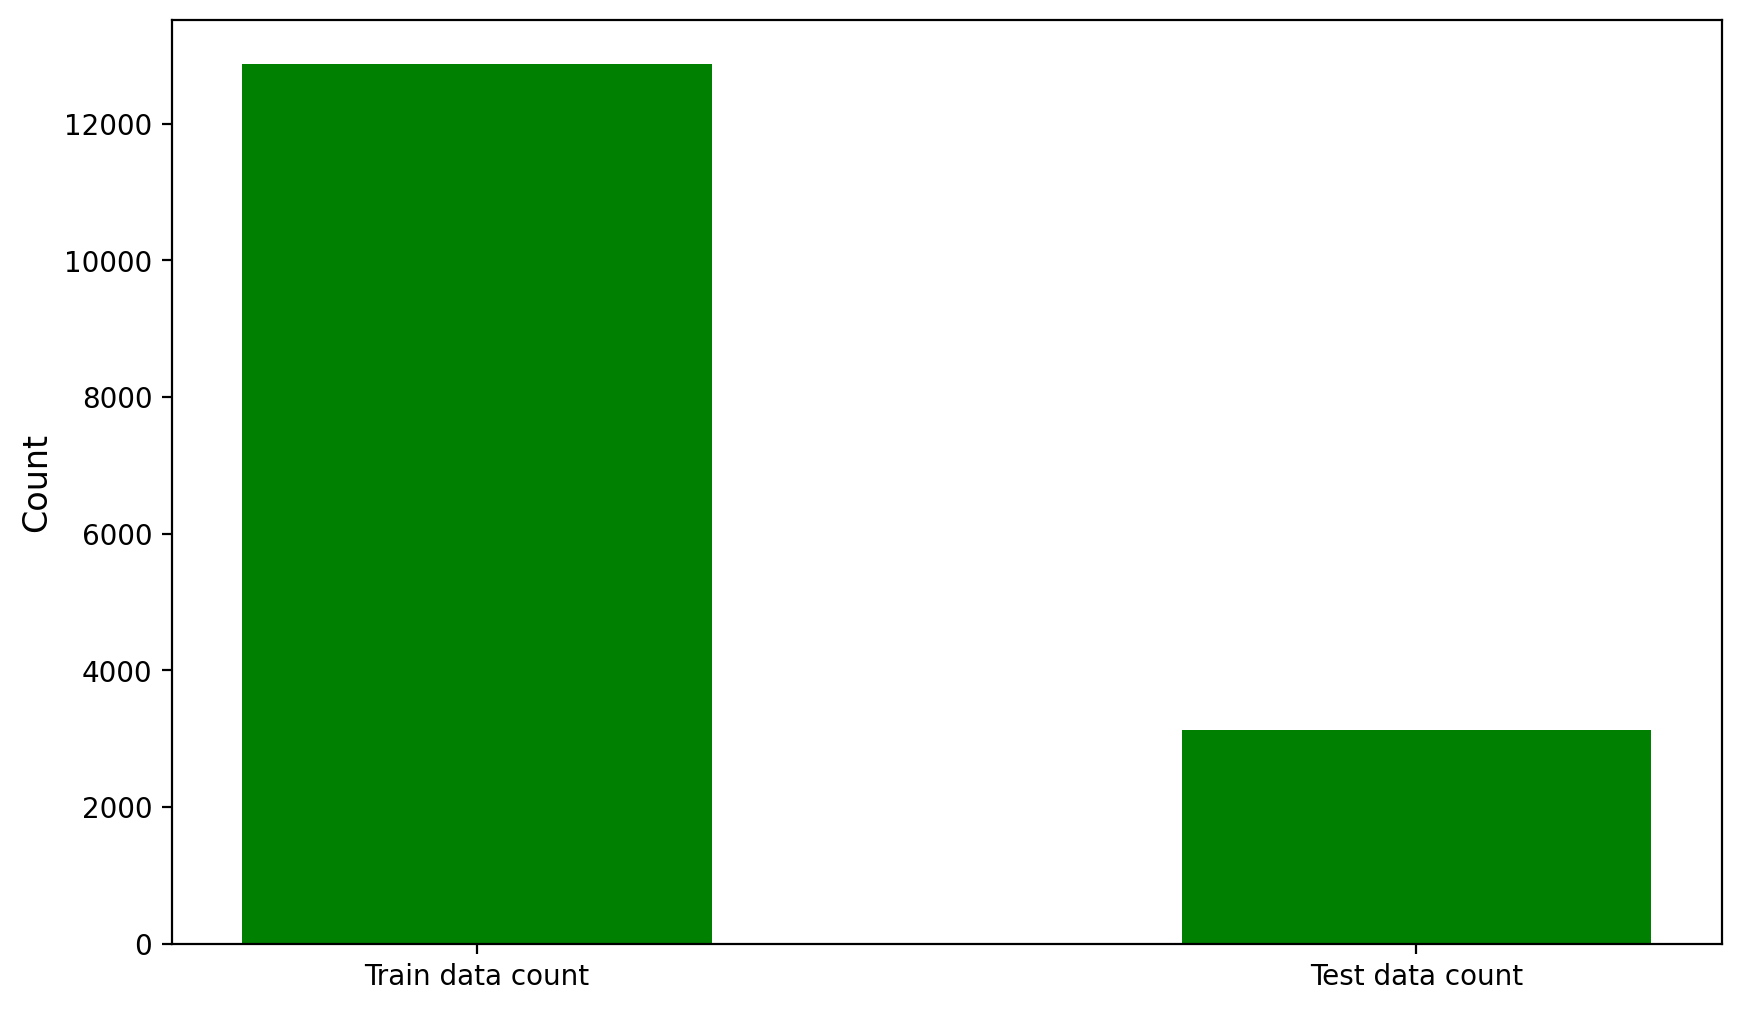

In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
plt.style.use('default')

font = fm.FontProperties(fname='/Library/Fonts/Arial Unicode.ttf')

x = np.arange(2)
data = ['Train data count', 'Test data count']
values = [len(train_data),len(test_data)]

plt.rcParams["figure.figsize"] = (10,6)
plt.bar(x, values, width=0.5, color='green')
plt.xticks(x, data)
plt.ylabel('Count', fontsize=12)


plt.show()

###  2.3. Fraud 사고 데이터 / 일반 사고 훈련용 데이터 분리

In [8]:
nonfraud_train_data = train_data[train_data['label']==0]
fraud_train_data = train_data[train_data['label']==1]

In [9]:
print('< Fraud / Non-Fraud 훈련용 데이터 분리>')
print('- Non-fraud train data : ', len(nonfraud_train_data))
print('- Fraud train data : ', len(fraud_train_data))

< Fraud / Non-Fraud 훈련용 데이터 분리>
- Non-fraud train data :  12845
- Fraud train data :  34


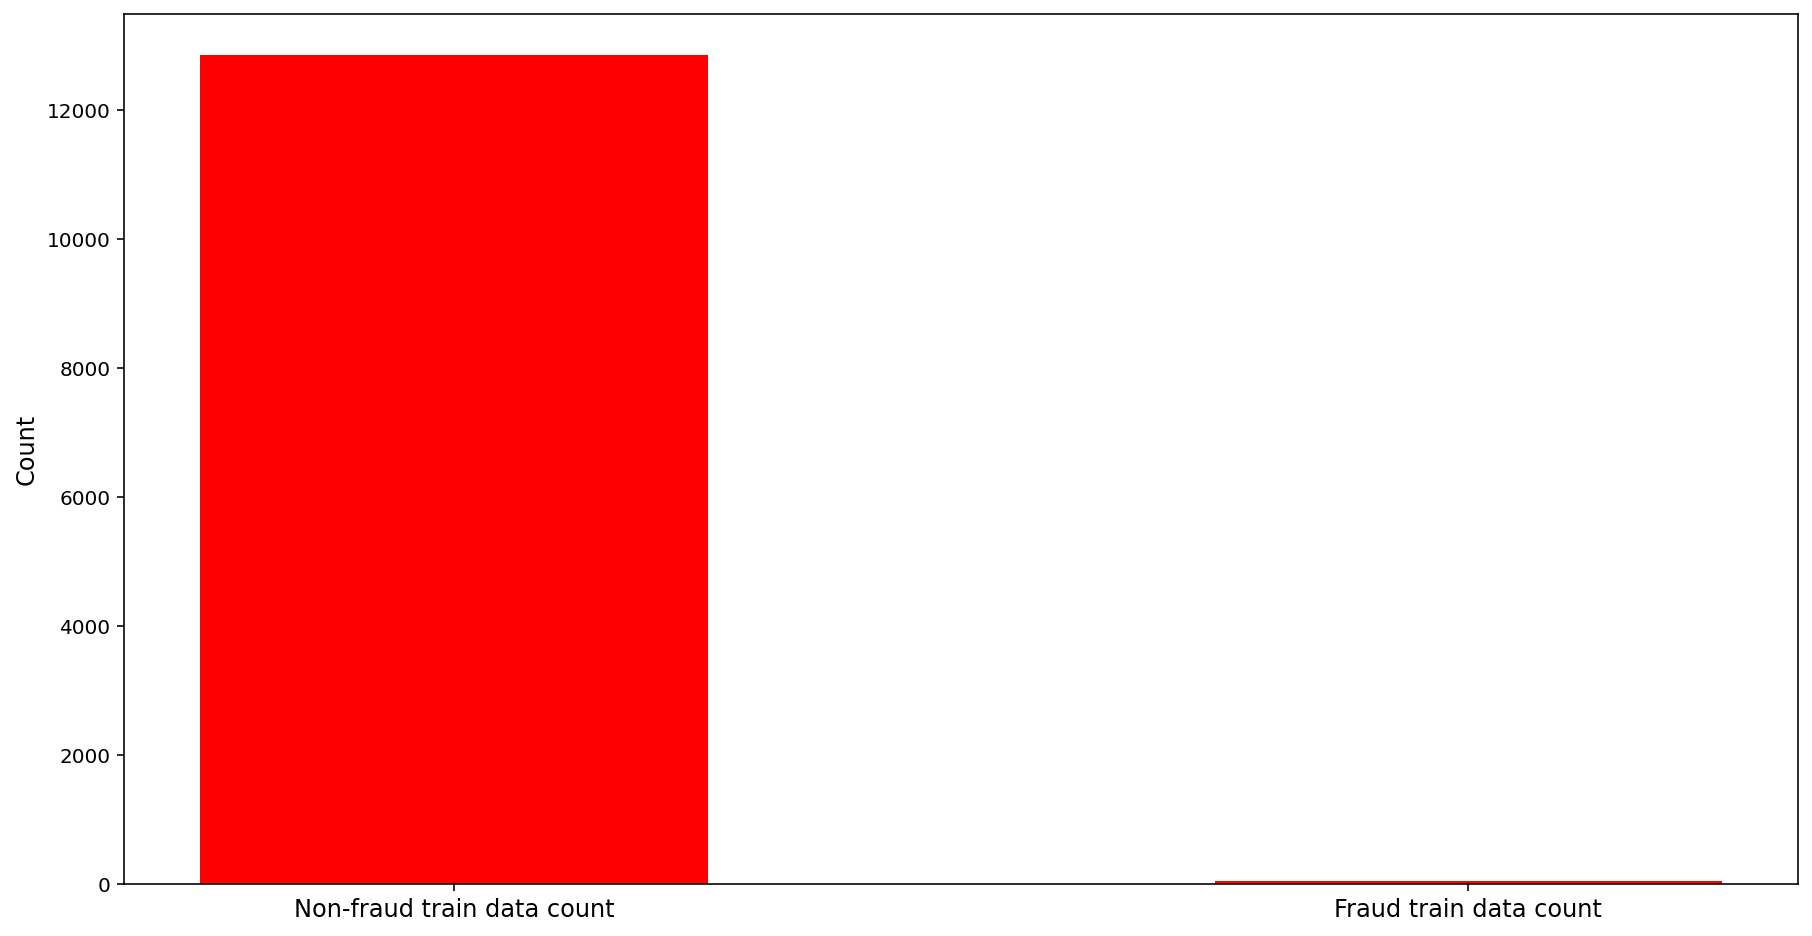

In [10]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

font = fm.FontProperties(fname='/Library/Fonts/Arial Unicode.ttf')

x = np.arange(2)
data = ['Non-fraud train data count', 'Fraud train data count']
values = [len(nonfraud_train_data),len(fraud_train_data)]

plt.rcParams["figure.figsize"] = (15,8)
plt.bar(x, values, width=0.5, color='red')
plt.xticks(x, data, fontsize=12)
plt.ylabel('Count', fontsize=12)


plt.show()

In [11]:
nonfraud_test_data = test_data[test_data['label']==0]
fraud_test_data = test_data[test_data['label']==1]

In [12]:
print('< Fraud / Non-Fraud 테스트용 데이터 분리>')
print('- Non-fraud test data : ', len(nonfraud_test_data))
print('- Fraud test data : ', len(fraud_test_data))

< Fraud / Non-Fraud 테스트용 데이터 분리>
- Non-fraud test data :  3114
- Fraud test data :  7


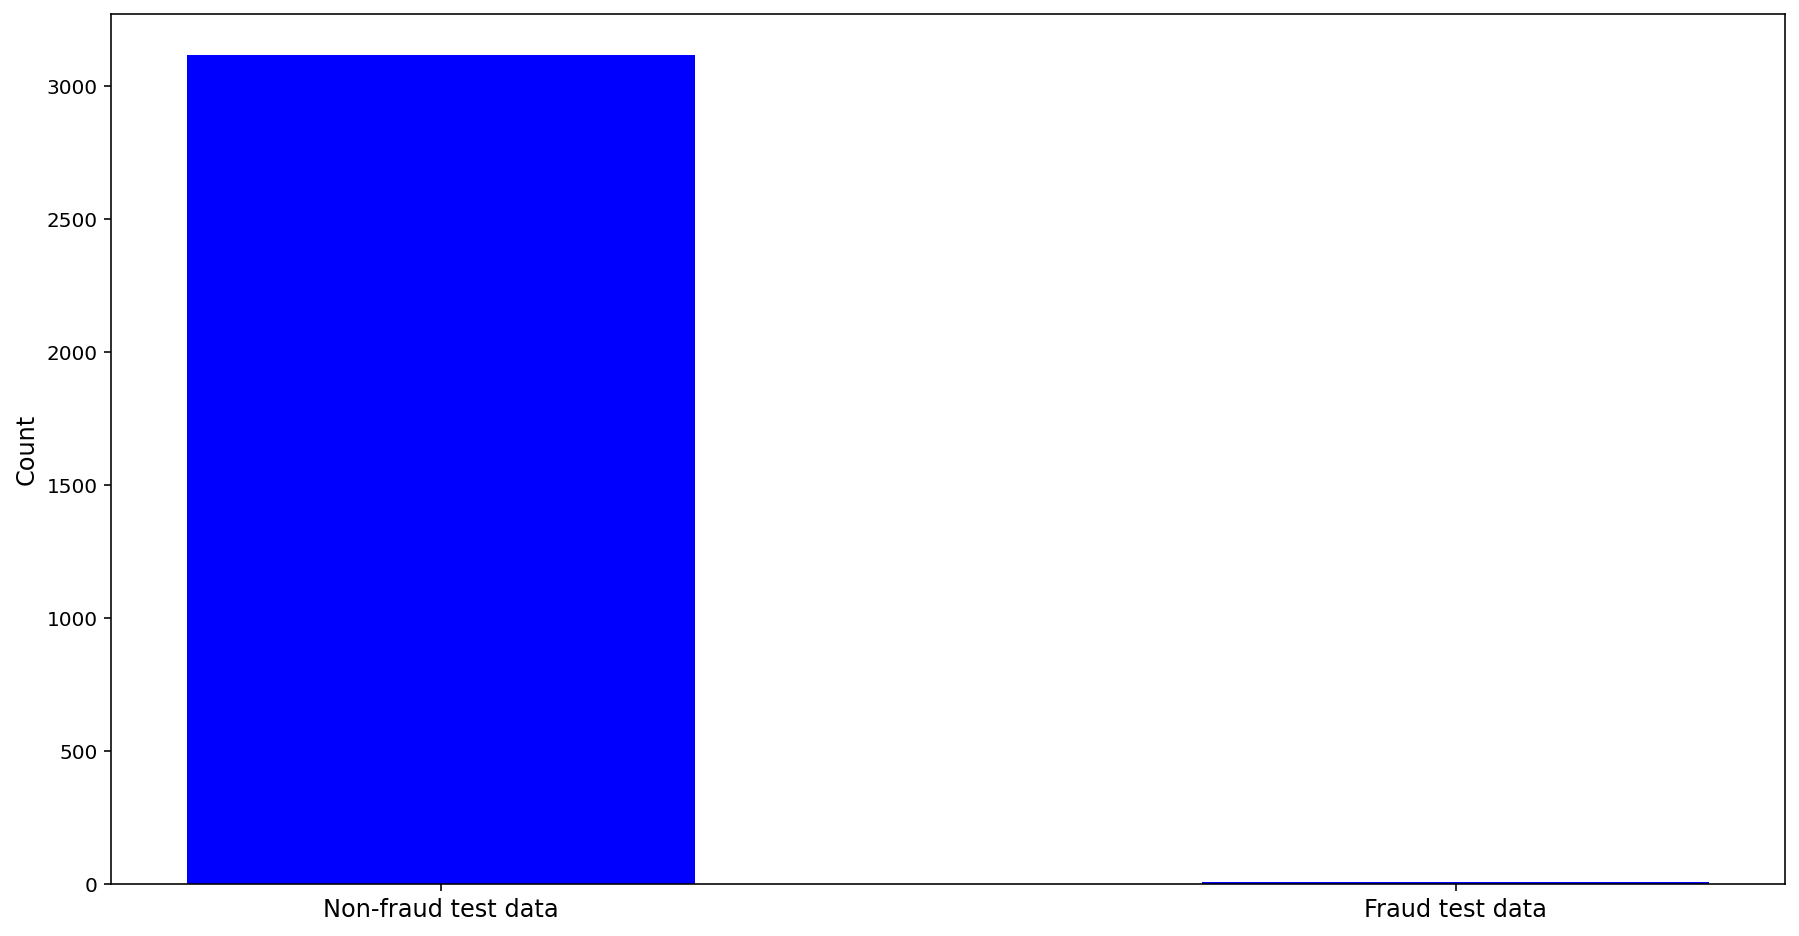

In [13]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

font = fm.FontProperties(fname='/Library/Fonts/Arial Unicode.ttf')

x = np.arange(2)
data = ['Non-fraud test data', 'Fraud test data']
values = [len(nonfraud_test_data),len(fraud_test_data)]

plt.rcParams["figure.figsize"] = (15,8)
plt.bar(x, values,  width=0.5, color='blue')
plt.xticks(x, data, fontsize=12)
plt.ylabel('Count', fontsize=12)


plt.show()

### 2.4. 쏘카 전체 데이터 상관관계 분석

In [14]:
socar_dataset.corr()

label        s1        s2        s3        s4        s5        s6  \
label  1.000000 -0.002440  0.000843 -0.007287  0.002222 -0.002924 -0.004120   
s1    -0.002440  1.000000  0.064266  0.040709  0.031540  0.059799  0.007140   
s2     0.000843  0.064266  1.000000  0.108176  0.001373 -0.063236  0.004991   
s3    -0.007287  0.040709  0.108176  1.000000  0.017756  0.138110  0.080445   
s4     0.002222  0.031540  0.001373  0.017756  1.000000  0.207534 -0.016509   
s5    -0.002924  0.059799 -0.063236  0.138110  0.207534  1.000000  0.013805   
s6    -0.004120  0.007140  0.004991  0.080445 -0.016509  0.013805  1.000000   
s7     0.012013 -0.001517 -0.011596 -0.095307 -0.022941 -0.102834 -0.022983   
s8    -0.009864  0.055840 -0.032005  0.041663 -0.098828  0.211757  0.006646   
s9    -0.002270  0.089404  0.052445  0.109085  0.159766  0.287341 -0.016984   
s10    0.012379  0.019252 -0.084189 -0.042646  0.027795 -0.016596 -0.006864   
s11   -0.002098 -0.017640  0.037637  0.064403 -0.028270 -0.104762  0.011454   
s12    0.012443  0.057602  0.155144  0.089414  0.012816  0.020625 -0.005185   
s13   -0.002251 -0.006642  0.054402  0.102591 -0.019565 -0.063472  0.029478   
s14    0.003409  0.047159  0.008687 -0.024882  0.023995  0.036565 -0.010932   
s15    0.002019 -0.004090  0.003959 -0.024876  0.033650  0.034530 -0.000806   
s16   -0.009159  0.005322 -0.104873 -0.010586 -0.005727  0.001279 -0.001345   
s17    0.011833  0.003917 -0.019370 -0.070008  0.012610 -0.045134 -0.004246   
s18   -0.003604 -0.014966 -0.006480  0.026303 -0.012111  0.027394 -0.000391   
s19   -0.007751 -0.018730 -0.031879 -0.035249  0.015971  0.016239 -0.004799   
s20    0.024653  0.018717  0.002892  0.011008  0.059824  0.069271  0.015189   
s21    0.020999  0.015605  0.002228  0.019749  0.053441  0.068547  0.013138   
s22    0.019109  0.018152  0.000511  0.012955  0.063192  0.073129  0.012496   
s23    0.023513  0.034352  0.009167 -0.021741  0.052912  0.039815 -0.001946   
s24   -0.003112 -0.009438 -0.058403  0.013600  0.069868  0.041404  0.008827   

             s7        s8        s9  ...       s15       s16       s17  \
label  0.012013 -0.009864 -0.002270  ...  0.002019 -0.009159  0.011833   
s1    -0.001517  0.055840  0.089404  ... -0.004090  0.005322  0.003917   
s2    -0.011596 -0.032005  0.052445  ...  0.003959 -0.104873 -0.019370   
s3    -0.095307  0.041663  0.109085  ... -0.024876 -0.010586 -0.070008   
s4    -0.022941 -0.098828  0.159766  ...  0.033650 -0.005727  0.012610   
s5    -0.102834  0.211757  0.287341  ...  0.034530  0.001279 -0.045134   
s6    -0.022983  0.006646 -0.016984  ... -0.000806 -0.001345 -0.004246   
s7     1.000000 -0.072694 -0.053362  ...  0.053060  0.054163  0.039195   
s8    -0.072694  1.000000  0.070173  ...  0.020839  0.019625 -0.017614   
s9    -0.053362  0.070173  1.000000  ...  0.001721 -0.028712 -0.020957   
s10    0.018789  0.009770  0.026417  ...  0.002542  0.012366  0.026535   
s11   -0.033373 -0.054726  0.000963  ... -0.019093 -0.062284 -0.025576   
s12   -0.035879  0.032967  0.104848  ...  0.004003 -0.059477 -0.010522   
s13   -0.069341 -0.042461  0.007005  ... -0.010896 -0.077139  0.001537   
s14    0.139267  0.047354  0.020886  ...  0.241137  0.040325  0.117380   
s15    0.053060  0.020839  0.001721  ...  1.000000 -0.003537  0.139848   
s16    0.054163  0.019625 -0.028712  ... -0.003537  1.000000  0.002929   
s17    0.039195 -0.017614 -0.020957  ...  0.139848  0.002929  1.000000   
s18   -0.179889  0.038220  0.004701  ... -0.035353 -0.037084 -0.286333   
s19   -0.010025  0.011784 -0.007256  ...  0.114993  0.027121  0.168821   
s20   -0.216150  0.027432  0.125947  ...  0.184905 -0.107067  0.046051   
s21   -0.197688  0.038262  0.123892  ...  0.143755 -0.106884  0.033639   
s22   -0.237577  0.030082  0.134405  ...  0.183364 -0.113859  0.051025   
s23   -0.213563  0.007142  0.106192  ...  0.160064 -0.109439  0.042692   
s24   -0.003061 -0.008746  0.171576  ...  0.014234 -0.012453  0.010141   

            s18       s19     

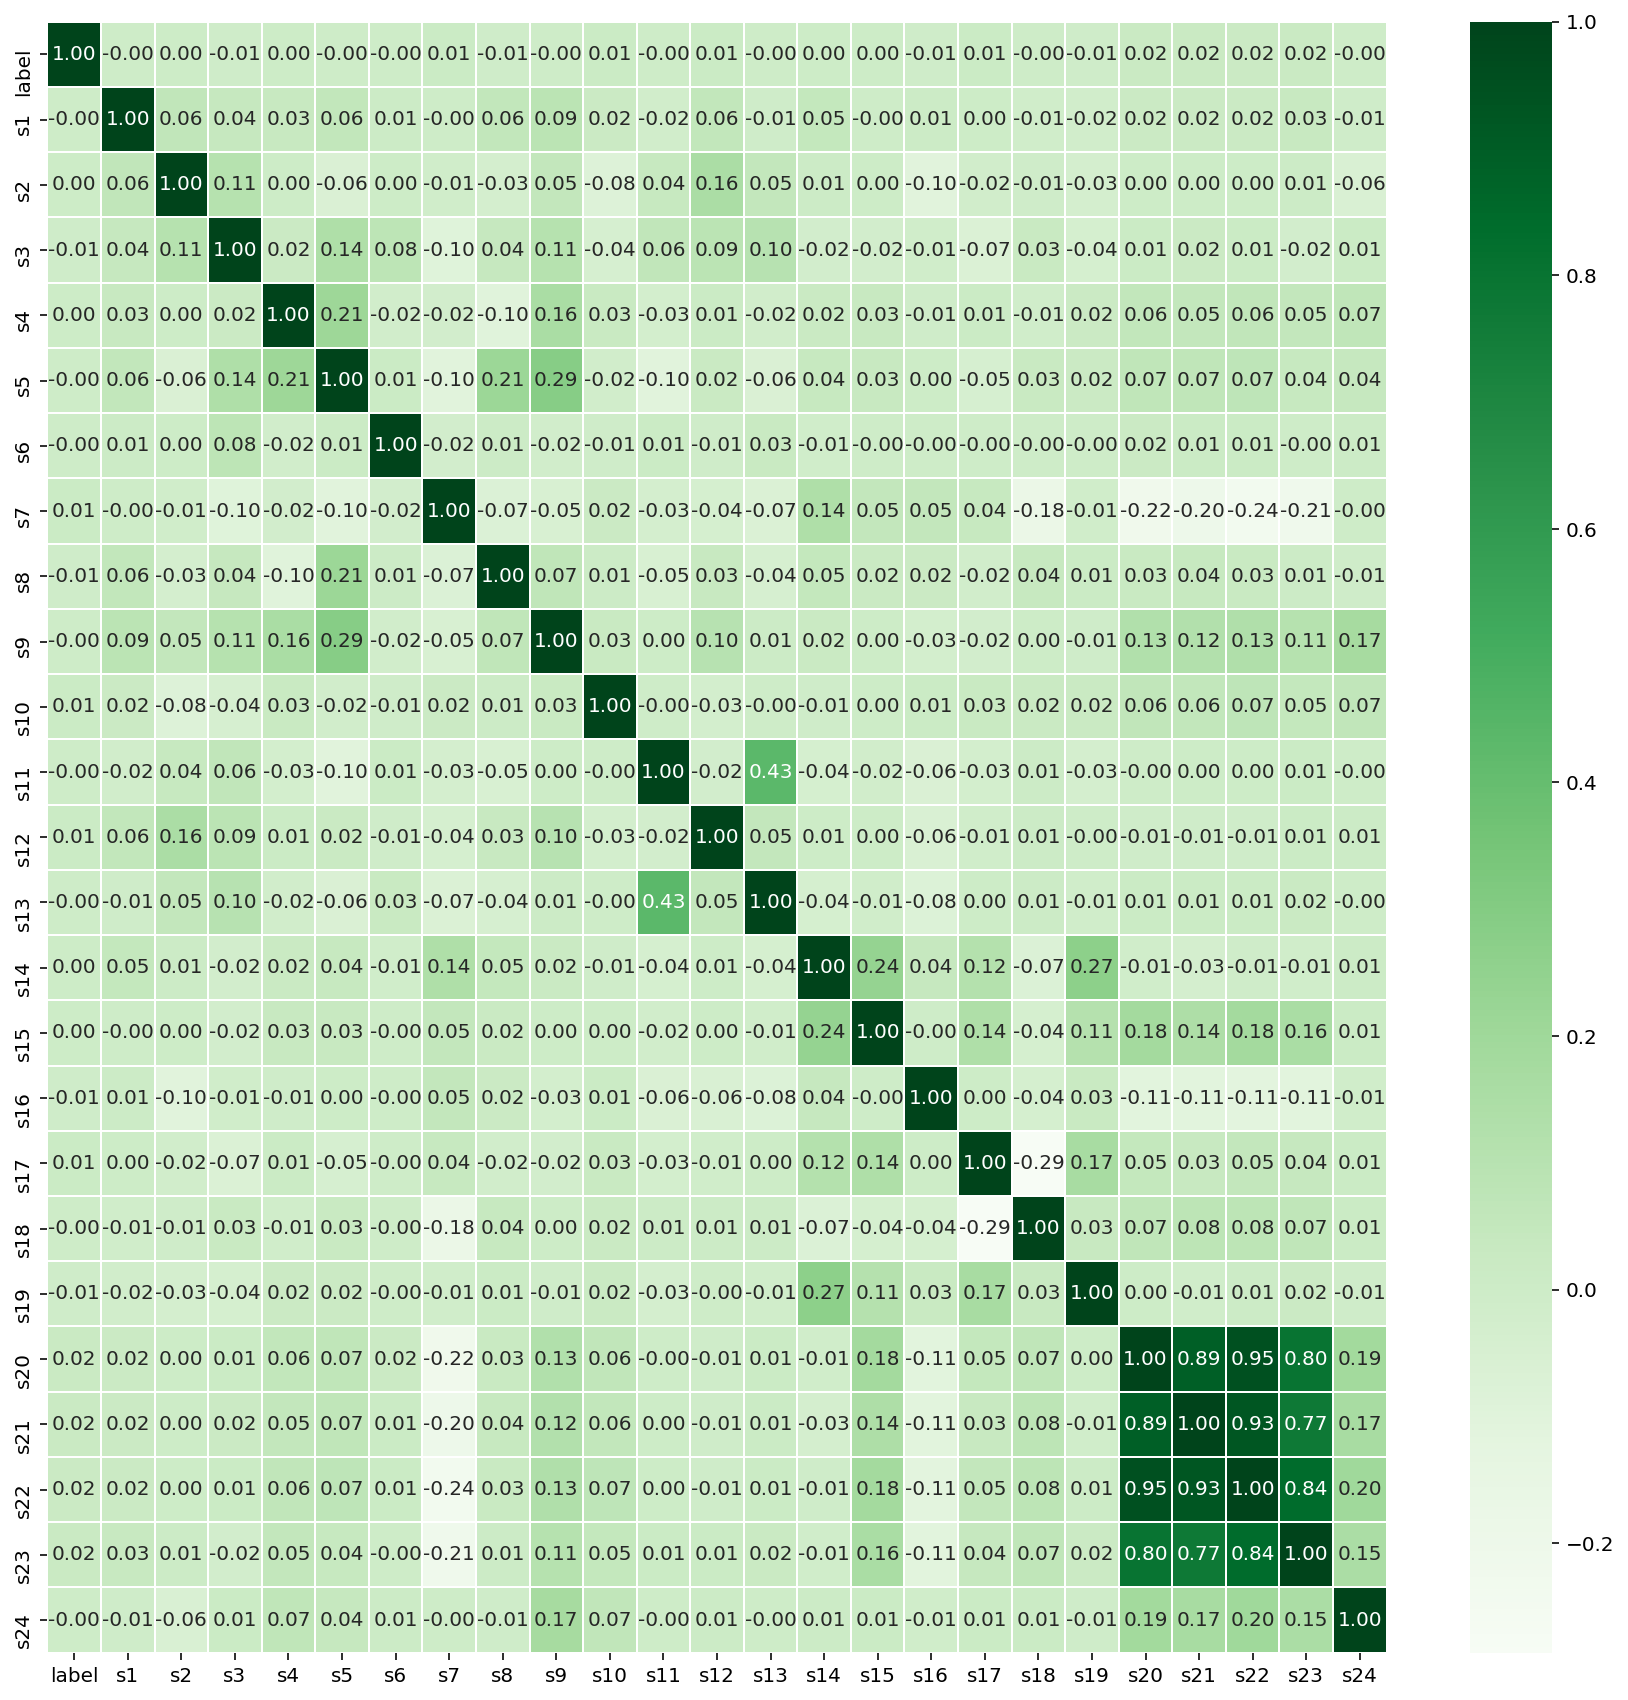

In [15]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(15,15))
sns.heatmap(data = socar_dataset.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Greens')

```
<쏘카 전체 데이터 상관관계 분석 결과>

1. s20 & s21 = 0.89
2. s20 & s22 = 0.95
3. s20 & s23 = 0.80
4. s21 & s22 = 0.93
5. s21 & s23 = 0.77
6. s22 & s23 = 0.84
7. s11 & s13 = 0.43
```

### 2.5. 훈련용 데이터 상관관계 분석

In [16]:
train_data.corr()

label        s1        s2        s3        s4        s5        s6  \
label  1.000000 -0.001493 -0.000503 -0.009311 -0.003283 -0.000078 -0.004068   
s1    -0.001493  1.000000  0.060846  0.042585  0.032937  0.061911  0.006600   
s2    -0.000503  0.060846  1.000000  0.111049  0.014125 -0.068285  0.010931   
s3    -0.009311  0.042585  0.111049  1.000000  0.020060  0.137105  0.074079   
s4    -0.003283  0.032937  0.014125  0.020060  1.000000  0.185187 -0.015154   
s5    -0.000078  0.061911 -0.068285  0.137105  0.185187  1.000000  0.014868   
s6    -0.004068  0.006600  0.010931  0.074079 -0.015154  0.014868  1.000000   
s7     0.015863  0.002732 -0.010722 -0.103288 -0.023135 -0.105737 -0.023982   
s8    -0.001782  0.055364 -0.036676  0.051067 -0.105082  0.205223  0.005687   
s9    -0.002136  0.093407  0.052432  0.104485  0.144620  0.282021 -0.007409   
s10    0.015130 -0.005154 -0.098988 -0.038656  0.033555 -0.007297 -0.006559   
s11   -0.007770 -0.019469  0.037545  0.062330 -0.024772 -0.110254  0.008362   
s12    0.011058  0.060457  0.153695  0.087590  0.005183  0.008651 -0.012840   
s13   -0.003943  0.001252  0.056409  0.098268 -0.019968 -0.073063  0.022686   
s14    0.009192  0.043445  0.005280 -0.029048  0.020109  0.034435 -0.012498   
s15    0.005244 -0.006512 -0.001602 -0.028430  0.022511  0.034410 -0.004818   
s16   -0.013714  0.009722 -0.105860 -0.012933 -0.002276  0.000743  0.006859   
s17    0.012526  0.001073 -0.024988 -0.066503  0.017025 -0.042928 -0.004545   
s18   -0.003268 -0.013064 -0.006068  0.023586 -0.017699  0.031612 -0.001780   
s19   -0.005288 -0.018373 -0.037378 -0.036405  0.011740  0.015740 -0.003098   
s20    0.027277  0.017724  0.002779  0.009350  0.055145  0.061972  0.016327   
s21    0.027328  0.014904  0.001081  0.014205  0.052238  0.063235  0.012334   
s22    0.026518  0.018690  0.000064  0.011663  0.061988  0.066510  0.011808   
s23    0.030401  0.028950  0.007878 -0.012531  0.045327  0.037943 -0.001138   
s24         NaN       NaN       NaN       NaN       NaN       NaN       NaN   

             s7        s8        s9  ...       s15       s16       s17  \
label  0.015863 -0.001782 -0.002136  ...  0.005244 -0.013714  0.012526   
s1     0.002732  0.055364  0.093407  ... -0.006512  0.009722  0.001073   
s2    -0.010722 -0.036676  0.052432  ... -0.001602 -0.105860 -0.024988   
s3    -0.103288  0.051067  0.104485  ... -0.028430 -0.012933 -0.066503   
s4    -0.023135 -0.105082  0.144620  ...  0.022511 -0.002276  0.017025   
s5    -0.105737  0.205223  0.282021  ...  0.034410  0.000743 -0.042928   
s6    -0.023982  0.005687 -0.007409  ... -0.004818  0.006859 -0.004545   
s7     1.000000 -0.067569 -0.045285  ...  0.051036  0.053795  0.037390   
s8    -0.067569  1.000000  0.066677  ...  0.022448  0.018944 -0.007306   
s9    -0.045285  0.066677  1.000000  ... -0.000498 -0.020536 -0.015436   
s10    0.019064  0.017571  0.038338  ...  0.014913  0.014307  0.025410   
s11   -0.029978 -0.044447 -0.004125  ... -0.022667 -0.056820 -0.019439   
s12   -0.031402  0.023197  0.092618  ... -0.003187 -0.056254 -0.005725   
s13   -0.069372 -0.037215 -0.008625  ... -0.017833 -0.073932  0.005075   
s14    0.136644  0.048258  0.008607  ...  0.246713  0.042828  0.113222   
s15    0.051036  0.022448 -0.000498  ...  1.000000 -0.000568  0.137848   
s16    0.053795  0.018944 -0.020536  ... -0.000568  1.000000  0.005997   
s17    0.037390 -0.007306 -0.015436  ...  0.137848  0.005997  1.000000   
s18   -0.178644  0.028645 -0.002425  ... -0.037965 -0.035476 -0.280921   
s19   -0.010351  0.014535 -0.013126  ...  0.117543  0.035790  0.172868   
s20   -0.195434  0.019364  0.120755  ...  0.146645 -0.113520  0.035424   
s21   -0.177485  0.027545  0.120364  ...  0.118530 -0.108246  0.025311   
s22   -0.215242  0.019438  0.128881  ...  0.156557 -0.117912  0.040884   
s23   -0.197132  0.004391  0.107569  ...  0.135853 -0.108571  0.032513   
s24         NaN       NaN       NaN  ...       NaN       NaN       NaN   

            s18       s19     

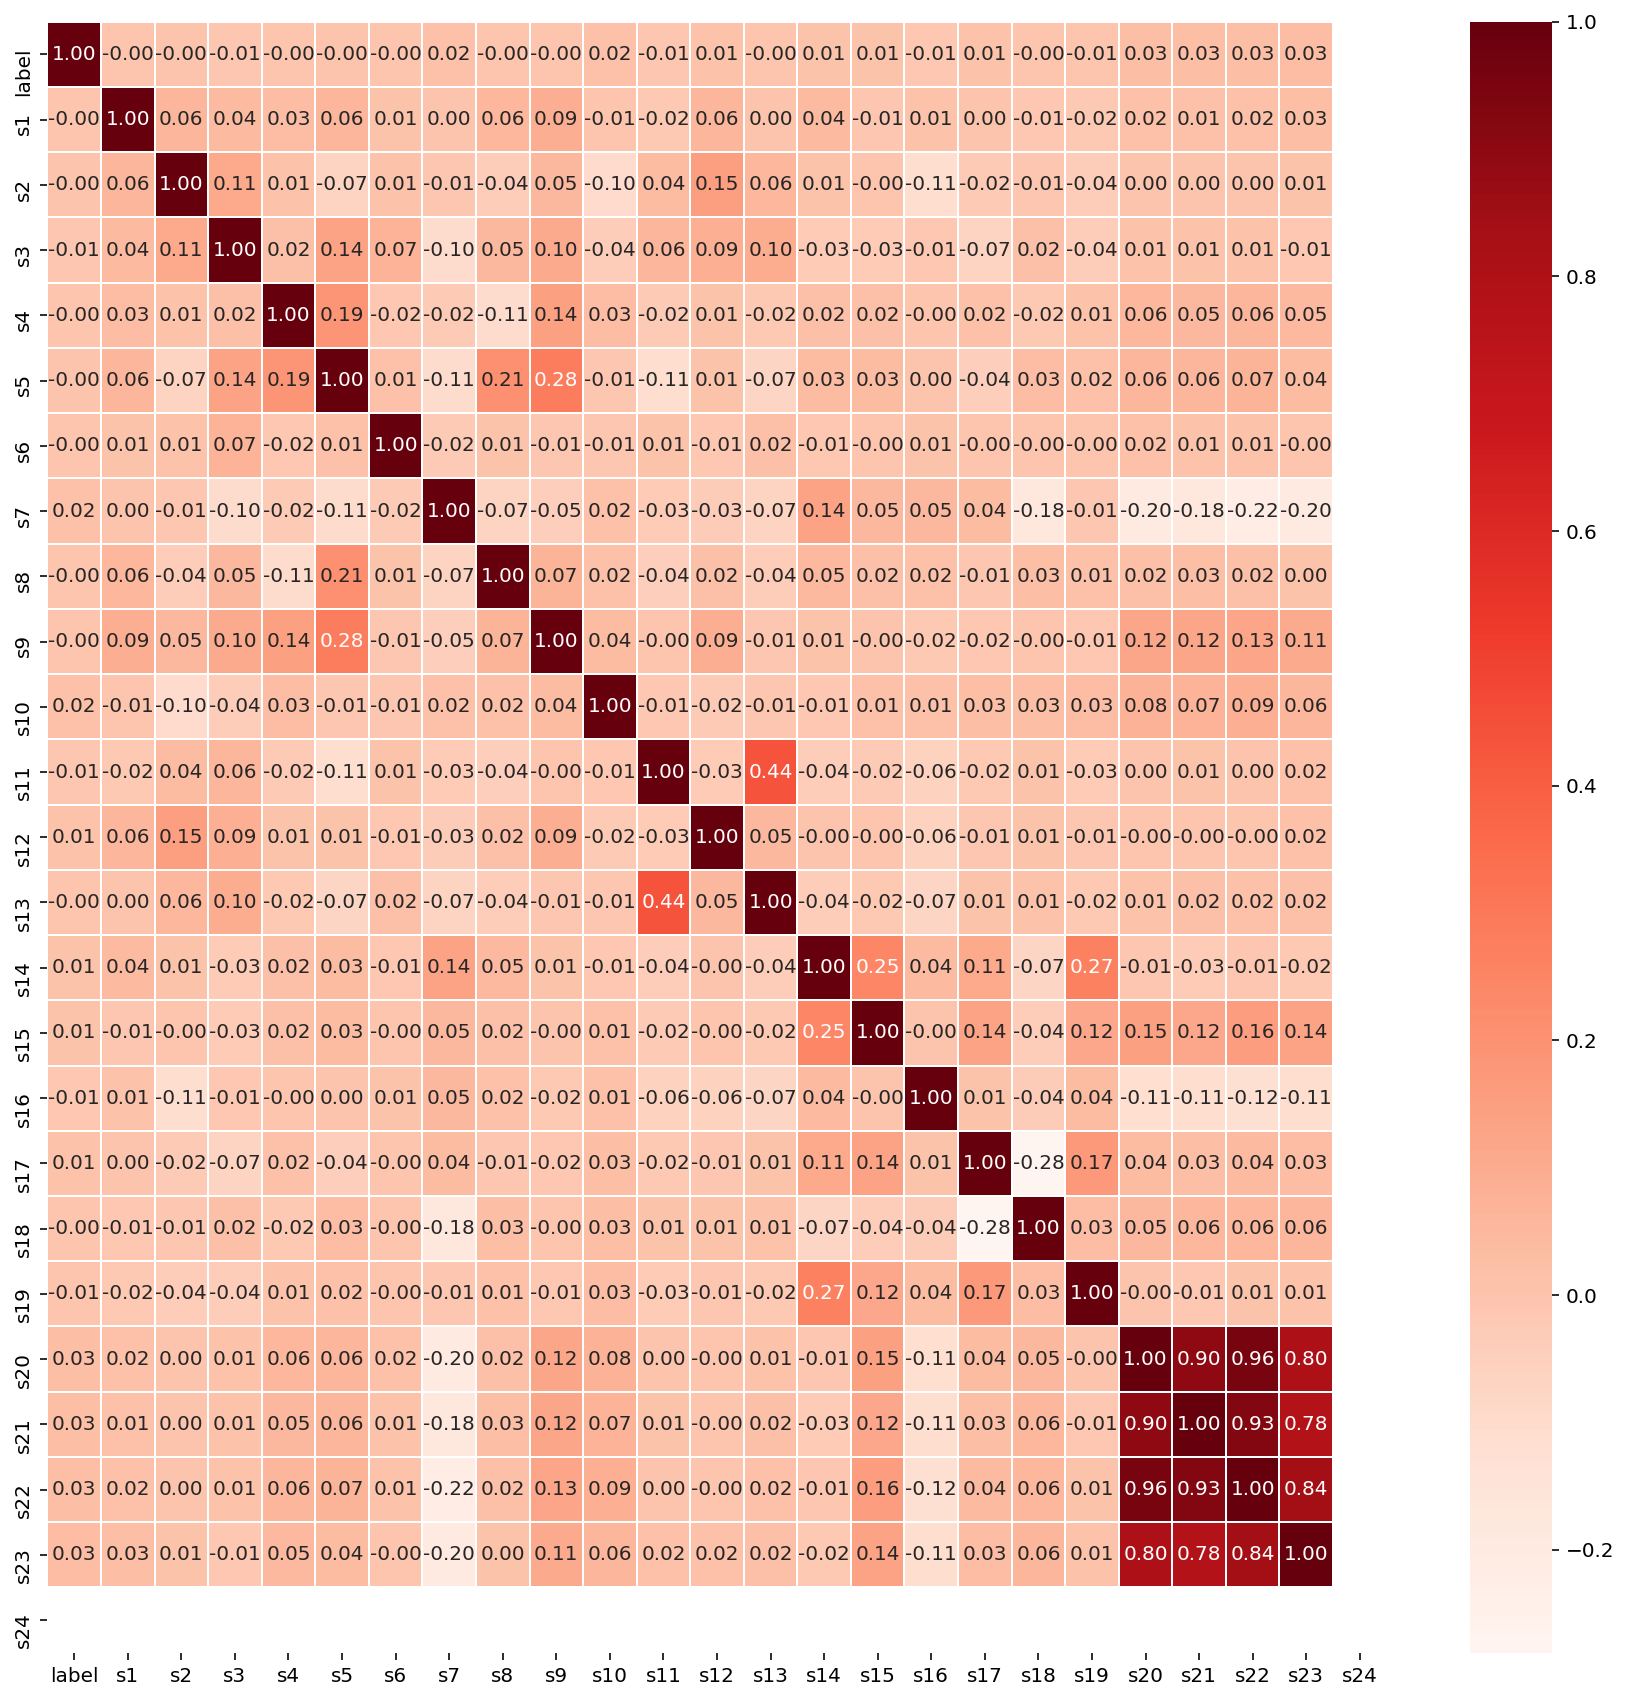

In [17]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(15,15))
sns.heatmap(data = train_data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Reds')

```
<훈련용 데이터 상관관계 분석 결과>

1. s20 & s21 = 0.90
2. s20 & s22 = 0.96
3. s20 & s23 = 0.80
4. s21 & s22 = 0.93
5. s21 & s23 = 0.78
6. s22 & s23 = 0.84
7. s11 & s13 = 0.44
```

### 2.5.1. 훈련용 non-fraud 데이터 상관관계 분석

In [18]:
nonfraud_train_data.corr()

label        s1        s2        s3        s4        s5        s6  \
label    NaN       NaN       NaN       NaN       NaN       NaN       NaN   
s1       NaN  1.000000  0.060795  0.042584  0.032743  0.061633  0.006599   
s2       NaN  0.060795  1.000000  0.110106  0.014398 -0.068921  0.010943   
s3       NaN  0.042584  0.110106  1.000000  0.019961  0.137158  0.074147   
s4       NaN  0.032743  0.014398  0.019961  1.000000  0.184928 -0.015184   
s5       NaN  0.061633 -0.068921  0.137158  0.184928  1.000000  0.014891   
s6       NaN  0.006599  0.010943  0.074147 -0.015184  0.014891  1.000000   
s7       NaN  0.002825 -0.010795 -0.103486 -0.023149 -0.105867 -0.023924   
s8       NaN  0.055773 -0.037190  0.050080 -0.104794  0.205294  0.005690   
s9       NaN  0.093499  0.052297  0.104554  0.145144  0.282429 -0.007426   
s10      NaN -0.004997 -0.098746 -0.038329  0.032921 -0.007158 -0.006515   
s11      NaN -0.020482  0.037186  0.061911 -0.024701 -0.111084  0.008343   
s12      NaN  0.060719  0.153602  0.087945  0.005739  0.009079 -0.012809   
s13      NaN  0.000515  0.056880  0.098213 -0.020113 -0.073273  0.022696   
s14      NaN  0.043778  0.005914 -0.027965  0.020200  0.033834 -0.012498   
s15      NaN -0.006060 -0.001652 -0.028718  0.022701  0.034121 -0.004802   
s16      NaN  0.009613 -0.105479 -0.013065 -0.002571  0.000991  0.006808   
s17      NaN  0.001126 -0.024029 -0.065598  0.017664 -0.042784 -0.004501   
s18      NaN -0.012991 -0.005660  0.024203 -0.018301  0.031991 -0.001795   
s19      NaN -0.018286 -0.037140 -0.036493  0.011593  0.015401 -0.003120   
s20      NaN  0.017489  0.001157  0.009281  0.055419  0.061779  0.016476   
s21      NaN  0.014854 -0.000371  0.014350  0.052631  0.063159  0.012476   
s22      NaN  0.018506 -0.001258  0.011989  0.062232  0.066520  0.011941   
s23      NaN  0.028316  0.006137 -0.012489  0.045616  0.037446 -0.001017   
s24      NaN       NaN       NaN       NaN       NaN       NaN       NaN   

             s7        s8        s9  ...       s15       s16       s17  \
label       NaN       NaN       NaN  ...       NaN       NaN       NaN   
s1     0.002825  0.055773  0.093499  ... -0.006060  0.009613  0.001126   
s2    -0.010795 -0.037190  0.052297  ... -0.001652 -0.105479 -0.024029   
s3    -0.103486  0.050080  0.104554  ... -0.028718 -0.013065 -0.065598   
s4    -0.023149 -0.104794  0.145144  ...  0.022701 -0.002571  0.017664   
s5    -0.105867  0.205294  0.282429  ...  0.034121  0.000991 -0.042784   
s6    -0.023924  0.005690 -0.007426  ... -0.004802  0.006808 -0.004501   
s7     1.000000 -0.067626 -0.044907  ...  0.050965  0.054429  0.037111   
s8    -0.067626  1.000000  0.066857  ...  0.021684  0.018527 -0.007073   
s9    -0.044907  0.066857  1.000000  ... -0.000458 -0.020818 -0.015076   
s10    0.018788  0.018378  0.038148  ...  0.015120  0.014724  0.024813   
s11   -0.030044 -0.044937 -0.004169  ... -0.022837 -0.056851 -0.019492   
s12   -0.031826  0.023424  0.092460  ... -0.002731 -0.055301 -0.005808   
s13   -0.069586 -0.037272 -0.008790  ... -0.018113 -0.073876  0.004978   
s14    0.136940  0.049276  0.009170  ...  0.247357  0.042785  0.113548   
s15    0.050965  0.021684 -0.000458  ...  1.000000 -0.000379  0.137631   
s16    0.054429  0.018527 -0.020818  ... -0.000379  1.000000  0.006446   
s17    0.037111 -0.007073 -0.015076  ...  0.137631  0.006446  1.000000   
s18   -0.178914  0.029204 -0.002078  ... -0.037903 -0.035324 -0.280677   
s19   -0.010318  0.014401 -0.012902  ...  0.117160  0.035603  0.172916   
s20   -0.196197  0.019608  0.120737  ...  0.146680 -0.113110  0.036113   
s21   -0.178030  0.027794  0.120654  ...  0.118794 -0.108141  0.026291   
s22   -0.215988  0.020002  0.129304  ...  0.156761 -0.117607  0.041493   
s23   -0.198047  0.004885  0.107844  ...  0.136166 -0.108044  0.033215   
s24         NaN       NaN       NaN  ...       NaN       NaN       NaN   

            s18       s19       s20       s21       s22       s23  s24  
label       NaN       NaN       

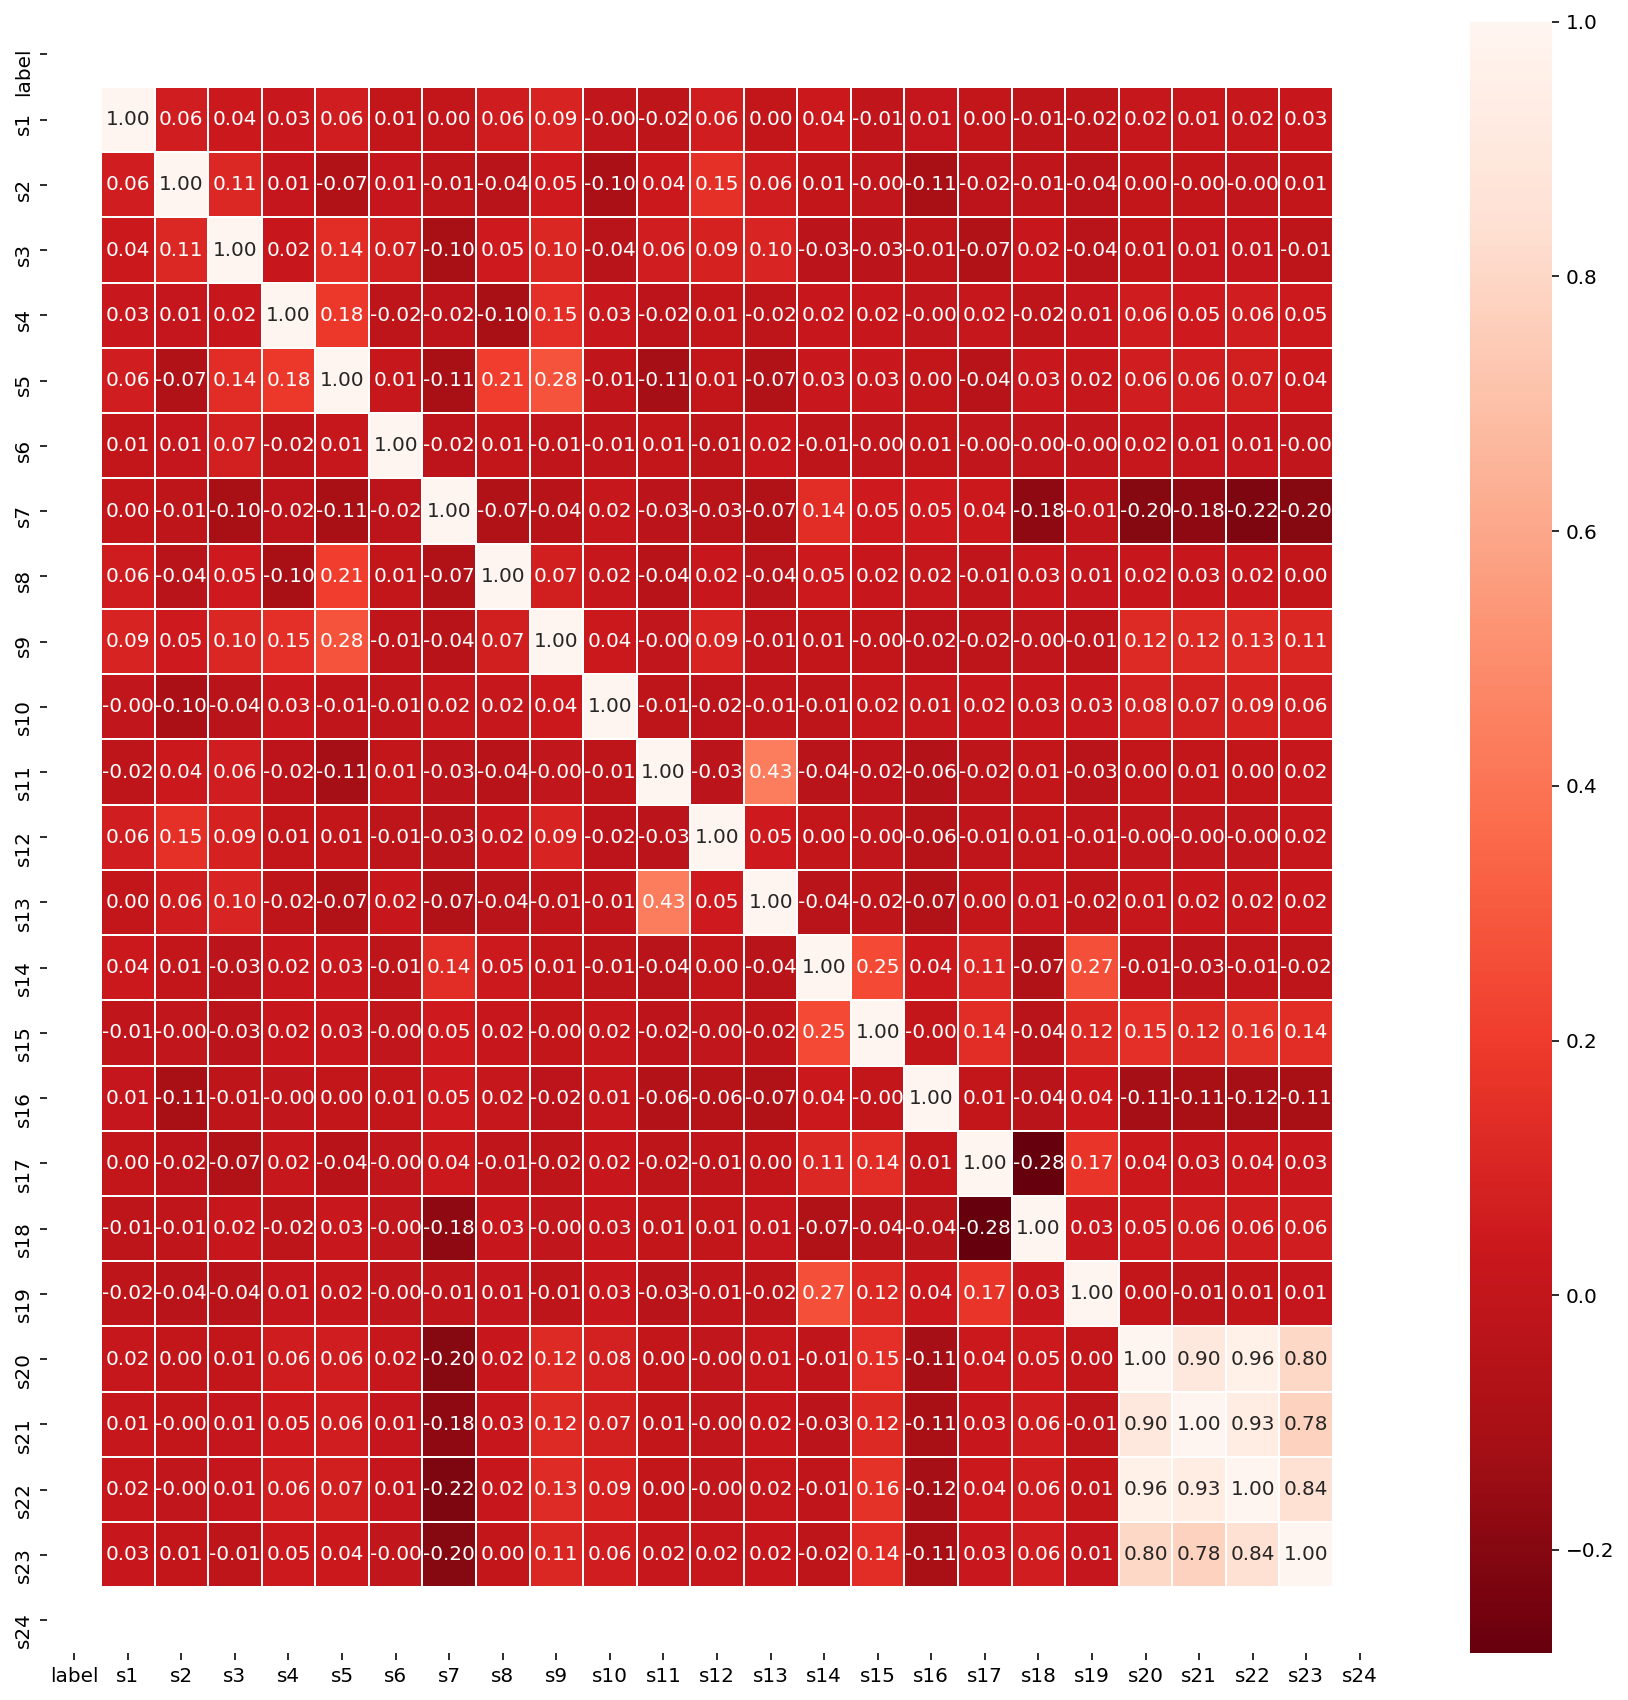

In [19]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(15,15))
sns.heatmap(data = nonfraud_train_data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Reds_r')

```
<훈련용 non-fraud 데이터 상관관계 분석 결과>

1. s20 & s21 = 0.90
2. s20 & s22 = 0.96
3. s20 & s23 = 0.80
4. s21 & s22 = 0.93
5. s21 & s23 = 0.78
6. s22 & s23 = 0.84
7. s11 & s13 = 0.43
```

### 2.5.2. 훈련용 fraud 데이터 상관관계 분석

In [20]:
fraud_train_data.corr()

label        s1        s2        s3            s4        s5  s6  \
label    NaN       NaN       NaN       NaN           NaN       NaN NaN   
s1       NaN  1.000000  0.088422  0.038659  1.394305e-01  0.193218 NaN   
s2       NaN  0.088422  1.000000  0.463666 -1.038068e-01  0.154378 NaN   
s3       NaN  0.038659  0.463666  1.000000  4.919190e-02  0.121165 NaN   
s4       NaN  0.139431 -0.103807  0.049192  1.000000e+00  0.290462 NaN   
s5       NaN  0.193218  0.154378  0.121165  2.904621e-01  1.000000 NaN   
s6       NaN       NaN       NaN       NaN           NaN       NaN NaN   
s7       NaN -0.097087  0.072282  0.184109  4.351941e-02 -0.064721 NaN   
s8       NaN -0.113914  0.129171  0.357918 -2.160316e-01  0.184733 NaN   
s9       NaN  0.046284  0.106134  0.071849 -9.128709e-02  0.135759 NaN   
s10      NaN -0.054737 -0.172414 -0.091916  2.491364e-01 -0.042454 NaN   
s11      NaN  0.446994  0.165064  0.184511 -6.411706e-02  0.158673 NaN   
s12      NaN -0.073402  0.200378 -0.011869 -2.412865e-01 -0.156989 NaN   
s13      NaN  0.388955 -0.135296  0.107765  3.954330e-02  0.003675 NaN   
s14      NaN -0.052671 -0.155525 -0.279597  5.985135e-03  0.176637 NaN   
s15      NaN -0.248496  0.020443  0.106944 -5.726481e-02  0.144776 NaN   
s16      NaN  0.073171 -0.328276 -0.012346  1.490208e-01 -0.122473 NaN   
s17      NaN -0.015017 -0.368939 -0.345294 -2.221308e-01 -0.090845 NaN   
s18      NaN -0.054737 -0.172414 -0.230812  2.491364e-01 -0.108065 NaN   
s19      NaN -0.109596 -0.218321 -0.018680  1.168412e-01  0.241638 NaN   
s20      NaN  0.136855  0.523033  0.110649 -1.560792e-18  0.125443 NaN   
s21      NaN  0.055292  0.446105  0.048678 -4.038962e-02  0.091976 NaN   
s22      NaN  0.119506  0.440415 -0.011595  1.473139e-02  0.071201 NaN   
s23      NaN  0.297487  0.522481  0.053900 -5.890920e-03  0.176311 NaN   
s24      NaN       NaN       NaN       NaN           NaN       NaN NaN   

             s7        s8        s9  ...       s15       s16       s17  \
label       NaN       NaN       NaN  ...       NaN       NaN       NaN   
s1    -0.097087 -0.113914  0.046284  ... -0.248496  0.073171 -0.015017   
s2     0.072282  0.129171  0.106134  ...  0.020443 -0.328276 -0.368939   
s3     0.184109  0.357918  0.071849  ...  0.106944 -0.012346 -0.345294   
s4     0.043519 -0.216032 -0.091287  ... -0.057265  0.149021 -0.222131   
s5    -0.064721  0.184733  0.135759  ...  0.144776 -0.122473 -0.090845   
s6          NaN       NaN       NaN  ...       NaN       NaN       NaN   
s7     1.000000 -0.054153 -0.476731  ...  0.071348 -0.567975  0.154672   
s8    -0.054153  1.000000  0.006311  ...  0.295065  0.201699 -0.071661   
s9    -0.476731  0.006311  1.000000  ... -0.013269  0.120285 -0.140592   
s10    0.072282 -0.163617  0.106134  ... -0.069227 -0.062529  0.132818   
s11    0.139517  0.098621  0.005853  ...  0.058190 -0.103594  0.030384   
s12    0.252016 -0.050040  0.176211  ... -0.240631 -0.545028 -0.028585   
s13    0.206508 -0.021322  0.057757  ...  0.114319 -0.144900  0.060901   
s14    0.002219 -0.166260 -0.135147  ...  0.088237  0.118672  0.017521   
s15    0.071348  0.295065 -0.013269  ...  1.000000 -0.069235  0.203202   
s16   -0.567975  0.201699  0.120285  ... -0.069235  1.000000 -0.133802   
s17    0.154672 -0.071661 -0.140592  ...  0.203202 -0.133802  1.000000   
s18    0.072282 -0.163617 -0.151620  ... -0.057553 -0.151111 -0.368939   
s19    0.091528  0.094908 -0.191990  ...  0.456995  0.157622  0.238777   
s20   -0.156624 -0.031099  0.164268  ...  0.110171 -0.169363 -0.266479   
s21   -0.330454 -0.020941  0.066367  ...  0.005608 -0.032946 -0.346909   
s22   -0.184637 -0.122206  0.021517  ...  0.058772 -0.129406 -0.244331   
s23   -0.135363 -0.103439  0.064532  ...  0.015302 -0.199600 -0.258222   
s24         NaN       NaN       NaN  ...       NaN       NaN       NaN   

            s18       s19           s20       s21       s22       s23  s24  
label       NaN       NaN           NaN       NaN       NaN       NaN  NaN  
s1 

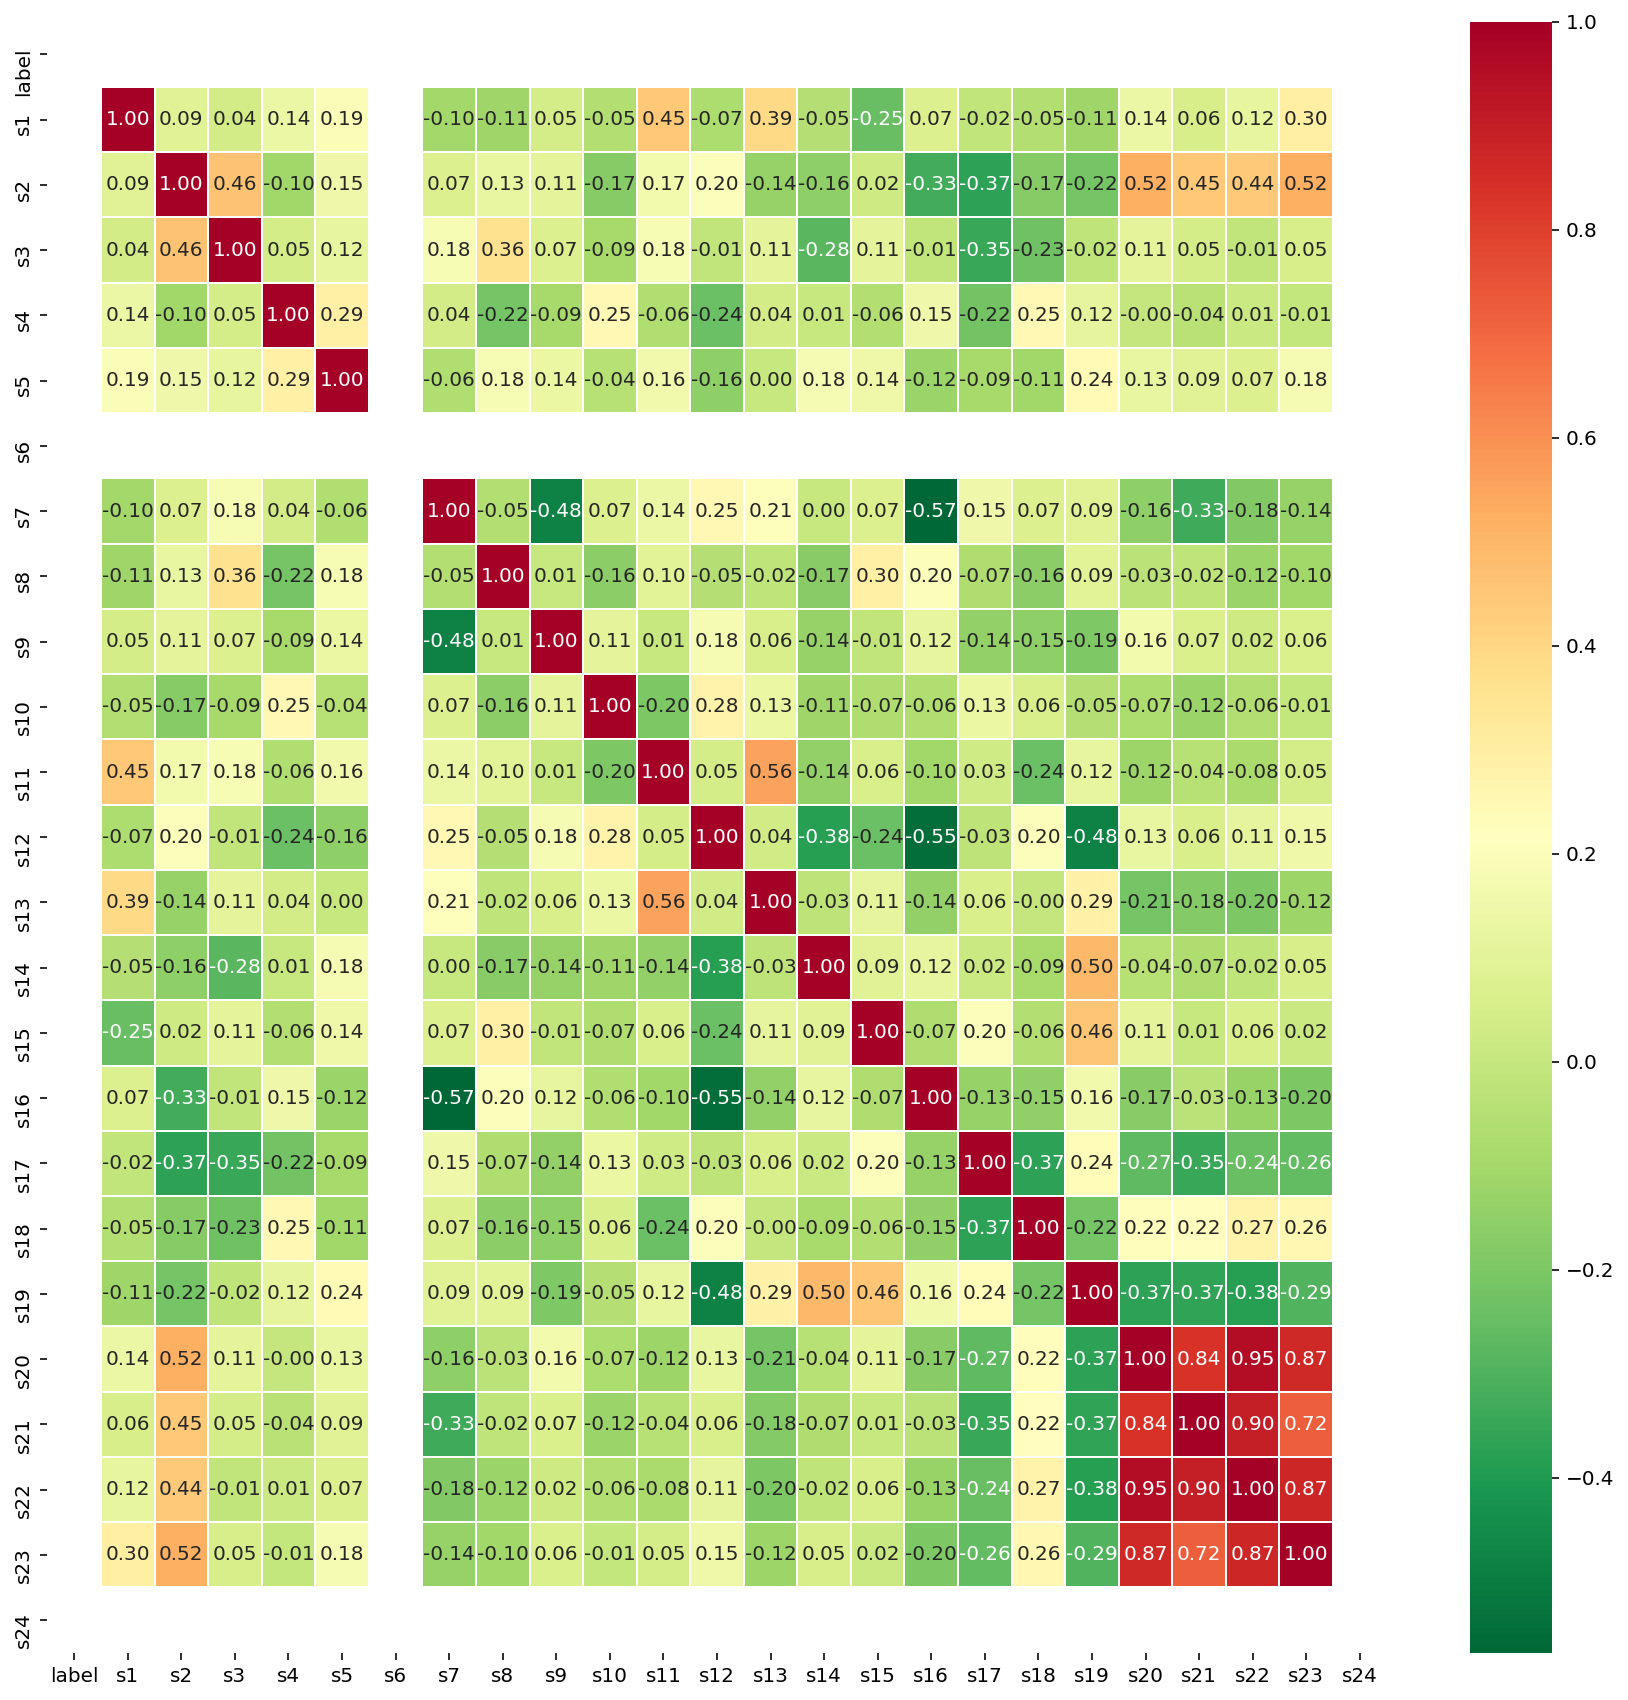

In [21]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(15,15))
sns.heatmap(data = fraud_train_data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='RdYlGn_r')

```
<훈련용 fraud 데이터 상관관계 분석 결과>

1. s20 & s21 = 0.84
2. s20 & s22 = 0.95
3. s20 & s23 = 0.87
4. s21 & s22 = 0.90
5. s21 & s23 = 0.72
6. s22 & s23 = 0.87
7. s11 & s13 = 0.56
8. s16 & s7 = -0.57
9. s16 & s12 = -0.55
10. s2 & s20 = 0.52
11. s2 & s23 = 0.52
12. reapir_cnt & s14 = 0.50
------------------------------------------------------
13. s19 & s12 = -0.48
14. s7 & s9 = -0.48
15. s21 & s2 = 0.45
16. s22 & s2 = 0.44
17. s19 & s15 = 0.46
18. s1 & s11 = 0.45

=> 데이터 개수가 적어 서로 간 미치는 영향이 크게 나타남
```

### 2.6. 테스트용 데이터 상관관계 분석

In [22]:
test_data.corr()

label        s1        s2        s3        s4        s5        s6  \
label  1.000000 -0.006984  0.006900  0.002277  0.023049 -0.015071 -0.004260   
s1    -0.006984  1.000000  0.079581  0.033198  0.030851  0.053099  0.009638   
s2     0.006900  0.079581  1.000000  0.100602 -0.028306 -0.025360 -0.017824   
s3     0.002277  0.033198  0.100602  1.000000  0.006340  0.140161  0.104567   
s4     0.023049  0.030851 -0.028306  0.006340  1.000000  0.276523 -0.023088   
s5    -0.015071  0.053099 -0.025360  0.140161  0.276523  1.000000  0.008354   
s6    -0.004260  0.009638 -0.017824  0.104567 -0.023088  0.008354  1.000000   
s7    -0.004997 -0.019525 -0.017200 -0.061721 -0.022020 -0.090747 -0.019394   
s8    -0.040100  0.058266 -0.017712  0.010081 -0.080481  0.239939  0.009845   
s9    -0.000611  0.092983  0.109867  0.125049  0.164774  0.302935 -0.049741   
s10    0.003978  0.106230 -0.013236 -0.061678 -0.003739 -0.060039 -0.010099   
s11    0.023629 -0.009800  0.038523  0.073462 -0.040561 -0.081829  0.022997   
s12    0.019037  0.045233  0.167687  0.097121  0.037694  0.071399  0.023584   
s13    0.005169 -0.039763  0.045711  0.120885 -0.018463 -0.024322  0.053955   
s14   -0.022182  0.063223  0.027734 -0.007754  0.035560  0.044218 -0.005589   
s15   -0.011480  0.006404  0.034978 -0.011545  0.065274  0.032290  0.012529   
s16    0.011549 -0.014560 -0.106449  0.000566 -0.013778  0.006297 -0.031483   
s17    0.008972  0.016427  0.011116 -0.085598 -0.004519 -0.056598 -0.003606   
s18   -0.004881 -0.022295 -0.004482  0.036766  0.001938  0.007884  0.004039   
s19   -0.022567 -0.021733 -0.000416 -0.028949  0.039407  0.021824 -0.012830   
s20    0.020150  0.032603  0.062812  0.006026  0.026613  0.065802  0.005816   
s21    0.000404  0.027175  0.061481  0.031104  0.013790  0.060335  0.010175   
s22   -0.004273  0.026982  0.064782  0.006286  0.018066  0.066340  0.008357   
s23    0.000533  0.063760  0.064068 -0.067555  0.036049  0.019614 -0.010317   
s24         NaN       NaN       NaN       NaN       NaN       NaN       NaN   

             s7        s8        s9  ...       s15       s16       s17  \
label -0.004997 -0.040100 -0.000611  ... -0.011480  0.011549  0.008972   
s1    -0.019525  0.058266  0.092983  ...  0.006404 -0.014560  0.016427   
s2    -0.017200 -0.017712  0.109867  ...  0.034978 -0.106449  0.011116   
s3    -0.061721  0.010081  0.125049  ... -0.011545  0.000566 -0.085598   
s4    -0.022020 -0.080481  0.164774  ...  0.065274 -0.013778 -0.004519   
s5    -0.090747  0.239939  0.302935  ...  0.032290  0.006297 -0.056598   
s6    -0.019394  0.009845 -0.049741  ...  0.012529 -0.031483 -0.003606   
s7     1.000000 -0.090928 -0.080530  ...  0.061172  0.055559  0.046647   
s8    -0.090928  1.000000  0.088404  ...  0.016334  0.021894 -0.052197   
s9    -0.080530  0.088404  1.000000  ... -0.001434 -0.048359 -0.046890   
s10    0.019223 -0.009342 -0.040840  ... -0.040369  0.009763  0.028081   
s11   -0.047416 -0.091140  0.017693  ... -0.004807 -0.085870 -0.050985   
s12   -0.054880  0.068667  0.150838  ...  0.033101 -0.073375 -0.031369   
s13   -0.069238 -0.060556  0.055568  ...  0.015972 -0.090660 -0.012636   
s14    0.149987  0.045188  0.055877  ...  0.219252  0.030231  0.133990   
s15    0.061172  0.016334 -0.001434  ...  1.000000 -0.014640  0.147126   
s16    0.055559  0.021894 -0.048359  ... -0.014640  1.000000 -0.009297   
s17    0.046647 -0.052197 -0.046890  ...  0.147126 -0.009297  1.000000   
s18   -0.184725  0.070837  0.017888  ... -0.026229 -0.043019 -0.308731   
s19   -0.008795  0.000137  0.022528  ...  0.107712 -0.021200  0.153438   
s20   -0.305195  0.059521  0.034721  ...  0.317700 -0.082867  0.078781   
s21   -0.282211  0.078827  0.037763  ...  0.230359 -0.099972  0.058224   
s22   -0.336465  0.070686  0.039612  ...  0.278734 -0.099289  0.082649   
s23   -0.282828  0.021078  0.014981  ...  0.242860 -0.110768  0.074696   
s24         NaN       NaN       NaN  ...       NaN       NaN       NaN   

            s18       s19     

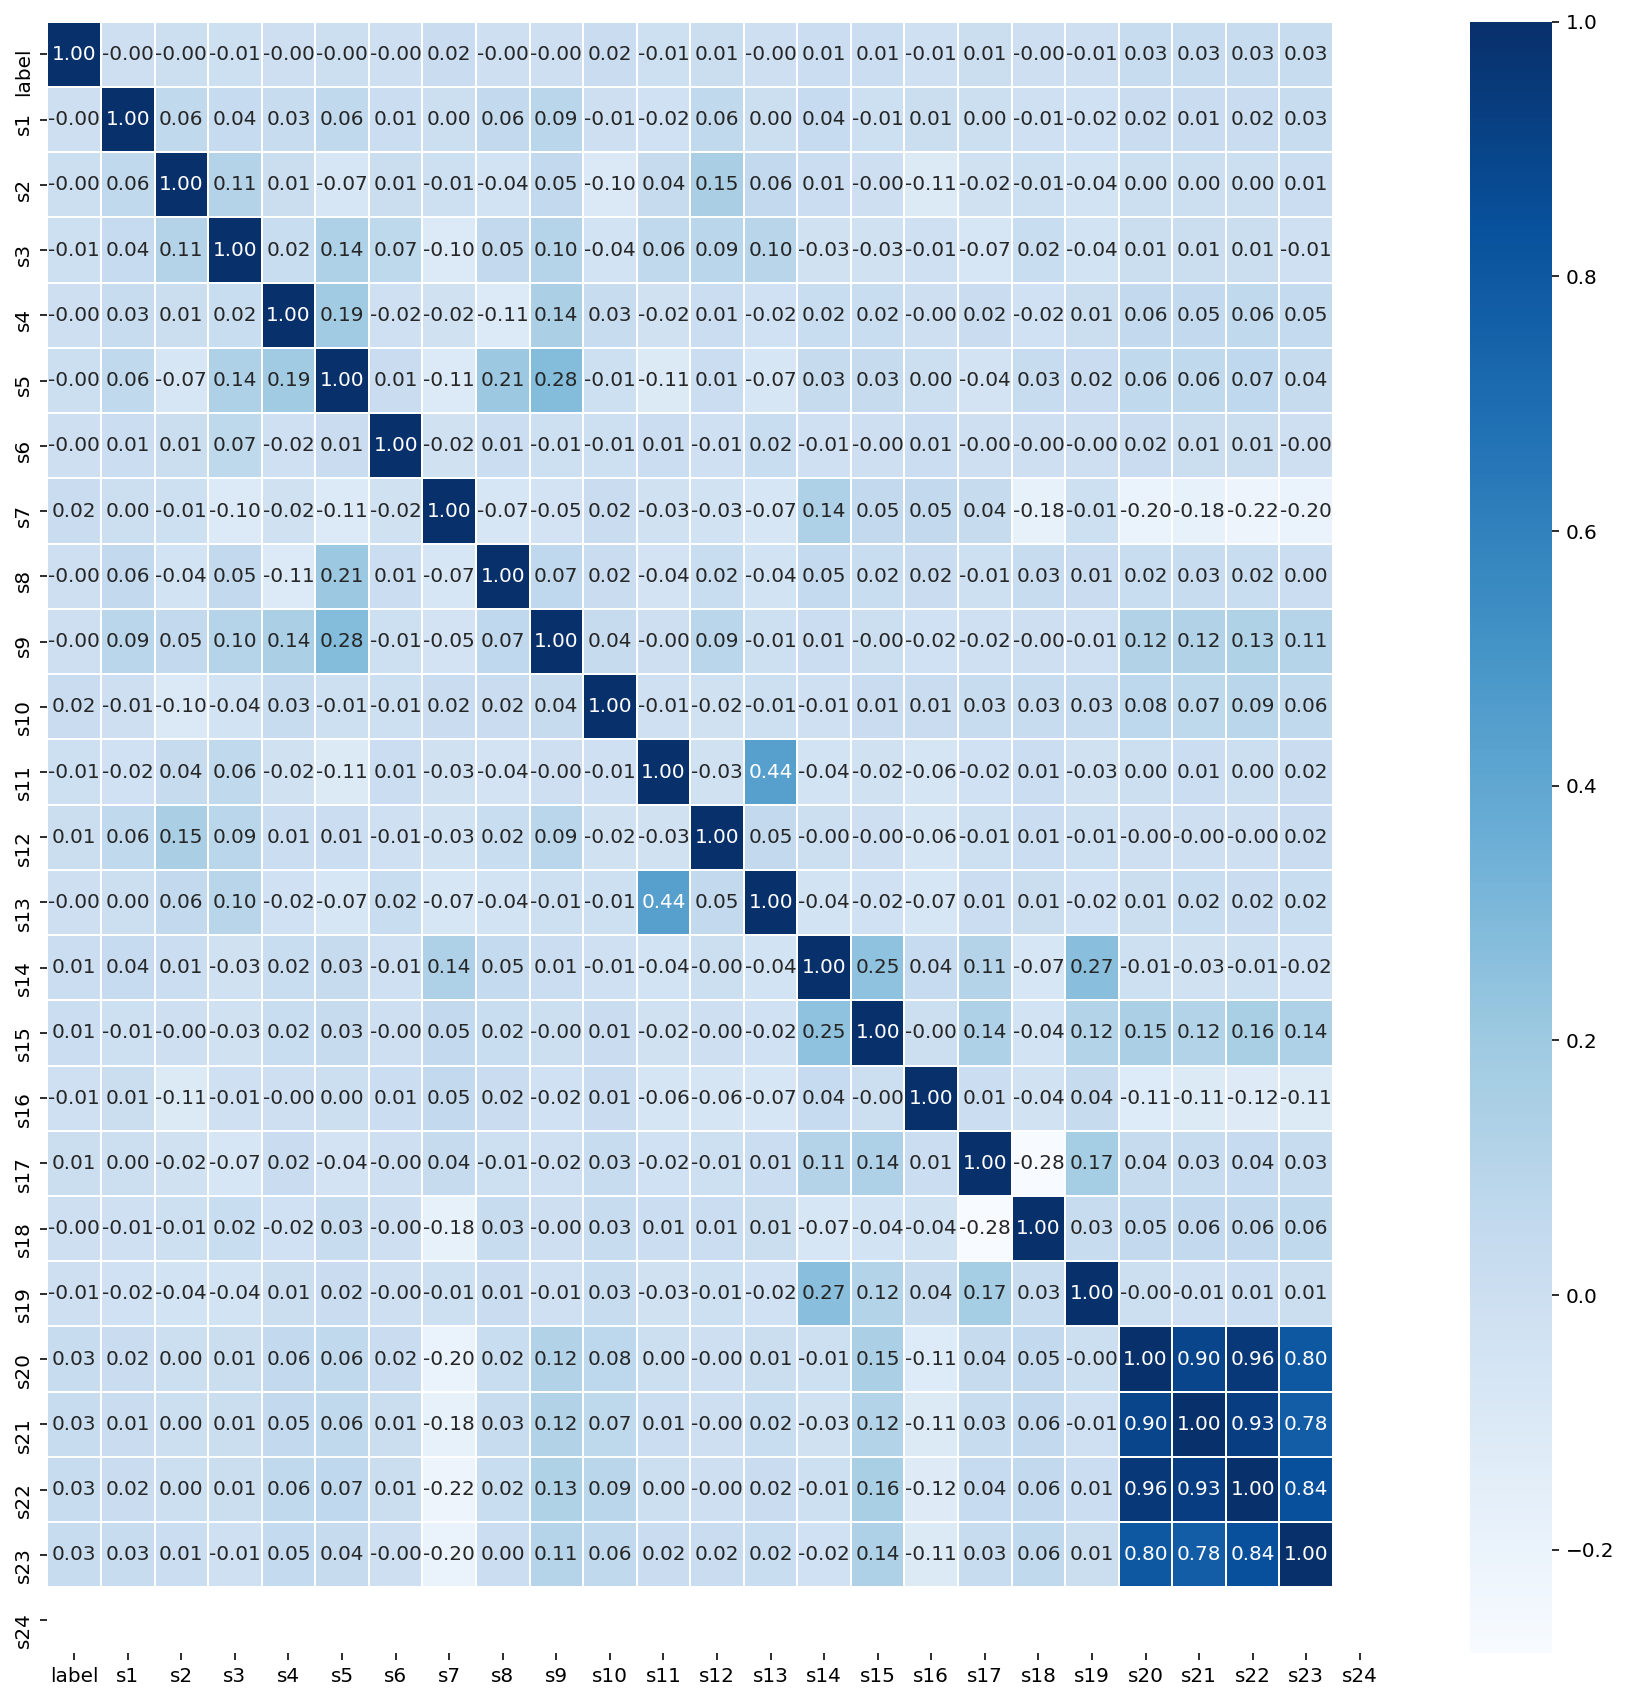

In [23]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(15,15))
sns.heatmap(data = train_data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

```
<테스트용 데이터 상관관계 분석 결과>

1. s20 & s21 = 0.90
2. s20 & s22 = 0.96
3. s20 & s23 = 0.80
4. s21 & s22 = 0.93
5. s21 & s23 = 0.78
6. s22 & s23 = 0.84
7. s11 & s13 = 0.44
```

### 2.6.1. 테스트용 non-fraud 데이터 상관관계 분석

In [24]:
nonfraud_test_data.corr()

label        s1        s2        s3        s4        s5        s6  \
label    NaN       NaN       NaN       NaN       NaN       NaN       NaN   
s1       NaN  1.000000  0.079175  0.033736  0.031289  0.053154  0.009613   
s2       NaN  0.079175  1.000000  0.101329 -0.027648 -0.025998 -0.017823   
s3       NaN  0.033736  0.101329  1.000000  0.005572  0.140260  0.104626   
s4       NaN  0.031289 -0.027648  0.005572  1.000000  0.275051 -0.023044   
s5       NaN  0.053154 -0.025998  0.140260  0.275051  1.000000  0.008302   
s6       NaN  0.009613 -0.017823  0.104626 -0.023044  0.008302  1.000000   
s7       NaN -0.020426 -0.017731 -0.061431 -0.019676 -0.089507 -0.019445   
s8       NaN  0.058063 -0.017477  0.010185 -0.079809  0.239884  0.009682   
s9       NaN  0.092314  0.108477  0.125957  0.166584  0.304064 -0.049799   
s10      NaN  0.105877 -0.012823 -0.061295 -0.002977 -0.059032 -0.010096   
s11      NaN -0.009571  0.038796  0.073351 -0.041137 -0.081437  0.023106   
s12      NaN  0.044984  0.167690  0.096918  0.036876  0.071714  0.023687   
s13      NaN -0.040380  0.044504  0.121394 -0.016162 -0.022630  0.054042   
s14      NaN  0.063000  0.028039 -0.007605  0.036348  0.044194 -0.005685   
s15      NaN  0.006259  0.034948 -0.011466  0.065802  0.032183  0.012481   
s16      NaN -0.013084 -0.105602 -0.000049 -0.012499  0.008025 -0.031495   
s17      NaN  0.016258  0.009788 -0.085341 -0.005036 -0.057290 -0.003572   
s18      NaN -0.022842 -0.004062  0.037246  0.002776  0.008755  0.004022   
s19      NaN -0.021908 -0.000261 -0.028919  0.040032  0.021522 -0.012930   
s20      NaN  0.031982  0.058475  0.006984  0.027099  0.065160  0.005927   
s21      NaN  0.026758  0.059317  0.031715  0.014044  0.059726  0.010191   
s22      NaN  0.026748  0.063756  0.006709  0.017949  0.065812  0.008348   
s23      NaN  0.063248  0.062126 -0.067039  0.036804  0.019346 -0.010327   
s24      NaN       NaN       NaN       NaN       NaN       NaN       NaN   

             s7        s8        s9  ...       s15       s16       s17  \
label       NaN       NaN       NaN  ...       NaN       NaN       NaN   
s1    -0.020426  0.058063  0.092314  ...  0.006259 -0.013084  0.016258   
s2    -0.017731 -0.017477  0.108477  ...  0.034948 -0.105602  0.009788   
s3    -0.061431  0.010185  0.125957  ... -0.011466 -0.000049 -0.085341   
s4    -0.019676 -0.079809  0.166584  ...  0.065802 -0.012499 -0.005036   
s5    -0.089507  0.239884  0.304064  ...  0.032183  0.008025 -0.057290   
s6    -0.019445  0.009682 -0.049799  ...  0.012481 -0.031495 -0.003572   
s7     1.000000 -0.091342 -0.081419  ...  0.061157  0.055340  0.048115   
s8    -0.091342  1.000000  0.088549  ...  0.015887  0.022419 -0.051944   
s9    -0.081419  0.088549  1.000000  ... -0.001629 -0.046788 -0.048702   
s10    0.018821 -0.009202 -0.040307  ... -0.040328  0.009418  0.029027   
s11   -0.047749 -0.090298  0.017793  ... -0.004528 -0.086592 -0.050996   
s12   -0.054643  0.069548  0.150150  ...  0.033274 -0.072274 -0.032744   
s13   -0.070770 -0.060469  0.053993  ...  0.015908 -0.090724 -0.013485   
s14    0.150054  0.044348  0.055615  ...  0.219057  0.030808  0.134149   
s15    0.061157  0.015887 -0.001629  ...  1.000000 -0.014393  0.147284   
s16    0.055340  0.022419 -0.046788  ... -0.014393  1.000000 -0.007489   
s17    0.048115 -0.051944 -0.048702  ...  0.147284 -0.007489  1.000000   
s18   -0.185602  0.070764  0.018444  ... -0.026268 -0.043361 -0.308614   
s19   -0.008924 -0.000769  0.022545  ...  0.107488 -0.020986  0.153875   
s20   -0.306316  0.060639  0.031542  ...  0.319017 -0.080464  0.075434   
s21   -0.282336  0.079017  0.035854  ...  0.230521 -0.098313  0.056007   
s22   -0.336155  0.070649  0.038080  ...  0.278880 -0.097702  0.080555   
s23   -0.283460  0.021142  0.012882  ...  0.242989 -0.109206  0.072737   
s24         NaN       NaN       NaN  ...       NaN       NaN       NaN   

            s18       s19       s20       s21       s22       s23  s24  
label       NaN       NaN       

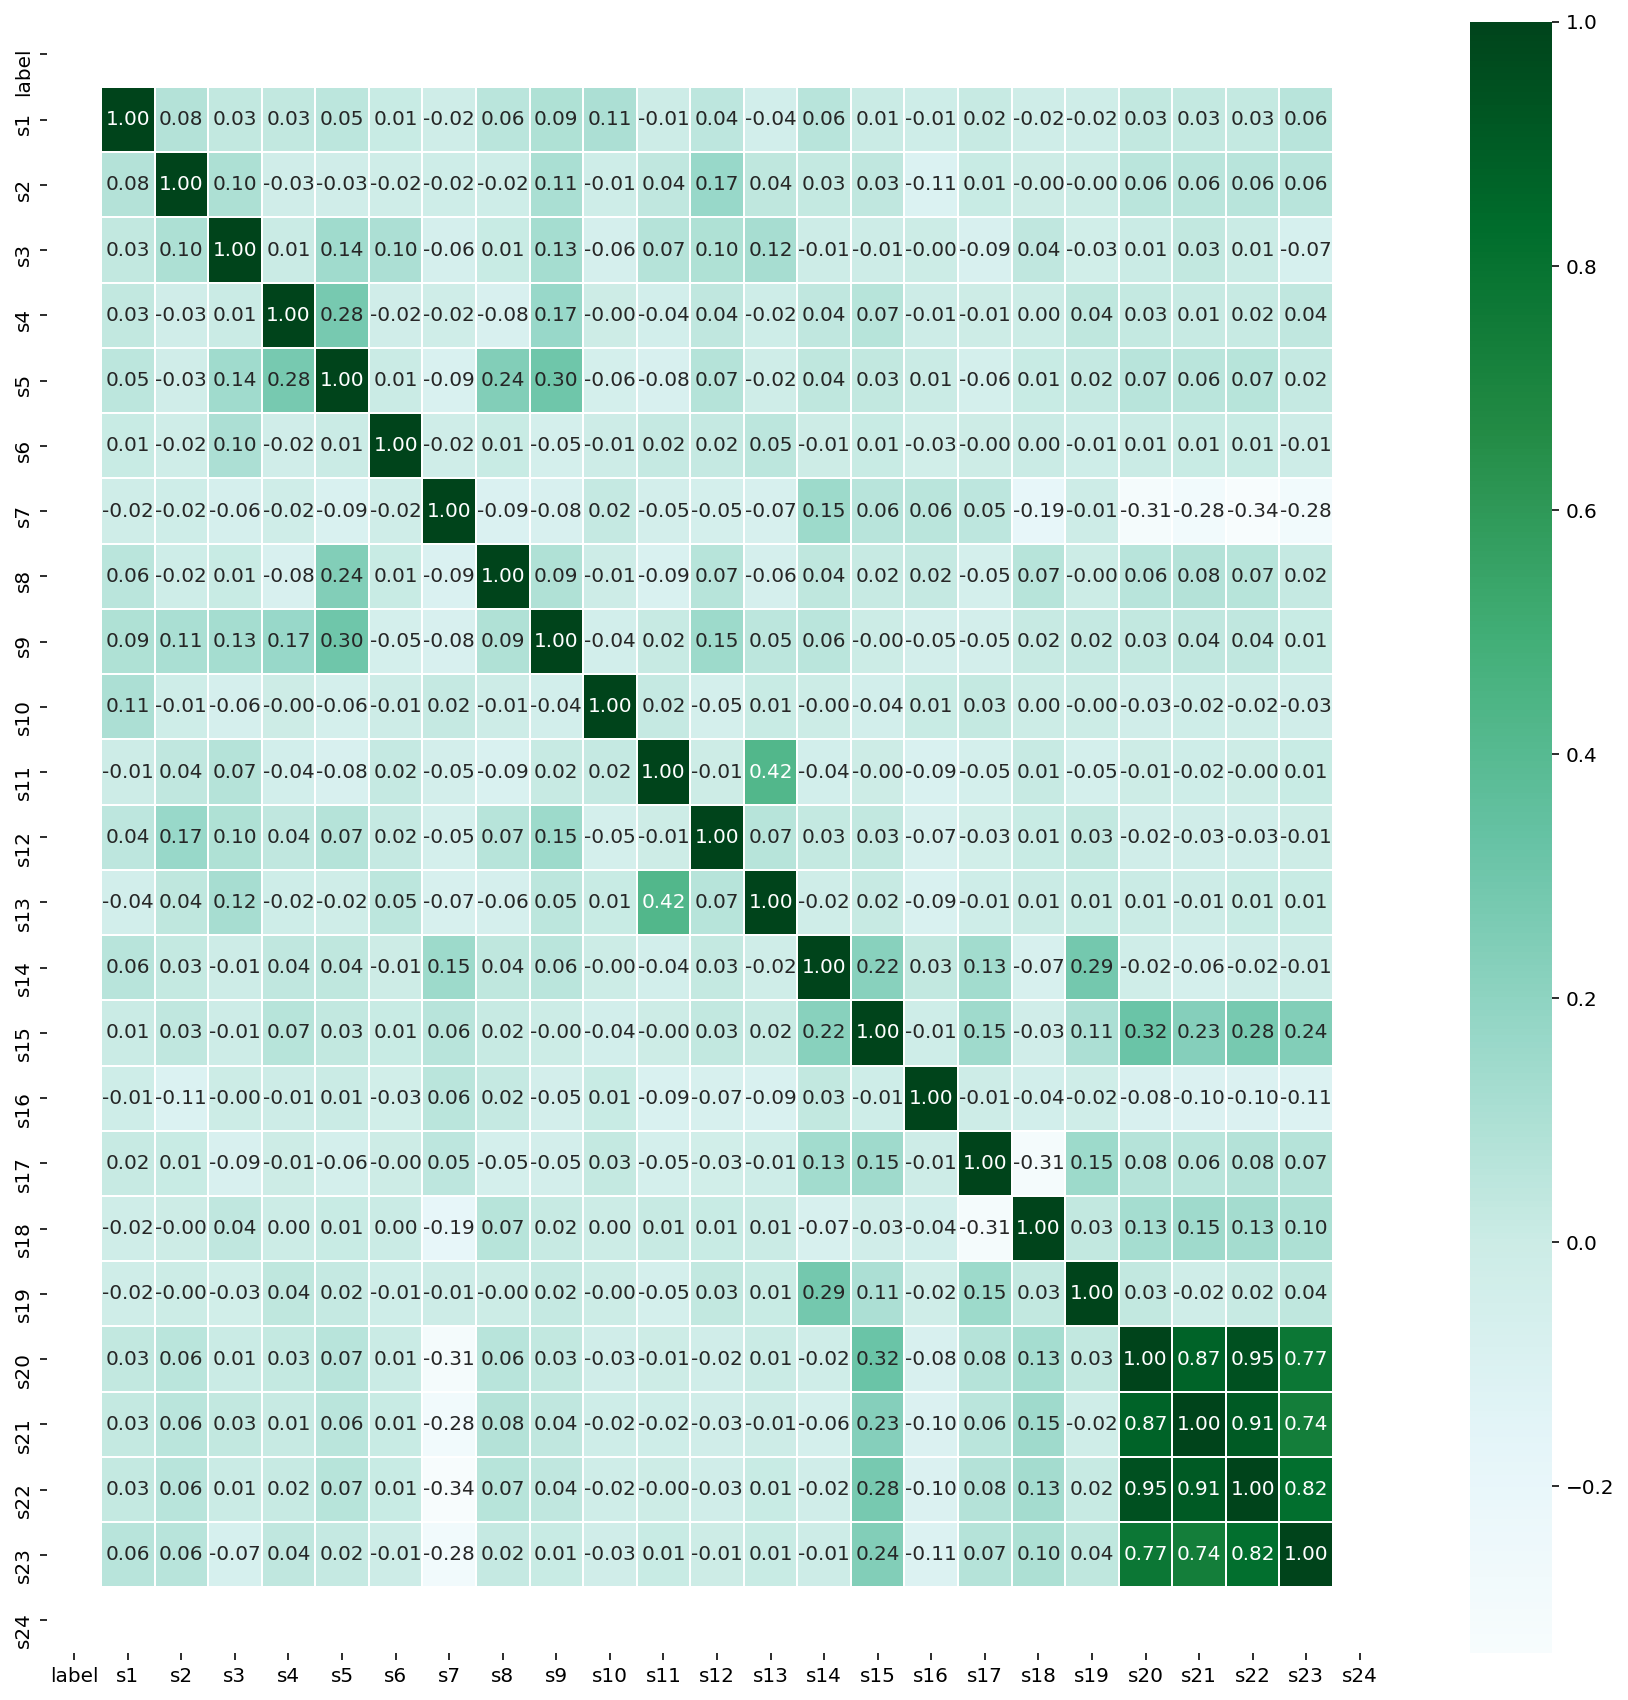

In [25]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(15,15))
sns.heatmap(data = nonfraud_test_data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='BuGn')

```
<테스트용 non-fruad 데이터 상관관계 분석 결과>

1. s20 & s21 = 0.87
2. s20 & s22 = 0.95
3. s20 & s23 = 0.77
4. s21 & s22 = 0.91
5. s21 & s23 = 0.74
6. s22 & s23 = 0.82
7. s11 & s13 = 0.42
```

### 2.6.2. 테스트용 fraud 데이터 상관관계 분석

In [26]:
fraud_test_data.corr()

label        s1        s2        s3        s4        s5  s6        s7  \
label    NaN       NaN       NaN       NaN       NaN       NaN NaN       NaN   
s1       NaN  1.000000  0.353553 -0.509525 -0.091287 -0.032275 NaN  0.471405   
s2       NaN  0.353553  1.000000 -0.320256 -0.258199  0.228218 NaN  0.166667   
s3       NaN -0.509525 -0.320256  1.000000  0.372104  0.131559 NaN -0.240192   
s4       NaN -0.091287 -0.258199  0.372104  1.000000  0.848528 NaN -0.645497   
s5       NaN -0.032275  0.228218  0.131559  0.848528  1.000000 NaN -0.547723   
s6       NaN       NaN       NaN       NaN       NaN       NaN NaN       NaN   
s7       NaN  0.471405  0.166667 -0.240192 -0.645497 -0.547723 NaN  1.000000   
s8       NaN       NaN       NaN       NaN       NaN       NaN NaN       NaN   
s9       NaN  0.547723  0.645497 -0.496139 -0.400000 -0.141421 NaN  0.258199   
s10      NaN  0.353553 -0.166667 -0.320256 -0.258199 -0.410792 NaN  0.166667   
s11      NaN -0.166667 -0.471405  0.283069 -0.091287 -0.258199 NaN  0.471405   
s12      NaN  0.374634  0.132453  0.254514  0.205196  0.072548 NaN -0.132453   
s13      NaN  0.380304  0.481218 -0.217571 -0.789352 -0.658935 NaN  0.509525   
s14      NaN  0.353553 -0.166667 -0.320256 -0.258199 -0.410792 NaN  0.166667   
s15      NaN  0.541775  0.750739 -0.490751 -0.395656 -0.078403 NaN  0.255395   
s16      NaN -0.737210 -0.382276  0.317196 -0.403786 -0.475867 NaN  0.139010   
s17      NaN  0.166667  0.471405 -0.283069  0.091287  0.258199 NaN -0.471405   
s18      NaN  0.353553 -0.166667 -0.320256 -0.258199 -0.410792 NaN  0.166667   
s19      NaN       NaN       NaN       NaN       NaN       NaN NaN       NaN   
s20      NaN  0.320256  0.905822 -0.353553 -0.131559  0.279078 NaN -0.113228   
s21      NaN  0.283069  0.800641 -0.346154 -0.062017  0.285044 NaN -0.240192   
s22      NaN  0.166667  0.471405 -0.283069  0.091287  0.258199 NaN -0.471405   
s23      NaN  0.403280  0.777714 -0.423415 -0.200805  0.127791 NaN -0.051848   
s24      NaN       NaN       NaN       NaN       NaN       NaN NaN       NaN   

       s8        s9  ...       s15       s16       s17       s18  s19  \
label NaN       NaN  ...       NaN       NaN       NaN       NaN  NaN   
s1    NaN  0.547723  ...  0.541775 -0.737210  0.166667  0.353553  NaN   
s2    NaN  0.645497  ...  0.750739 -0.382276  0.471405 -0.166667  NaN   
s3    NaN -0.496139  ... -0.490751  0.317196 -0.283069 -0.320256  NaN   
s4    NaN -0.400000  ... -0.395656 -0.403786  0.091287 -0.258199  NaN   
s5    NaN -0.141421  ... -0.078403 -0.475867  0.258199 -0.410792  NaN   
s6    NaN       NaN  ...       NaN       NaN       NaN       NaN  NaN   
s7    NaN  0.258199  ...  0.255395  0.139010 -0.471405  0.166667  NaN   
s8    NaN       NaN  ...       NaN       NaN       NaN       NaN  NaN   
s9    NaN  1.000000  ...  0.989141 -0.592220  0.730297 -0.258199  NaN   
s10   NaN -0.258199  ... -0.255395  0.104257 -0.353553  1.000000  NaN   
s11   NaN -0.091287  ... -0.169670  0.294884 -0.416667 -0.471405  NaN   
s12   NaN  0.564288  ...  0.513556 -0.662842  0.608781 -0.331133  NaN   
s13   NaN  0.745499  ...  0.737404 -0.094438  0.320256  0.084921  NaN   
s14   NaN  0.645497  ...  0.526236 -0.382276  0.471405 -0.166667  NaN   
s15   NaN  0.989141  ...  1.000000 -0.585789  0.722366 -0.255395  NaN   
s16   NaN -0.592220  ... -0.585789  1.000000 -0.638915  0.104257  NaN   
s17   NaN  0.730297  ...  0.722366 -0.638915  1.000000 -0.353553  NaN   
s18   NaN -0.258199  ... -0.255395  0.104257 -0.353553  1.000000  NaN   
s19   NaN       NaN  ...       NaN       NaN       NaN       NaN  NaN   
s20   NaN  0.789352  ...  0.857040 -0.566631  0.800641 -0.283069  NaN   
s21   NaN  0.806226  ...  0.851395 -0.617697  0.905822 -0.320256  NaN   
s22   NaN  0.730297  ...  0.722366 -0.638915  1.000000 -0.353553  NaN   
s23   NaN  0.923702  ...  0.948591 -0.637847  0.879883 -0.311086  NaN   
s24   NaN       NaN  ...       NaN       NaN       NaN       NaN  NaN   

            s20       s21  

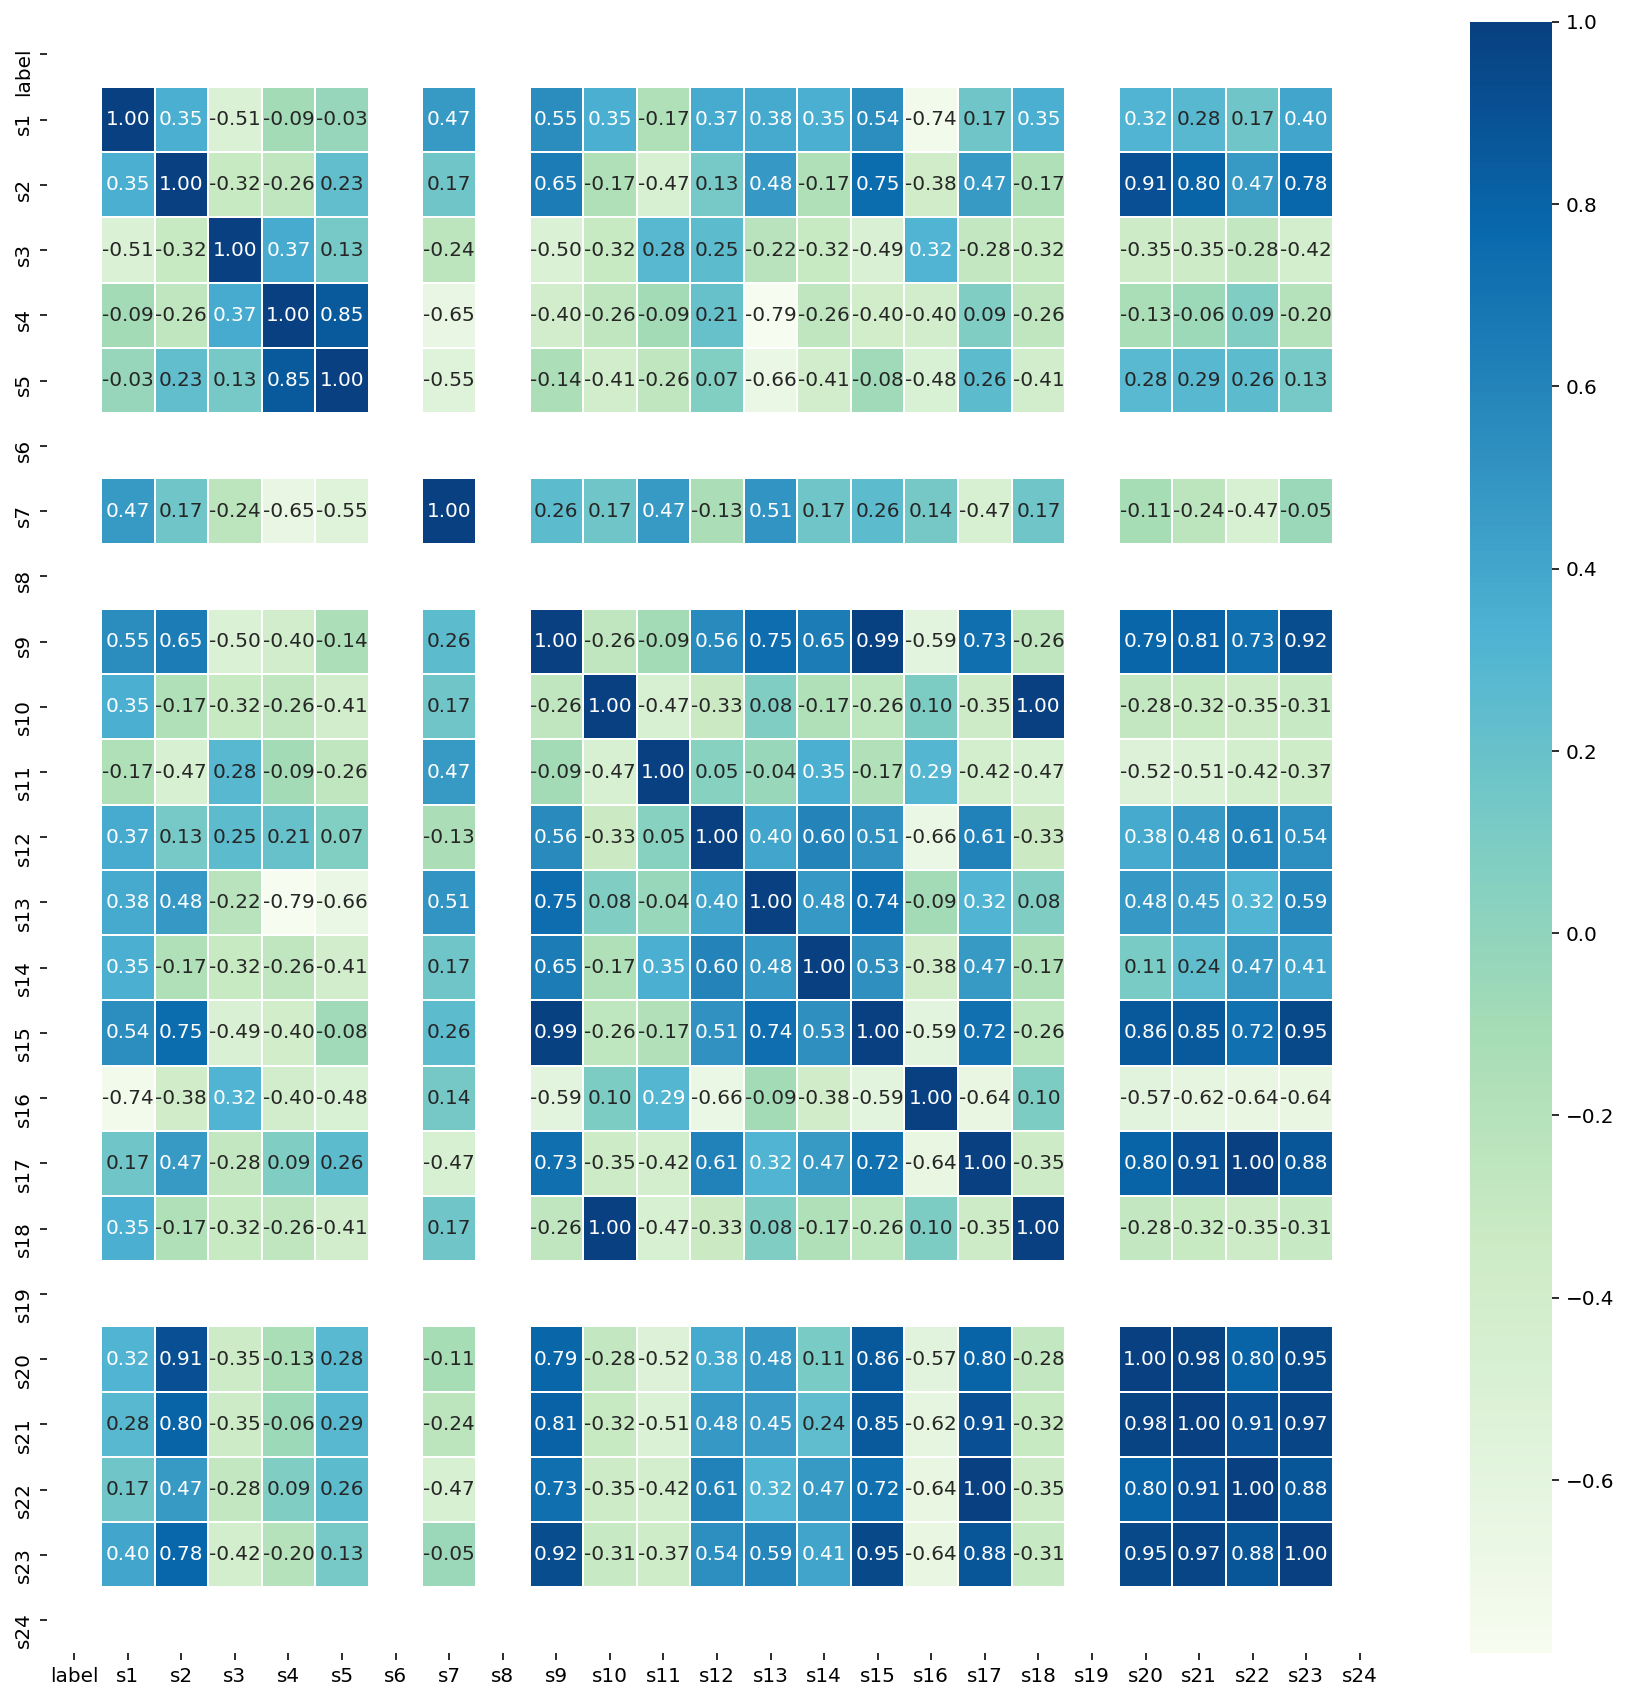

In [27]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(15,15))
sns.heatmap(data = fraud_test_data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='GnBu')
plt.savefig('savefig_fraud_test_data.png')

```
<테스트용 fruad 데이터 상관관계 분석 결과>

=> 데이터 개수가 너무 적어 서로 간 영향이 매우 크므로 상관관계 결과는 무의미하다고 판단함
```

### 2.7 훈련용 데이터 Feature 별 데이터 탐색

In [28]:
nonfraud_train_data

label  s1  s2  s3  s4  s5  s6   s7  s8  s9  ...      s15  s16  s17  \
0          0   2   1   3   0   2   0  100   2   0  ...        0    1    0   
3          0   3   1   3   0   4   0    0   2   0  ...        0    3    1   
4          0   1   0   1   0   1   0  100   1   0  ...  1209410    1    0   
8          0   2   0   4   0   4   0    0   1   0  ...        0    1    0   
10         0   3   0   1   0   1   0  100   3   0  ...        0    5    0   
...      ...  ..  ..  ..  ..  ..  ..  ...  ..  ..  ...      ...  ...  ...   
15994      0   2   0   3   1   4   0  100   1   0  ...        0    0    0   
15995      0   2   0   2   0   2   0  100   2   0  ...        0    1    1   
15996      0   2   0   2   1   4   0  100   1   1  ...        0    2    1   
15998      0   2   0   2   0   2   0  100   2   0  ...        0    4    1   
15999      0   2   0   2   0   1   0  100   1   0  ...  1188750    2    0   

       s18  s19  s20  s21  s22  s23  s24  
0        0    1    0    0    0   -1    0  
3        0    1    0    0    0   -1    0  
4        0    2    0    0    0   -1    0  
8        0    1    1    1    1    2    0  
10       0    0    0    0    0   -1    0  
...    ...  ...  ...  ...  ...  ...  ...  
15994    0    1    0    0    0   -1    0  
15995    0    1    0    0    0   -1    0  
15996    0    1    0    0    0   -1    0  
15998    0    1    0    0    0   -1    0  
15999    0    1    0    0    0   -1    0  

[12845 rows x 25 columns]

In [29]:
fraud_train_data

label  s1  s2  s3  s4  s5  s6   s7  s8  s9  ...       s15  s16  s17  \
6          1   1   1   3   0   4   0  100   3   0  ...   1217280    0    0   
18         1   1   0   1   0   4   0  100   1   0  ...         0    1    0   
45         1   2   0   1   0   2   0  100   1   1  ...         0    0    1   
60         1   1   0   3   0   3   0  100   3   0  ...         0    0    1   
83         1   2   0   2   0   1   0  100   1   0  ...         0    1    0   
119        1   2   1   5   0   4   0  100   3   1  ...   4192150    0    0   
143        1   2   0   1   0   3   0   40   2   1  ...         0    4    0   
163        1   2   0   4   0   2   0  100   3   0  ...    963800    2    0   
214        1   2   0   2   0   2   0  100   1   0  ...   1110260    0    1   
230        1   2   0   3   0   4   0  100   2   0  ...         0    0    1   
263        1   2   0   1   0   4   0  100   1   0  ...    800000    0    0   
301        1   1   0   4   0   1   0  100   3   0  ...         0    2    0   
325        1   1   1   4   0   1   0  100   1   0  ...    360000    0    0   
344        1   3   0   2   0   4   0  100   2   0  ...    471700    0    1   
364        1   2   0   3   1   4   0  100   1   0  ...         0    1    0   
383        1   2   0   2   1   4   0  100   1   0  ...   1014600    2    0   
417        1   1   0   3   0   4   0  100   3   0  ...  14865500    1    1   
436        1   2   0   3   0   2   0  100   2   0  ...   1014810    2    0   
451        1   2   0   4   0   1   0  100   1   0  ...         0    2    1   
467        1   1   0   3   0   3   0  100   1   1  ...         0    1    0   
481        1   2   1   2   0   2   0  100   1   0  ...    320000    0    0   
512        1   2   0   1   0   1   0  100   3   0  ...         0    2    1   
528        1   2   0   3   0   4   0  100   3   0  ...         0    2    0   
545        1   3   1   4   0   4   0  100   2   0  ...    351260    1    0   
561        1   2   0   1   0   1   0  100   1   0  ...    355460    0    0   
579        1   1   0   3   0   1   0  100   1   0  ...   1372160    0    0   
739        1   1   0   1   0   3   0  100   1   0  ...   1286210    0    1   
4671       1   1   0   1   0   1   0  100   2   0  ...   7860220    1    1   
5099       1   1   0   2   0   1   0  100   1   0  ...         0    2    1   
5515       1   1   0   1   0   4   0  100   2   0  ...         0    1    1   
5647       1   2   0   1   0   3   0  100   1   0  ...   1281340    1    1   
7124       1   2   0   1   0   1   0  100   1   0  ...         0    1    1   
9926       1   1   0   1   0   1   0  100   3   0  ...    263261    1    0   
11179      1   2   0   1   0   2   0  100   1   0  ...         0    1    1   

       s18  s19  s20  s21  s22  s23  s24  
6        0    1    1    2    1    2    0  
18       0    2    0    0    0   -1    0  
45       0    1    0    0    0   -1    0  
60       0    1    0    0    0   -1    0  
83       0    1    0    0    0   -1    0  
119      0    1    2    1    1    2    0  
143      0    1    1    2    1    1    0  
163      0    1    1    2    1    0    0  
214      0    1    1    1    1    2    0  
230      0    1    0    0    0   -1    0  
263      1    1    1    2    1    1    0  
301      0    1    0    0    0   -1    0  
325      0    1    1    2    1    0    0  
344      0    1    0    0    0   -1    0  
364      0    2    0    0    0   -1    0  
383      1    1    1    1    1    1    0  
417      0    3    0    0    0   -1    0  
436      0    1    0    0    0   -1    0  
451      0    2    0    0    0   -1    0  
467      0    1    0    0    0   -1    0  
481      0    1    1    1    1    1    0  
512      0    2    0    0    0   -1    0  
528      0    2    0    0    0   -1    0  
545      0    1    1    1    1    3    0  
561      1    1    1    1    1    2    0  
579      1    1    1    1    1    1    0  
739      0    2    0    0    0   -1    0  
4671     0    1    1    1    1    0    0  
5099     0    1    0    0    

### 2.7.1. s1 

In [30]:
s1_1_non = len(nonfraud_train_data[nonfraud_train_data['s1']==1])
s1_2_non = len(nonfraud_train_data[nonfraud_train_data['s1']==2])
s1_3_non = len(nonfraud_train_data[nonfraud_train_data['s1']==3])
s1_4_non = len(nonfraud_train_data[nonfraud_train_data['s1']==4])
s1_5_non = len(nonfraud_train_data[nonfraud_train_data['s1']==5])

In [31]:
s1_1 = len(fraud_train_data[fraud_train_data['s1']==1])
s1_2 = len(fraud_train_data[fraud_train_data['s1']==2])
s1_3 = len(fraud_train_data[fraud_train_data['s1']==3])
s1_4 = len(fraud_train_data[fraud_train_data['s1']==4])
s1_5 = len(fraud_train_data[fraud_train_data['s1']==5])

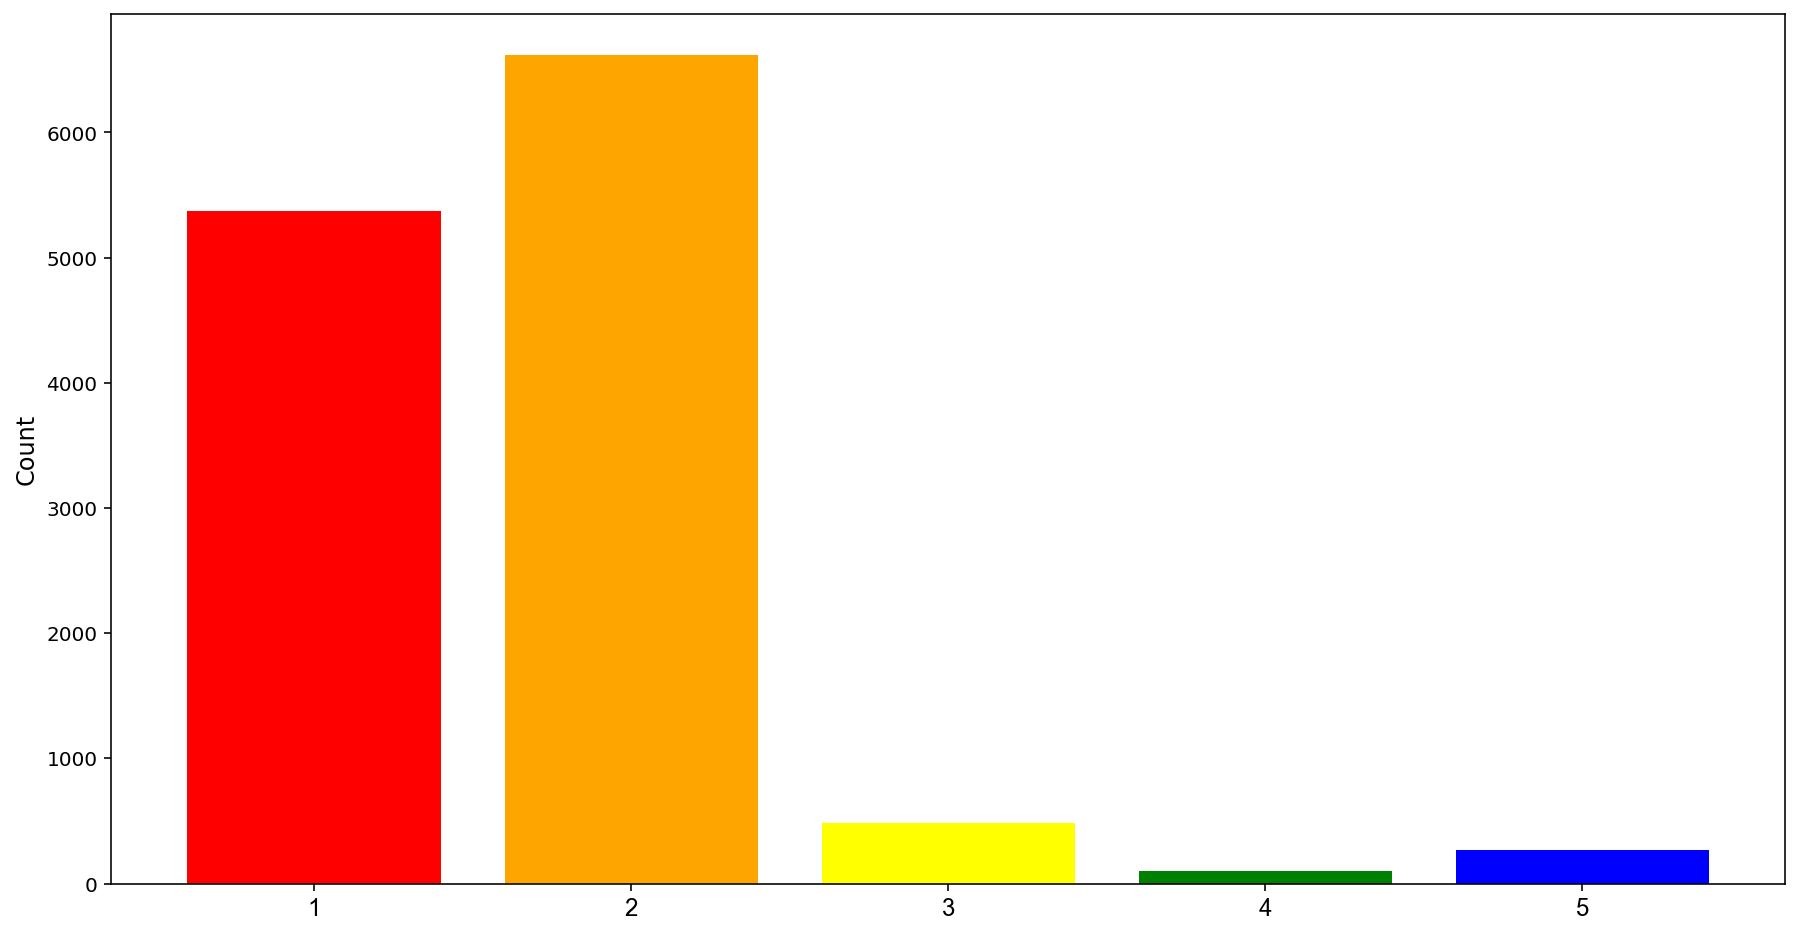

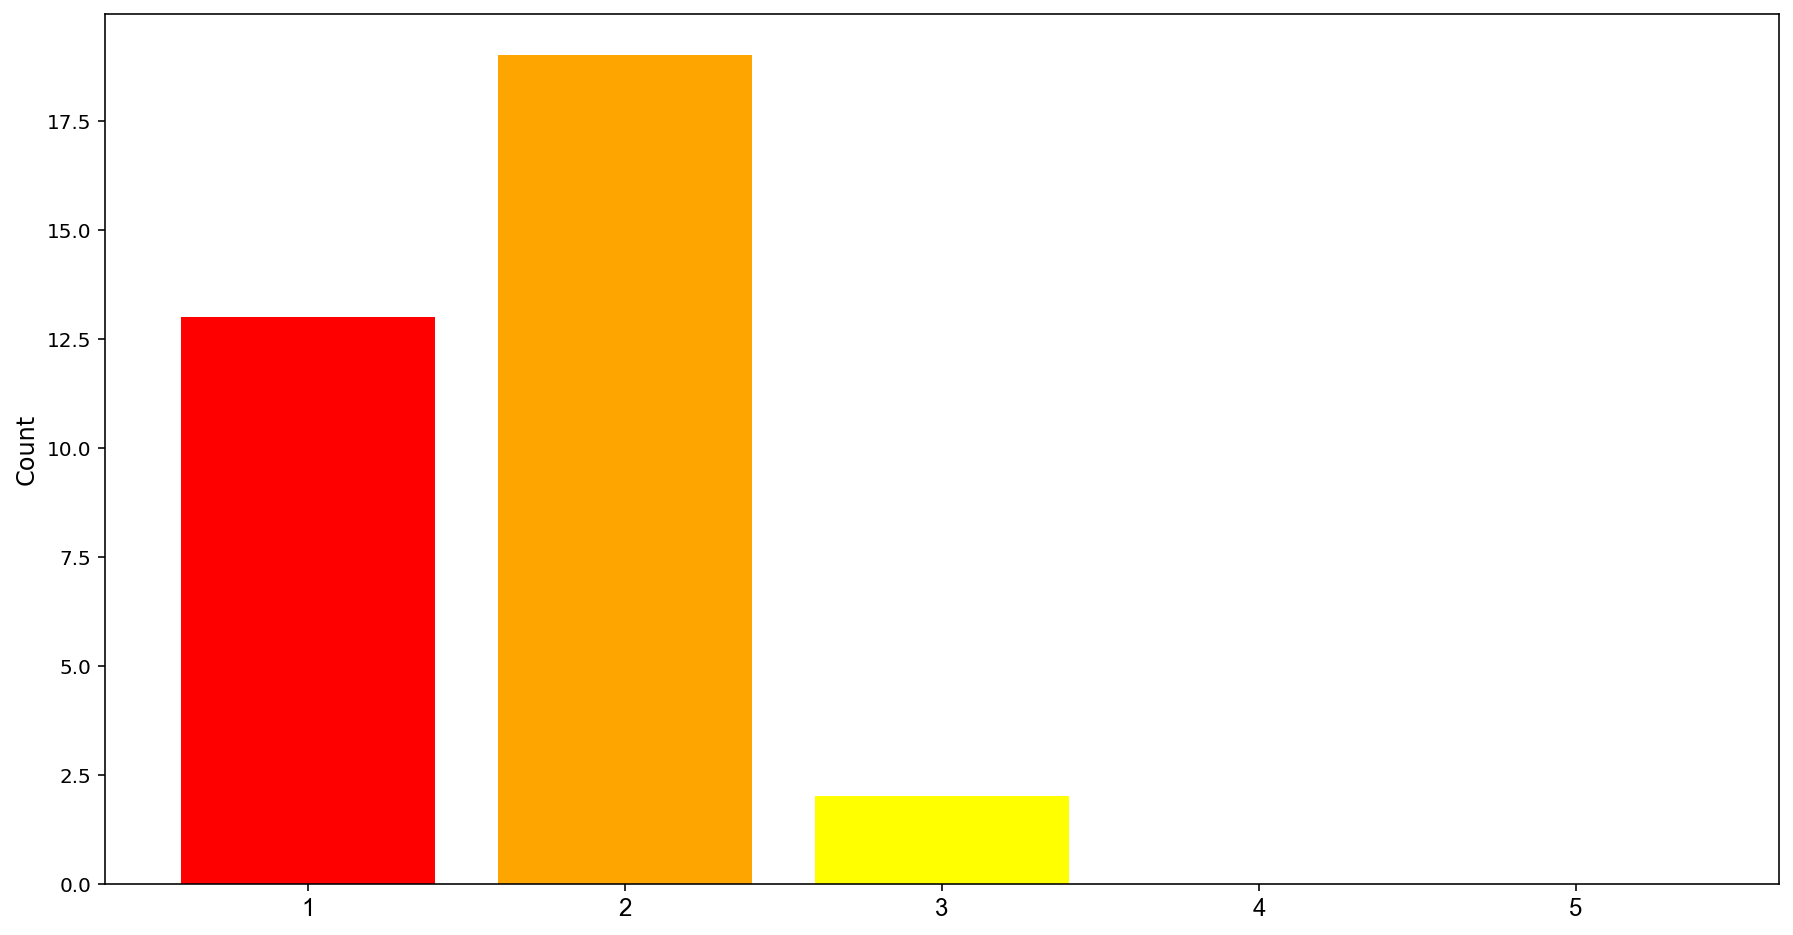

In [32]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

font = fm.FontProperties(fname='/Library/Fonts/Arial Unicode.ttf')

x = np.arange(5)
models = ['1', '2', '3', '4', '5']
values = [s1_1_non, s1_2_non, s1_3_non, s1_4_non, s1_5_non]

colors = ['Red','Orange','Yellow','Green','Blue'] 
plt.rcParams["figure.figsize"] = (15,8)
plt.bar(x, values, color=colors)
plt.xticks(x, models, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

y = np.arange(5)
model = ['1', '2', '3', '4', '5']
value = [s1_1, s1_2, s1_3, s1_4, s1_5]

colors = ['Red','Orange','Yellow','Green','Blue'] 
plt.rcParams["figure.figsize"] = (15,8)
plt.bar(y, value, color=colors)
plt.xticks(y, model, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()


In [33]:
s1_non_df = pd.DataFrame({'s1': ['1', '2', '3', '4', '5'], 
                             'Count': [s1_1_non, s1_2_non, s1_3_non, s1_4_non, s1_5_non]}, 
                              columns=['s1', 'Count'])


s1_df = pd.DataFrame({'s1': ['1', '2', '3', '4', '5'], 
                             'Count': [s1_1, s1_2, s1_3, s1_4, s1_5]}, 
                              columns=['s1', 'Count'])


In [34]:
s1_non_df

s1  Count
0  1   5369
1  2   6617
2  3    488
3  4    102
4  5    269

In [35]:
s1_df

s1  Count
0  1     13
1  2     19
2  3      2
3  4      0
4  5      0

### 2.7.2. s2 

In [36]:
s2_0_non = len(nonfraud_train_data[nonfraud_train_data['s2']==0]) 
s2_1_non = len(nonfraud_train_data[nonfraud_train_data['s2']==1]) 

In [37]:
s2_0 = len(fraud_train_data[fraud_train_data['s2']==0]) 
s2_1 = len(fraud_train_data[fraud_train_data['s2']==1])  

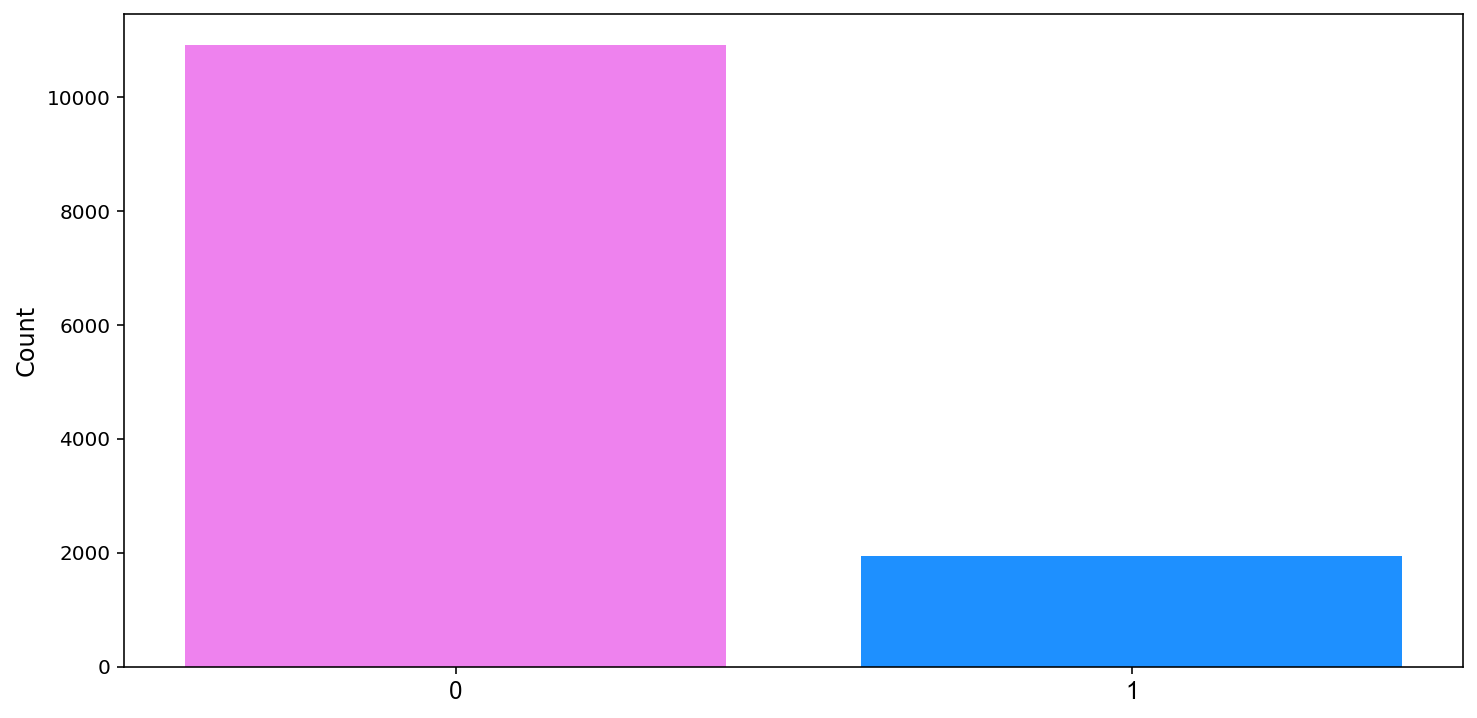

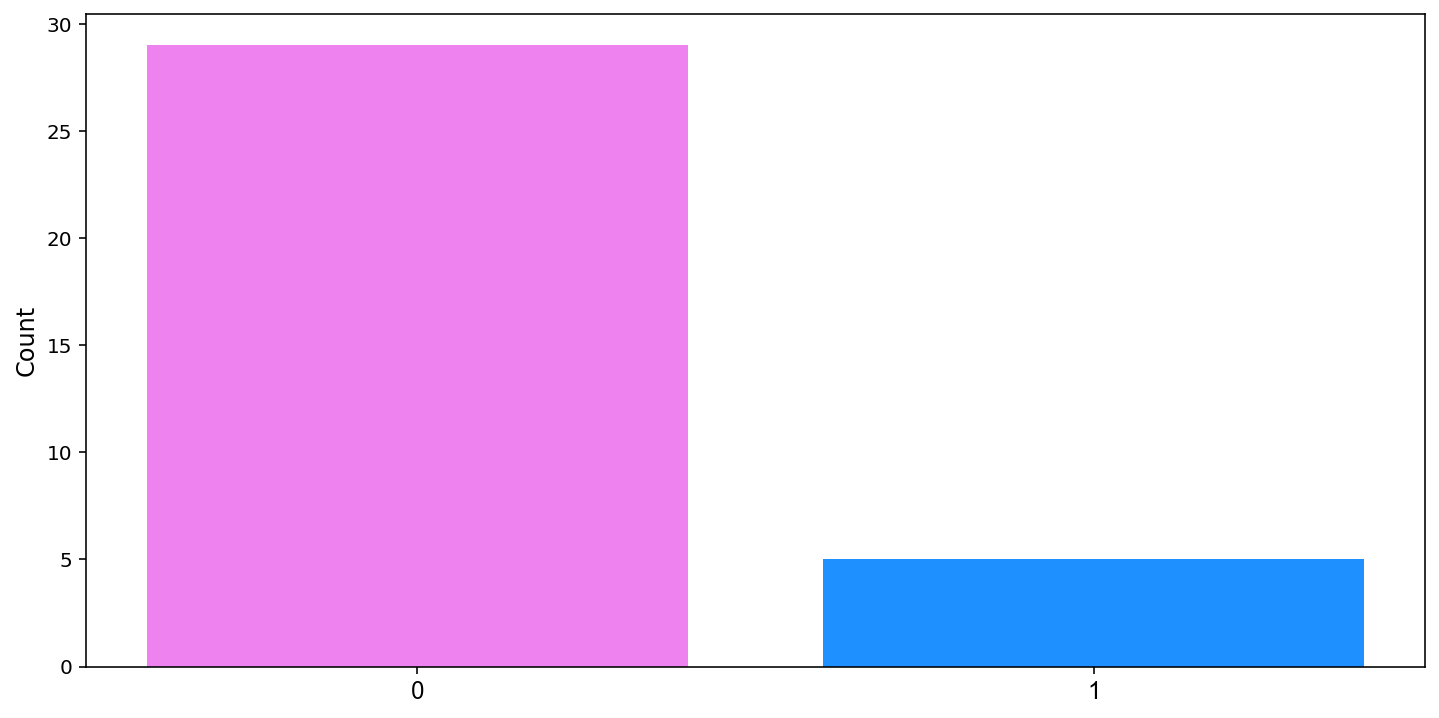

In [38]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

font = fm.FontProperties(fname='/Library/Fonts/Arial Unicode.ttf')

x = np.arange(2)
s2s = ['0', '1']
values = [s2_0_non, s2_1_non]

colors = ['violet','dodgerblue'] 
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(x, values, color=colors)
plt.xticks(x, s2s, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

y = np.arange(2)
s2 = ['0', '1']
value = [s2_0, s2_1]

colors = ['violet','dodgerblue'] 
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(x, value, color=colors)
plt.xticks(x, s2, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)


plt.show()


In [39]:
s2_non_df = pd.DataFrame({'s2': ['0', '1',], 
                             'Count': [s2_0_non, s2_1_non]}, 
                              columns=['s2', 'Count'])

s2_df = pd.DataFrame({'s2': ['0', '1',], 
                             'Count': [s2_0, s2_1]}, 
                              columns=['s2', 'Count'])

In [40]:
s2_non_df

s2  Count
0  0  10911
1  1   1934

In [41]:
s2_df

s2  Count
0  0     29
1  1      5

### 2.7.3. s3 

In [42]:
s3_1_non = len(nonfraud_train_data[nonfraud_train_data['s3']==1])
s3_2_non = len(nonfraud_train_data[nonfraud_train_data['s3']==2])
s3_3_non = len(nonfraud_train_data[nonfraud_train_data['s3']==3])
s3_4_non = len(nonfraud_train_data[nonfraud_train_data['s3']==4])
s3_5_non = len(nonfraud_train_data[nonfraud_train_data['s3']==5])

In [43]:
s3_1 = len(fraud_train_data[fraud_train_data['s3']==1])
s3_2 = len(fraud_train_data[fraud_train_data['s3']==2])
s3_3 = len(fraud_train_data[fraud_train_data['s3']==3])
s3_4 = len(fraud_train_data[fraud_train_data['s3']==4])
s3_5 = len(fraud_train_data[fraud_train_data['s3']==5])

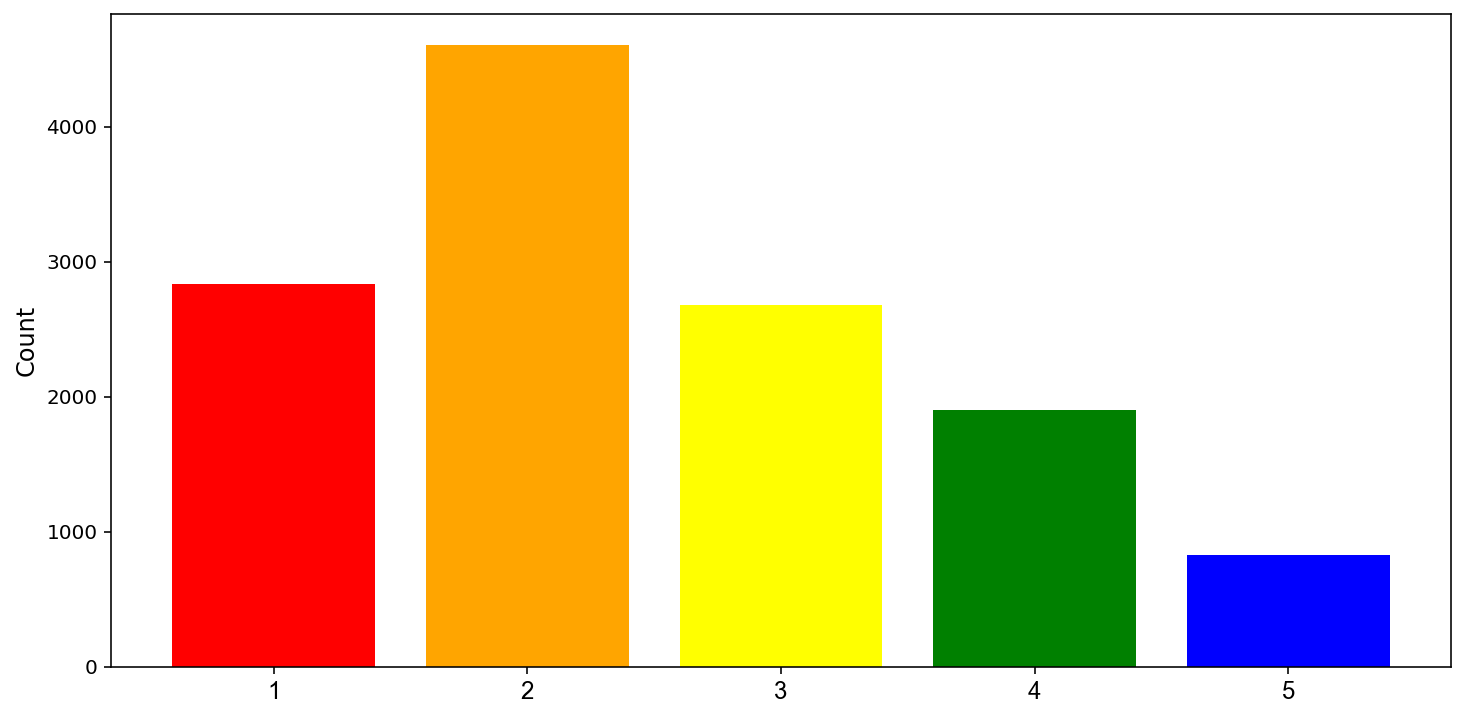

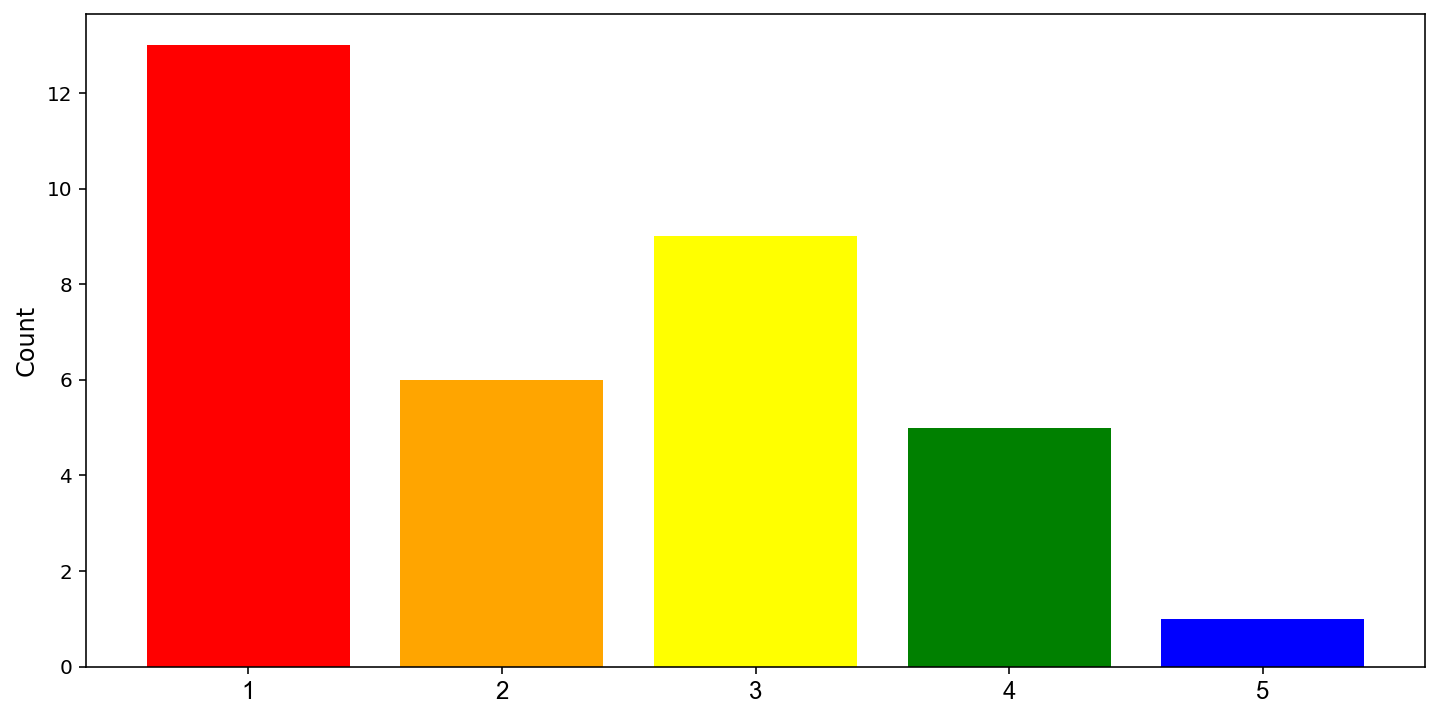

In [44]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

font = fm.FontProperties(fname='/Library/Fonts/Arial Unicode.ttf')

x = np.arange(5)
ages = ['1', '2', '3', '4', '5']
values = [s3_1_non, s3_2_non, s3_3_non, s3_4_non, s3_5_non]

colors = ['Red','Orange','Yellow','Green','Blue'] 
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(x, values, color=colors)
plt.xticks(x, ages, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

y = np.arange(5)
age = ['1', '2', '3', '4', '5']
value = [s3_1, s3_2, s3_3, s3_4, s3_5]

colors = ['Red','Orange','Yellow','Green','Blue'] 
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(y, value, color=colors)
plt.xticks(y, age, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()



In [45]:
s3_non_df = pd.DataFrame({'s3': ['1', '2', '3', '4', '5'], 
                             'Count': [s3_1_non, s3_2_non, s3_3_non, s3_4_non, s3_5_non]}, 
                              columns=['s3', 'Count'])

s3_df = pd.DataFrame({'s3': ['1', '2', '3', '4', '5'], 
                             'Count': [s3_1, s3_2, s3_3, s3_4, s3_5]}, 
                              columns=['s3', 'Count'])

In [46]:
s3_non_df

s3  Count
0  1   2834
1  2   4602
2  3   2679
3  4   1903
4  5    827

In [47]:
s3_df

s3  Count
0  1     13
1  2      6
2  3      9
3  4      5
4  5      1

### 2.7.4. s4

In [48]:
accident_0_non = len(nonfraud_train_data[nonfraud_train_data['s4']==0])
accident_1_non = len(nonfraud_train_data[nonfraud_train_data['s4']==1])

In [49]:
accident_0 = len(fraud_train_data[fraud_train_data['s4']==0])
accident_1 = len(fraud_train_data[fraud_train_data['s4']==1])

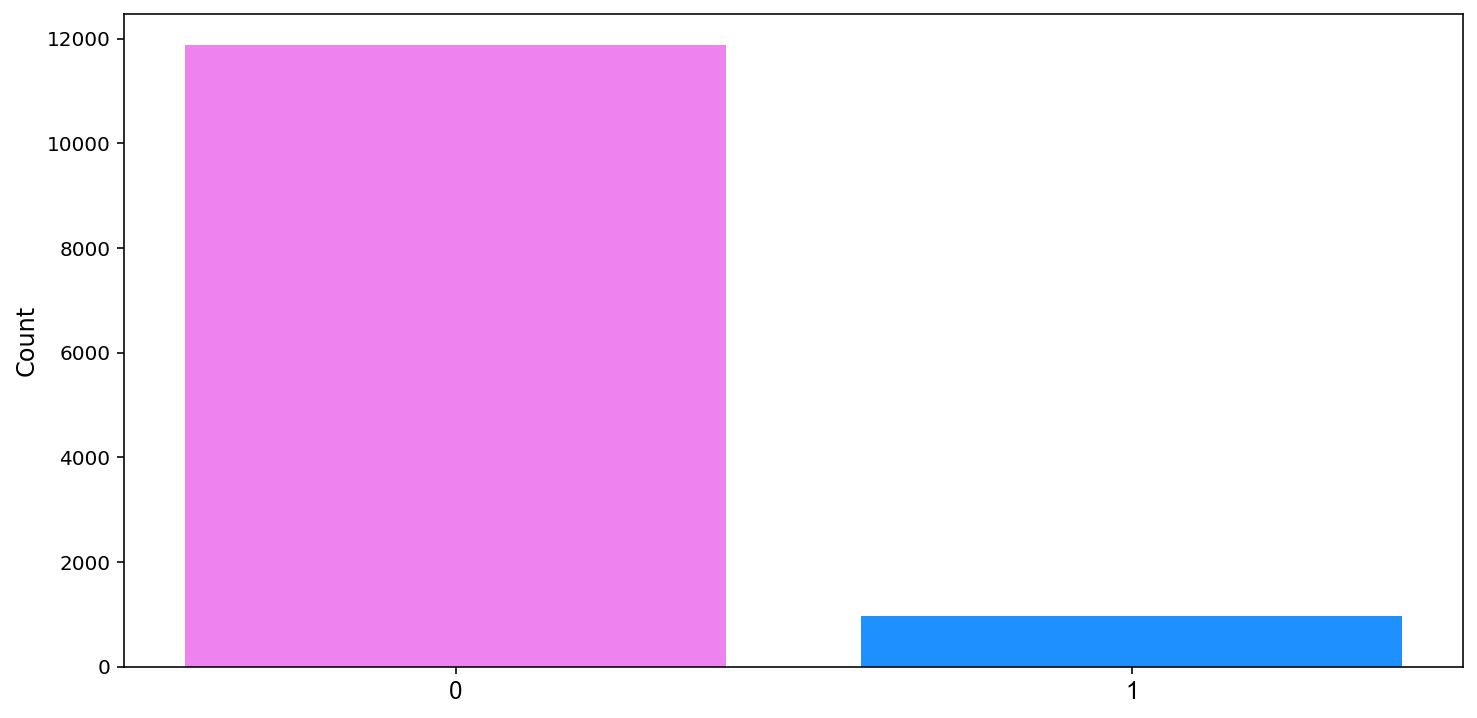

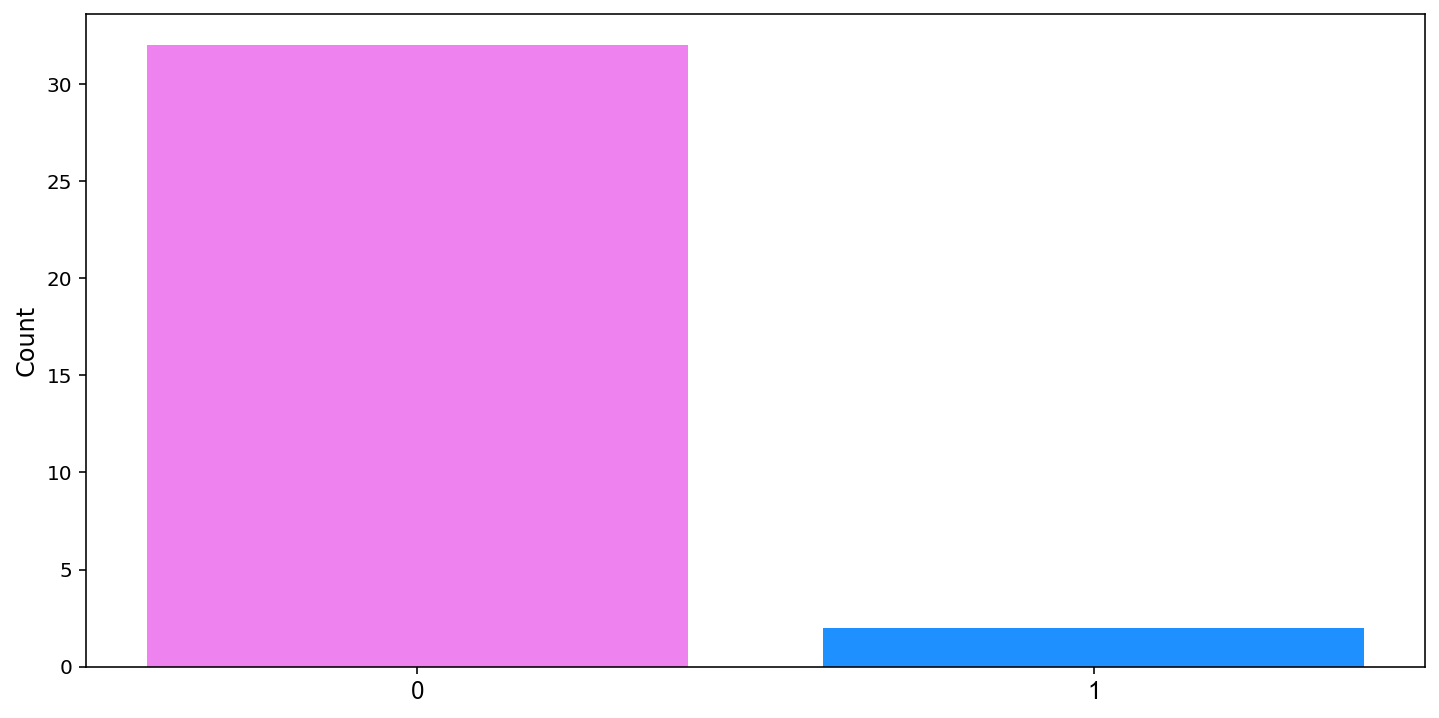

In [50]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

font = fm.FontProperties(fname='/Library/Fonts/Arial Unicode.ttf')

x = np.arange(2)
accidents = ['0', '1']
values = [accident_0_non, accident_1_non]

colors = ['violet','dodgerblue']  
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(x, values, color=colors)
plt.xticks(x, accidents, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

y = np.arange(2)
accident = ['0', '1']
value = [accident_0, accident_1]

colors = ['violet','dodgerblue'] 
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(y, value, color=colors)
plt.xticks(y, accident, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()



In [51]:
accident_non_df = pd.DataFrame({'s4': ['0', '1',], 
                             'Count': [accident_0_non, accident_1_non]}, 
                              columns=['s4', 'Count'])

accident_df = pd.DataFrame({'s4': ['0', '1',], 
                             'Count': [accident_0, accident_1]}, 
                              columns=['s4', 'Count'])

In [52]:
accident_non_df

s4  Count
0  0  11872
1  1    973

In [53]:
accident_df

s4  Count
0  0     32
1  1      2

### 2.7.5. s5

In [54]:
use_count_1_non = len(nonfraud_train_data[nonfraud_train_data['s5']==1])
use_count_2_non = len(nonfraud_train_data[nonfraud_train_data['s5']==2])
use_count_3_non = len(nonfraud_train_data[nonfraud_train_data['s5']==3])
use_count_4_non = len(nonfraud_train_data[nonfraud_train_data['s5']==4])

In [55]:
use_count_1 = len(fraud_train_data[fraud_train_data['s5']==1])
use_count_2 = len(fraud_train_data[fraud_train_data['s5']==2])
use_count_3 = len(fraud_train_data[fraud_train_data['s5']==3])
use_count_4 = len(fraud_train_data[fraud_train_data['s5']==4])

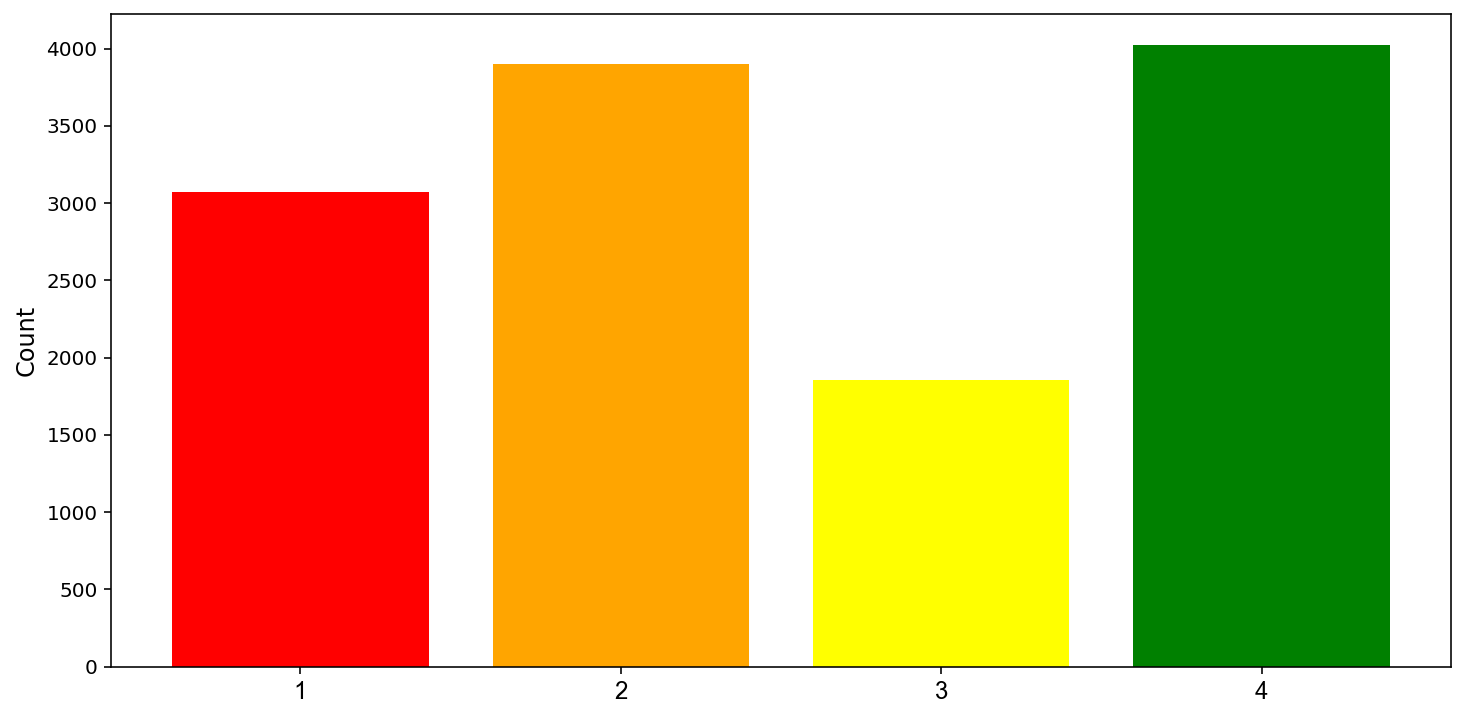

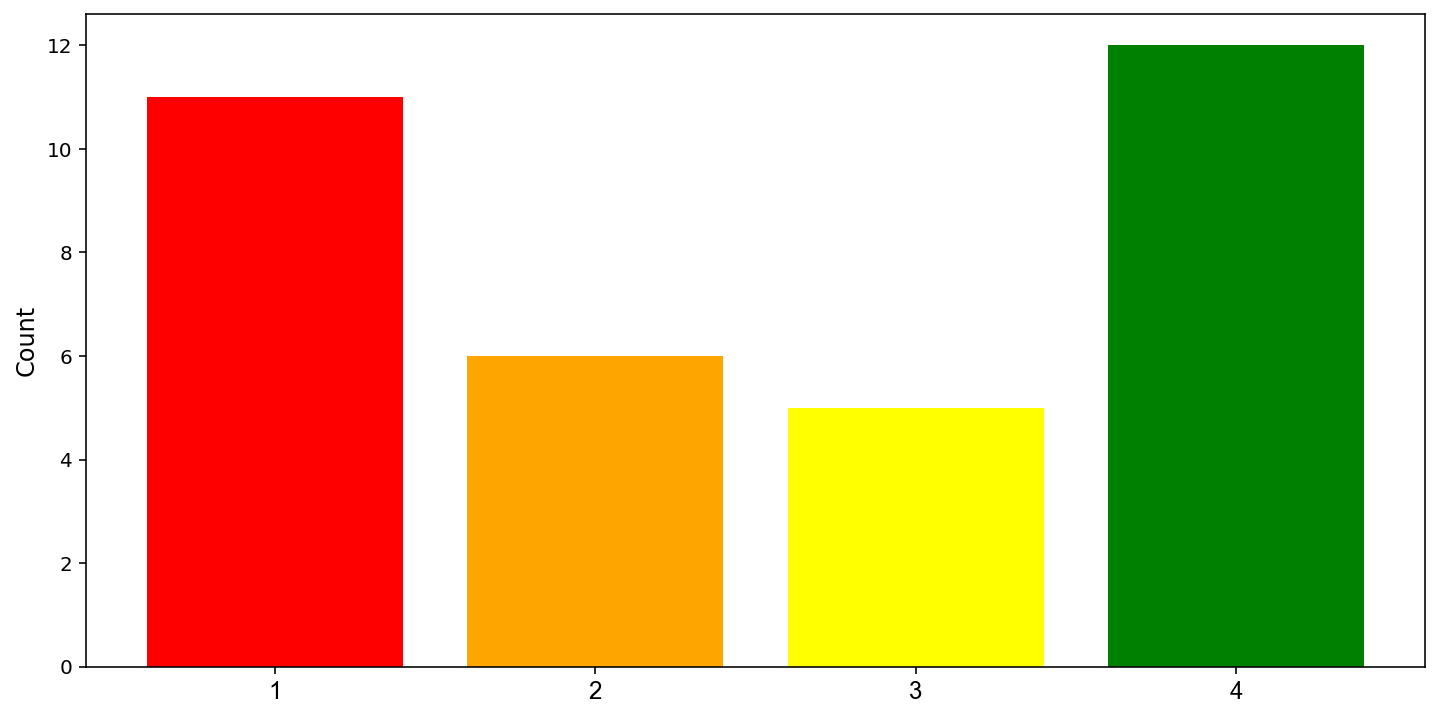

In [56]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

font = fm.FontProperties(fname='/Library/Fonts/Arial Unicode.ttf')

x = np.arange(4)
counts = ['1', '2', '3', '4']
values = [use_count_1_non, use_count_2_non, use_count_3_non, use_count_4_non]

colors = ['Red','Orange','Yellow','Green'] 
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(x, values, color=colors)
plt.xticks(x, counts, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

y = np.arange(4)
count = ['1', '2', '3', '4']
value = [use_count_1, use_count_2, use_count_3, use_count_4]

colors = ['Red','Orange','Yellow','Green'] 
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(x, value, color=colors)
plt.xticks(x, count, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()



In [57]:
cumulative_use_non_df = pd.DataFrame({'s5': ['1', '2', '3', '4'], 
                             'Count': [use_count_1_non, use_count_2_non, use_count_3_non, s3_4_non]}, 
                              columns=['s5', 'Count'])

cumulative_use_df = pd.DataFrame({'s5': ['1', '2', '3', '4'], 
                             'Count': [use_count_1, use_count_2, use_count_3, use_count_4]}, 
                              columns=['s5', 'Count'])

In [58]:
cumulative_use_non_df

s5  Count
0  1   3071
1  2   3901
2  3   1852
3  4   1903

In [59]:
cumulative_use_df

s5  Count
0  1     11
1  2      6
2  3      5
3  4     12

### 2.7.6. s6 

In [60]:
s6_0_non = len(nonfraud_train_data[nonfraud_train_data['s6']==0]) 
s6_2_non = len(nonfraud_train_data[nonfraud_train_data['s6']==2])  

In [61]:
s6_0 = len(fraud_train_data[fraud_train_data['s6']==0])
s6_2 = len(fraud_train_data[fraud_train_data['s6']==2])

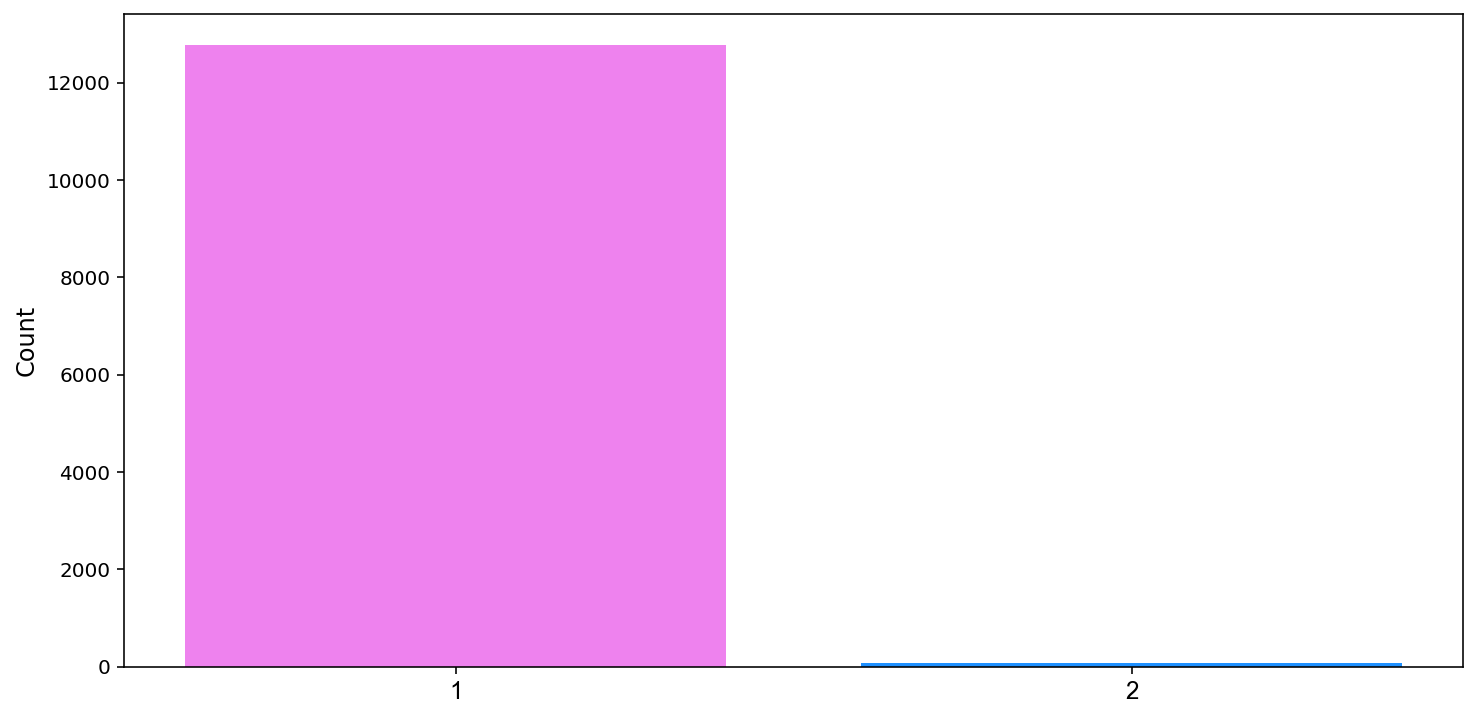

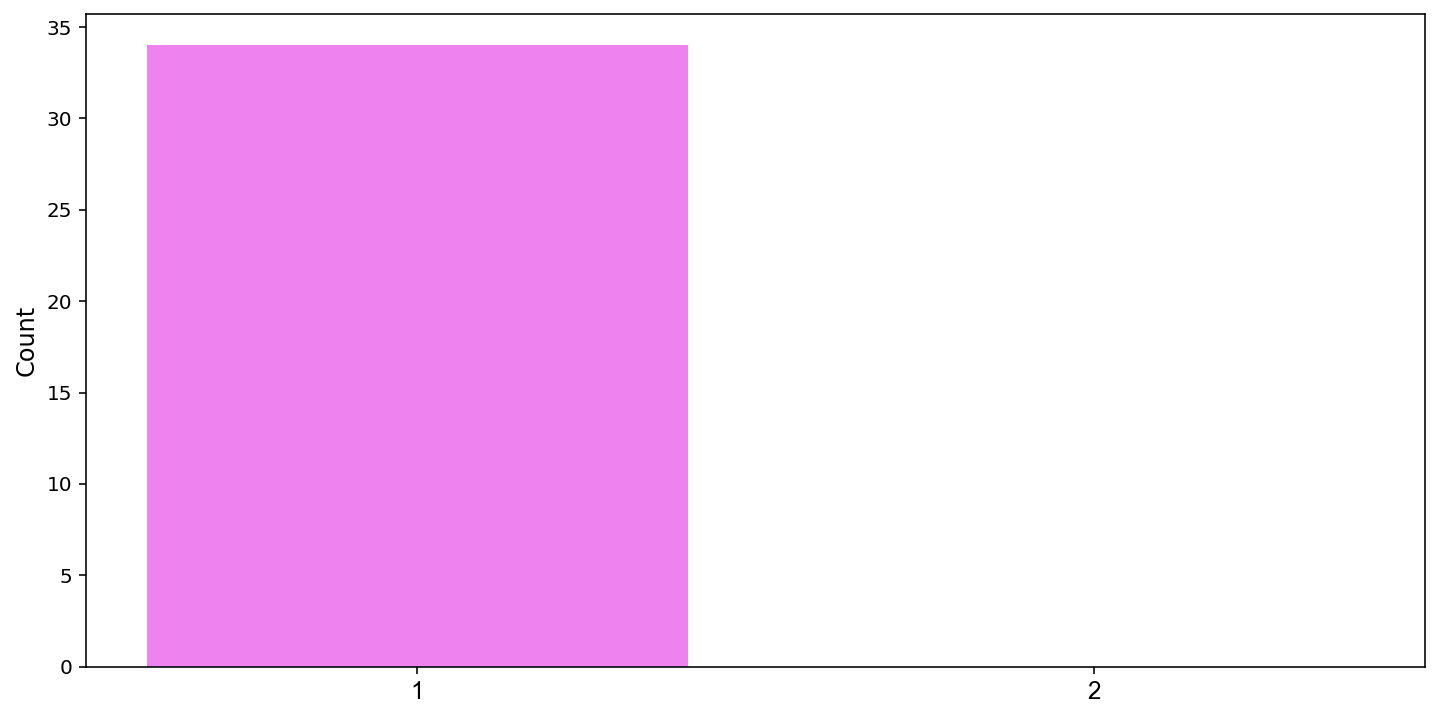

In [62]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

font = fm.FontProperties(fname='/Library/Fonts/Arial Unicode.ttf')

x = np.arange(2)
s6s = ['1', '2']
values = [s6_0_non, s6_2_non]

colors = ['violet','dodgerblue']  
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(x, values, color=colors)
plt.xticks(x, s6s, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

y = np.arange(2)
s6 = ['1', '2']
value = [s6_0, s6_2]

colors = ['violet','dodgerblue']  
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(y, value, color=colors)
plt.xticks(y, s6, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()



In [63]:
s6_non_df = pd.DataFrame({'s6': ['1', '2',], 
                             'Count': [s6_0_non, s6_2_non]}, 
                              columns=['s6', 'Count'])

s6_df = pd.DataFrame({'s6': ['1', '2',], 
                             'Count': [s6_0, s6_2]}, 
                              columns=['s6', 'Count'])

In [64]:
s6_non_df

s6  Count
0  1  12765
1  2     80

In [65]:
s6_df

s6  Count
0  1     34
1  2      0

### 2.7.7. s7 

In [66]:
ls = []
for a in range(0,101,5):
    a = len(nonfraud_train_data[nonfraud_train_data['s7']==a])
    ls.append(a)
print('Test count : ', sum(ls))
print('Real count : ', len(nonfraud_train_data['s7']))

Test count :  12845
Real count :  12845


In [67]:
s7_0_non = len(nonfraud_train_data[nonfraud_train_data['s7']==0])  
s7_5_non = len(nonfraud_train_data[nonfraud_train_data['s7']==5])
s7_10_non = len(nonfraud_train_data[nonfraud_train_data['s7']==10])
s7_15_non = len(nonfraud_train_data[nonfraud_train_data['s7']==15])
s7_20_non = len(nonfraud_train_data[nonfraud_train_data['s7']==20])
s7_25_non = len(nonfraud_train_data[nonfraud_train_data['s7']==25])
s7_30_non = len(nonfraud_train_data[nonfraud_train_data['s7']==30])
s7_35_non = len(nonfraud_train_data[nonfraud_train_data['s7']==35])
s7_40_non = len(nonfraud_train_data[nonfraud_train_data['s7']==40])
s7_45_non = len(nonfraud_train_data[nonfraud_train_data['s7']==45])
s7_50_non = len(nonfraud_train_data[nonfraud_train_data['s7']==50])
s7_55_non = len(nonfraud_train_data[nonfraud_train_data['s7']==55])
s7_60_non = len(nonfraud_train_data[nonfraud_train_data['s7']==60])
s7_65_non = len(nonfraud_train_data[nonfraud_train_data['s7']==65])
s7_70_non = len(nonfraud_train_data[nonfraud_train_data['s7']==70])
s7_75_non = len(nonfraud_train_data[nonfraud_train_data['s7']==75])
s7_80_non = len(nonfraud_train_data[nonfraud_train_data['s7']==80])
s7_85_non = len(nonfraud_train_data[nonfraud_train_data['s7']==85])
s7_90_non = len(nonfraud_train_data[nonfraud_train_data['s7']==90])
s7_95_non = len(nonfraud_train_data[nonfraud_train_data['s7']==95])
s7_100_non = len(nonfraud_train_data[nonfraud_train_data['s7']==100])

In [68]:
for a in range(0,101,5):
    b = len(nonfraud_train_data[nonfraud_train_data['s7']==a])
    print('ratio :',a,'=',b)

ratio : 0 = 1090
ratio : 5 = 0
ratio : 10 = 50
ratio : 15 = 2
ratio : 20 = 77
ratio : 25 = 4
ratio : 30 = 101
ratio : 35 = 0
ratio : 40 = 44
ratio : 45 = 0
ratio : 50 = 43
ratio : 55 = 0
ratio : 60 = 50
ratio : 65 = 3
ratio : 70 = 81
ratio : 75 = 5
ratio : 80 = 118
ratio : 85 = 8
ratio : 90 = 111
ratio : 95 = 0
ratio : 100 = 11058


In [69]:
s7_0_non = len(nonfraud_train_data[nonfraud_train_data['s7']==0])  
s7_10_non = len(nonfraud_train_data[nonfraud_train_data['s7']==10])
s7_15_non = len(nonfraud_train_data[nonfraud_train_data['s7']==15])
s7_20_non = len(nonfraud_train_data[nonfraud_train_data['s7']==20])
s7_25_non = len(nonfraud_train_data[nonfraud_train_data['s7']==25])
s7_30_non = len(nonfraud_train_data[nonfraud_train_data['s7']==30])
s7_40_non = len(nonfraud_train_data[nonfraud_train_data['s7']==40])
s7_50_non = len(nonfraud_train_data[nonfraud_train_data['s7']==50])
s7_60_non = len(nonfraud_train_data[nonfraud_train_data['s7']==60])
s7_65_non = len(nonfraud_train_data[nonfraud_train_data['s7']==65])
s7_70_non = len(nonfraud_train_data[nonfraud_train_data['s7']==70])
s7_75_non = len(nonfraud_train_data[nonfraud_train_data['s7']==75])
s7_80_non = len(nonfraud_train_data[nonfraud_train_data['s7']==80])
s7_85_non = len(nonfraud_train_data[nonfraud_train_data['s7']==85])
s7_90_non = len(nonfraud_train_data[nonfraud_train_data['s7']==90])
s7_100_non = len(nonfraud_train_data[nonfraud_train_data['s7']==100])

In [70]:
ls = []
for a in range(0,101,5):
    a = len(fraud_train_data[fraud_train_data['s7']==a])
    ls.append(a)
print('Test count : ', sum(ls))
print('Real count : ', len(fraud_train_data['s7']))

Test count :  34
Real count :  34


In [71]:
s7_0 = len(fraud_train_data[fraud_train_data['s7']==0])  
s7_5 = len(fraud_train_data[fraud_train_data['s7']==5])
s7_10 = len(fraud_train_data[fraud_train_data['s7']==10])
s7_15 = len(fraud_train_data[fraud_train_data['s7']==15])
s7_20 = len(fraud_train_data[fraud_train_data['s7']==20])
s7_25 = len(fraud_train_data[fraud_train_data['s7']==25])
s7_30 = len(fraud_train_data[fraud_train_data['s7']==30])
s7_35 = len(fraud_train_data[fraud_train_data['s7']==35])
s7_40 = len(fraud_train_data[fraud_train_data['s7']==40])
s7_45 = len(fraud_train_data[fraud_train_data['s7']==45])
s7_50 = len(fraud_train_data[fraud_train_data['s7']==50])
s7_55 = len(fraud_train_data[fraud_train_data['s7']==55])
s7_60 = len(fraud_train_data[fraud_train_data['s7']==60])
s7_65 = len(fraud_train_data[fraud_train_data['s7']==65])
s7_70 = len(fraud_train_data[fraud_train_data['s7']==70])
s7_75 = len(fraud_train_data[fraud_train_data['s7']==75])
s7_80 = len(fraud_train_data[fraud_train_data['s7']==80])
s7_85 = len(fraud_train_data[fraud_train_data['s7']==85])
s7_90 = len(fraud_train_data[fraud_train_data['s7']==90])
s7_95 = len(fraud_train_data[fraud_train_data['s7']==95])
s7_100 = len(fraud_train_data[fraud_train_data['s7']==100])

In [72]:
for a in range(0,101,5):
    b = len(fraud_train_data[fraud_train_data['s7']==a])
    print('ratio :',a,'=',b)

ratio : 0 = 0
ratio : 5 = 0
ratio : 10 = 0
ratio : 15 = 0
ratio : 20 = 0
ratio : 25 = 0
ratio : 30 = 0
ratio : 35 = 0
ratio : 40 = 1
ratio : 45 = 0
ratio : 50 = 0
ratio : 55 = 0
ratio : 60 = 0
ratio : 65 = 0
ratio : 70 = 0
ratio : 75 = 0
ratio : 80 = 0
ratio : 85 = 0
ratio : 90 = 0
ratio : 95 = 0
ratio : 100 = 33


In [73]:
s7_40 = len(fraud_train_data[fraud_train_data['s7']==40])
s7_100 = len(fraud_train_data[fraud_train_data['s7']==100])

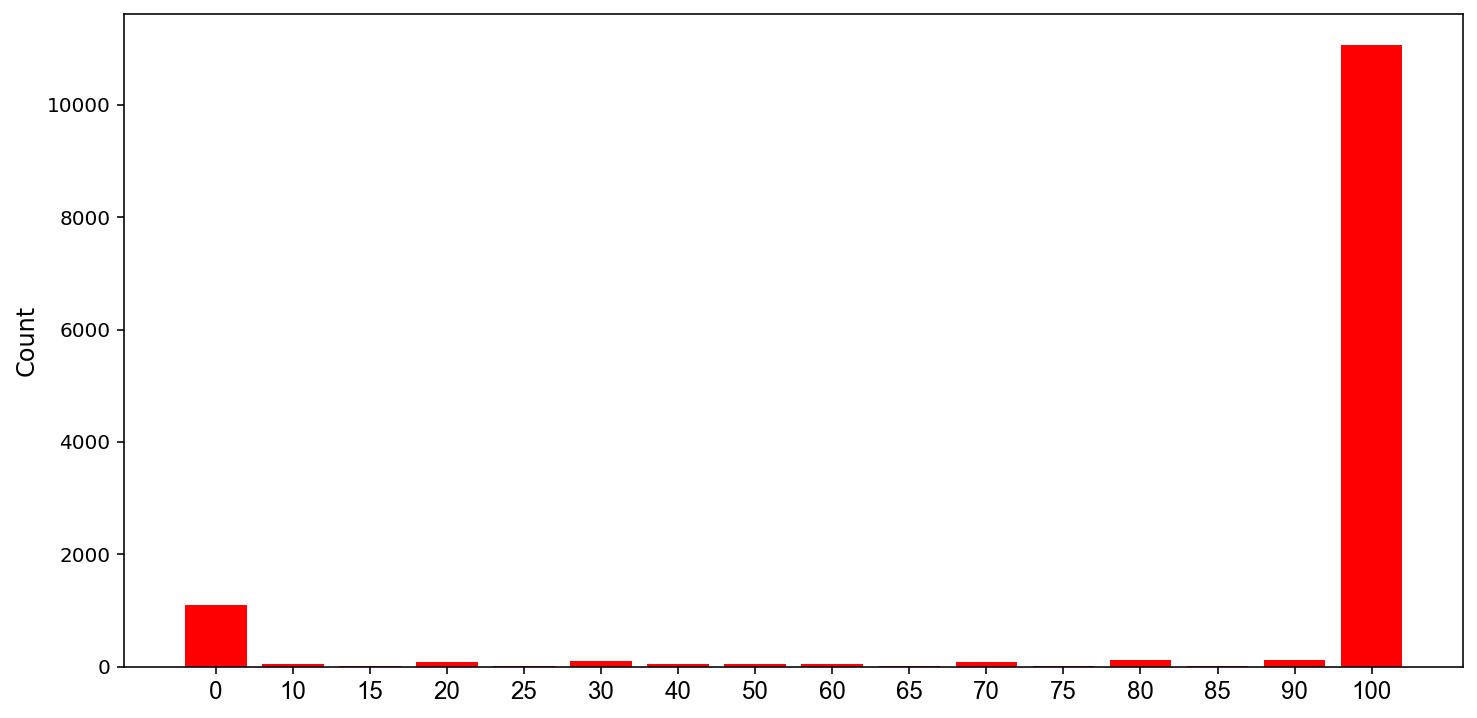

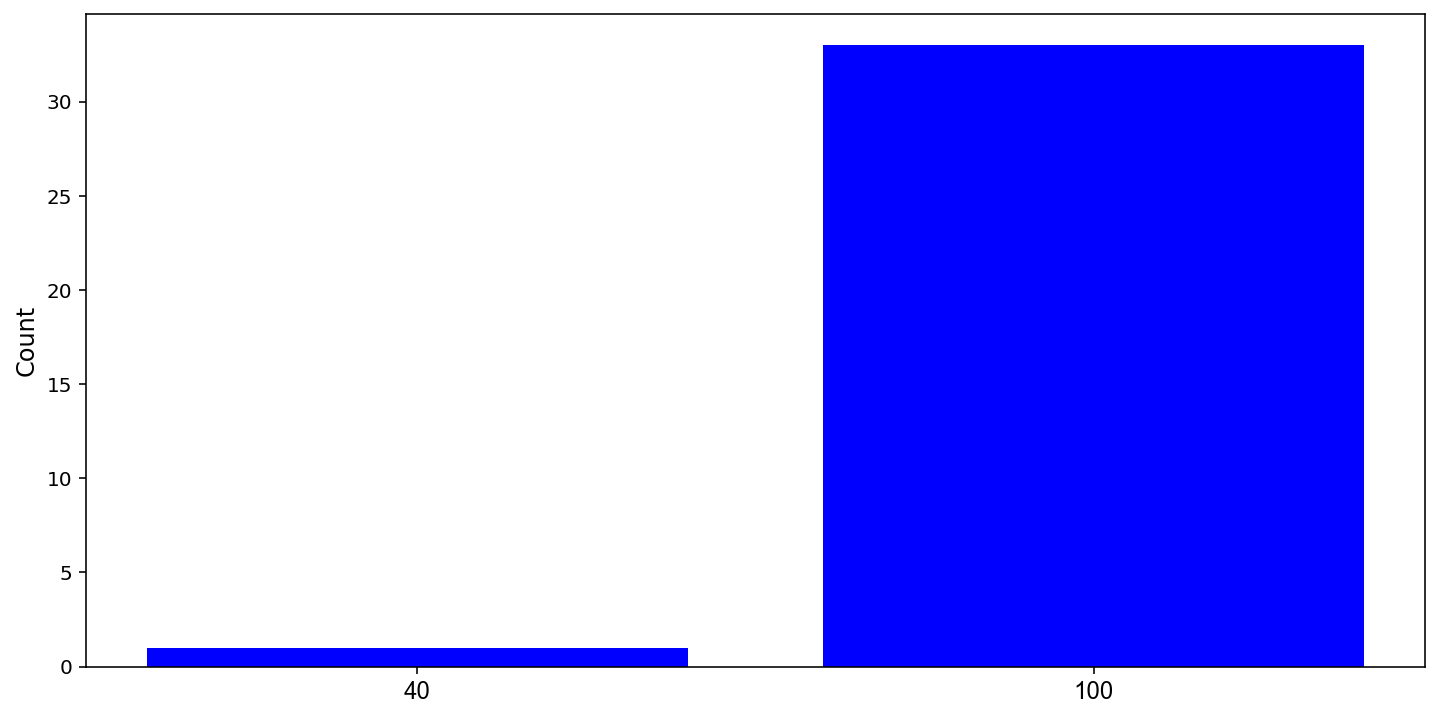

In [74]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

font = fm.FontProperties(fname='/Library/Fonts/Arial Unicode.ttf')

x = np.arange(16)
ratios = ['0', '10', '15', '20', '25', '30', '40', '50', '60', '65', '70', '75',
          '80', '85', '90', '100']
values = [s7_0_non, s7_10_non, s7_15_non, s7_20_non,
          s7_25_non, s7_30_non, s7_40_non, s7_50_non,
          s7_60_non, s7_65_non, s7_70_non, s7_75_non,
          s7_80_non, s7_85_non, s7_90_non, s7_100_non]

colors = ['Red'] 
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(x, values, color=colors)
plt.xticks(x, ratios, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

y = np.arange(2)
ratio = ['40', '100']
value = [s7_40, s7_100]

colors = ['Blue'] 
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(y, value, color=colors)
plt.xticks(y, ratio, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()



In [75]:
ratio_non_df = pd.DataFrame({'s7': ratios, 
                             'Count': values}, 
                              columns=['s7', 'Count'])

ratio_df = pd.DataFrame({'s7': ratio, 
                             'Count': value}, 
                              columns=['s7', 'Count'])

In [76]:
ratio_non_df

s7  Count
0     0   1090
1    10     50
2    15      2
3    20     77
4    25      4
5    30    101
6    40     44
7    50     43
8    60     50
9    65      3
10   70     81
11   75      5
12   80    118
13   85      8
14   90    111
15  100  11058

In [77]:
ratio_df

s7  Count
0   40      1
1  100     33

### 2.7.8. s8 

In [78]:
_5_non = len(nonfraud_train_data[nonfraud_train_data['s8']==1])
_30_non = len(nonfraud_train_data[nonfraud_train_data['s8']==2])
_70_non = len(nonfraud_train_data[nonfraud_train_data['s8']==3])

In [79]:
_5 = len(fraud_train_data[fraud_train_data['s8']==1])
_30 = len(fraud_train_data[fraud_train_data['s8']==2])
_70 = len(fraud_train_data[fraud_train_data['s8']==3])

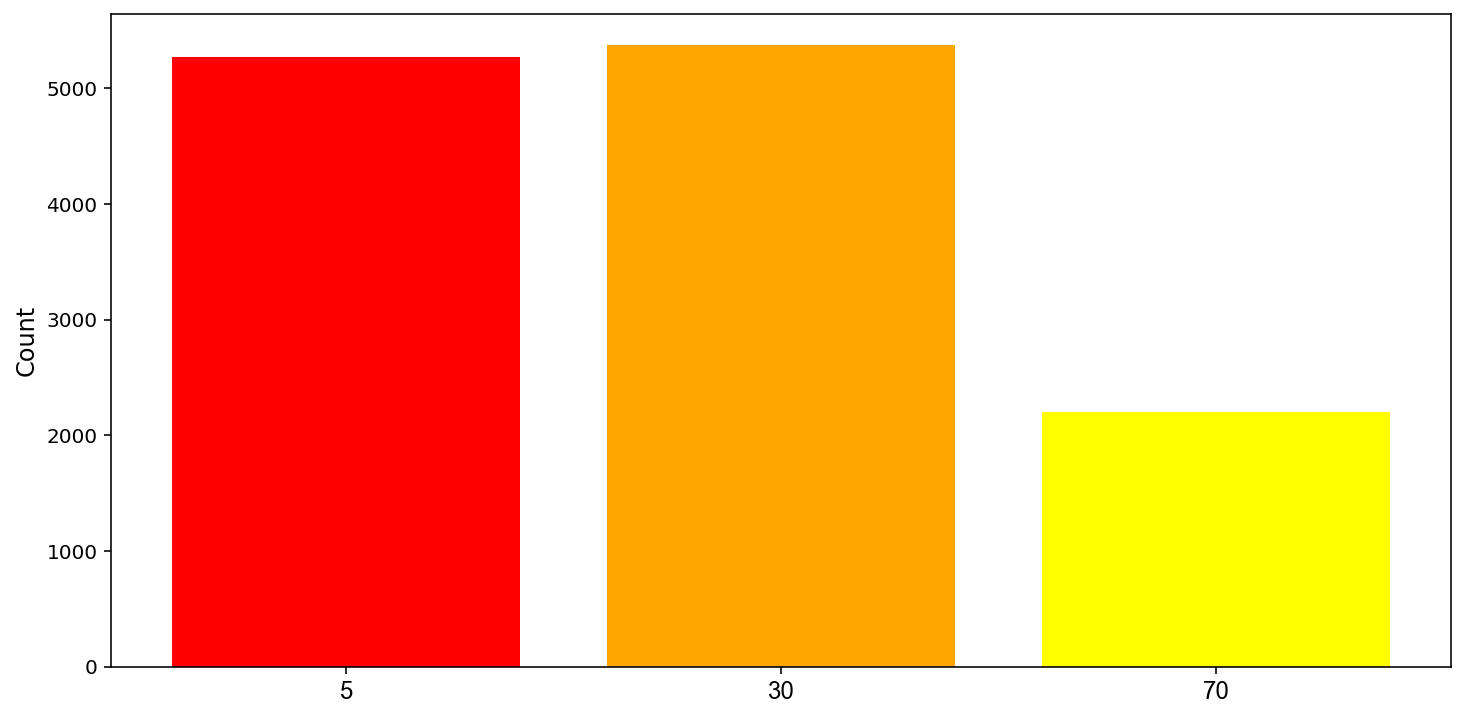

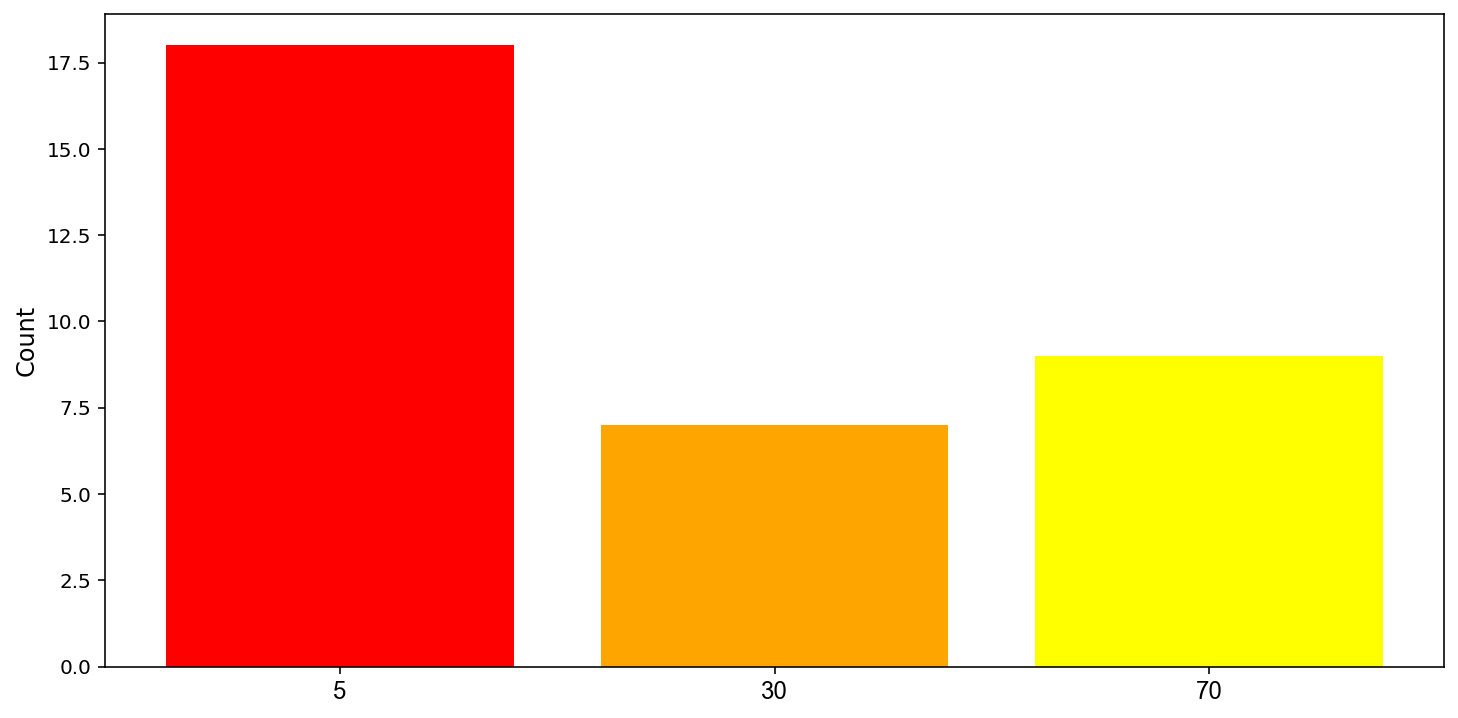

In [80]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

font = fm.FontProperties(fname='/Library/Fonts/Arial Unicode.ttf')

x = np.arange(3)
pfs = ['5', '30', '70']
values = [_5_non, _30_non, _70_non]

colors = ['Red','Orange','Yellow']  
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(x, values, color=colors)
plt.xticks(x, pfs, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

y = np.arange(3)
pf = ['5', '30', '70']
value = [_5, _30, _70]

colors = ['Red','Orange','Yellow'] 
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(y, value, color=colors)
plt.xticks(y, pf, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

In [81]:
non_df = pd.DataFrame({'s8': pfs, 'Count': values}, 
                              columns=['s8', 'Count'])
df = pd.DataFrame({'s8': pf, 'Count': value}, 
                              columns=['s8', 'Count'])

In [82]:
non_df

s8  Count
0   5   5275
1  30   5372
2  70   2198

In [83]:
df

s8  Count
0   5     18
1  30      7
2  70      9

### 2.7.9. s9 

In [84]:
s9_0_non = len(nonfraud_train_data[nonfraud_train_data['s9']==0])
s9_1_non = len(nonfraud_train_data[nonfraud_train_data['s9']==1])

In [85]:
s9_0 = len(fraud_train_data[fraud_train_data['s9']==0])
s9_1 = len(fraud_train_data[fraud_train_data['s9']==1])

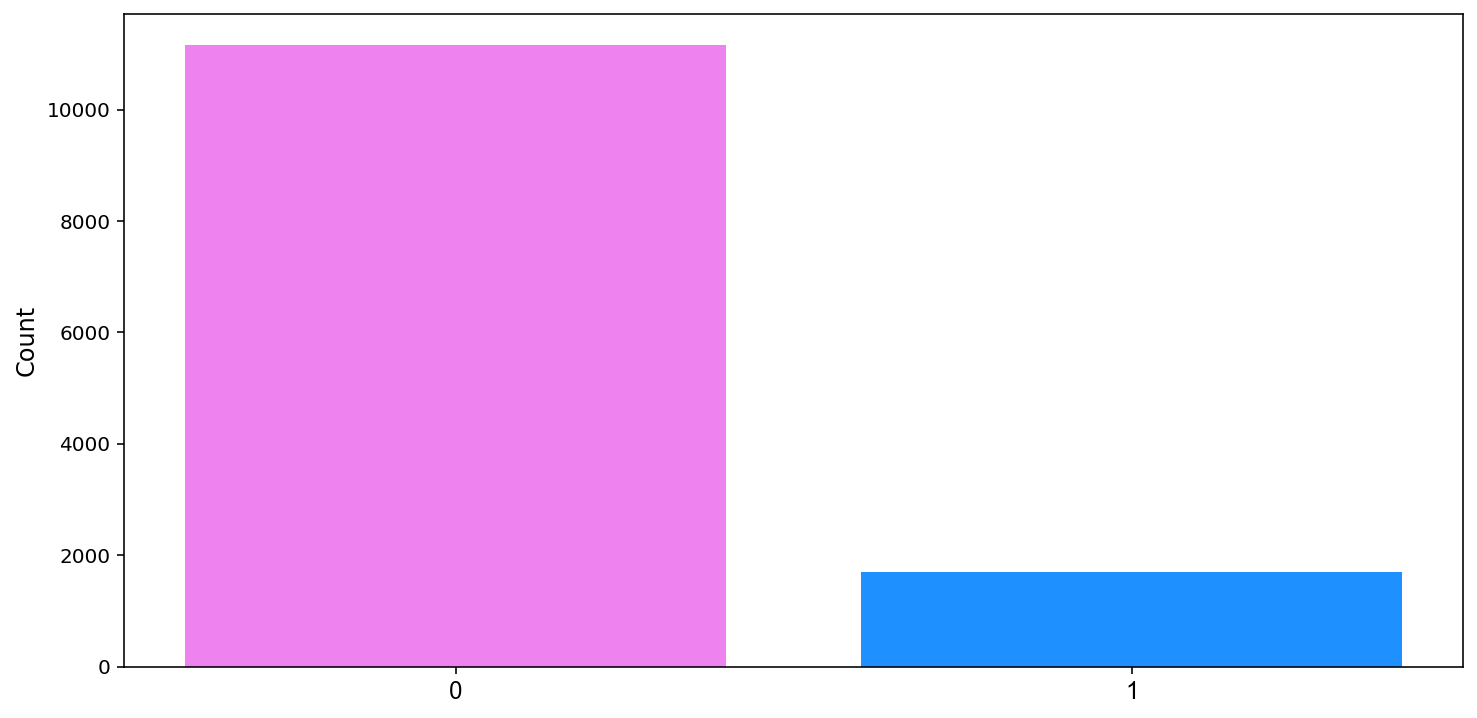

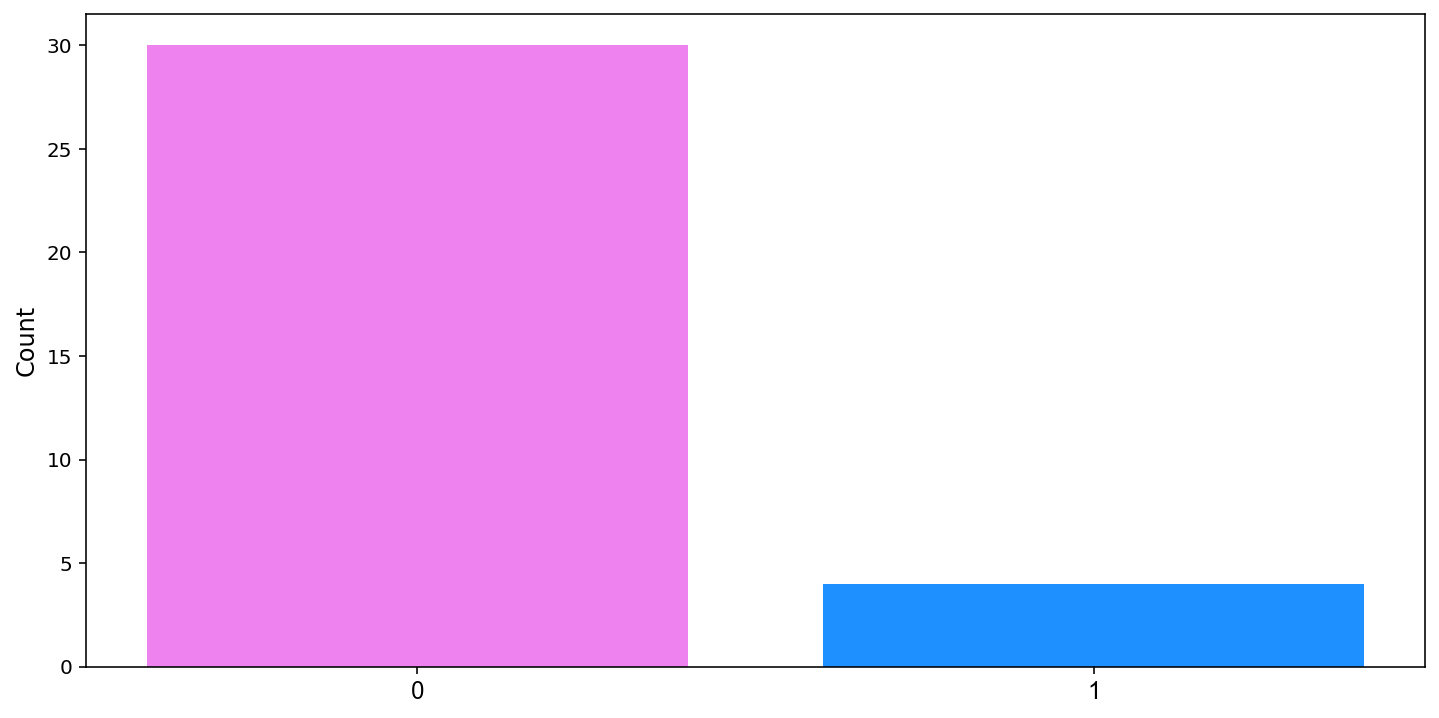

In [86]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

font = fm.FontProperties(fname='/Library/Fonts/Arial Unicode.ttf')

x = np.arange(2)
s9es = ['0', '1']
values = [s9_0_non, s9_1_non]

colors = ['violet','dodgerblue']  
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(x, values, color=colors)
plt.xticks(x, s9es, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

y = np.arange(2)
s9 = ['0', '1']
value = [s9_0, s9_1]

colors = ['violet','dodgerblue']   
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(y, value, color=colors)
plt.xticks(y, s9, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

In [87]:
s9_non_df = pd.DataFrame({'s9': s9es, 'Count': values}, 
                              columns=['s9', 'Count'])
s9_df = pd.DataFrame({'s9': s9, 'Count': value}, 
                              columns=['s9', 'Count'])

In [88]:
s9_non_df

s9  Count
0  0  11153
1  1   1692

In [89]:
s9_df

s9  Count
0  0     30
1  1      4

### 2.7.10. s10

In [90]:
s10_0_non = len(nonfraud_train_data[nonfraud_train_data['s10']==0])
s10_1_non = len(nonfraud_train_data[nonfraud_train_data['s10']==1])

In [91]:
s10_0 = len(fraud_train_data[fraud_train_data['s10']==0])
s10_1 = len(fraud_train_data[fraud_train_data['s10']==1])

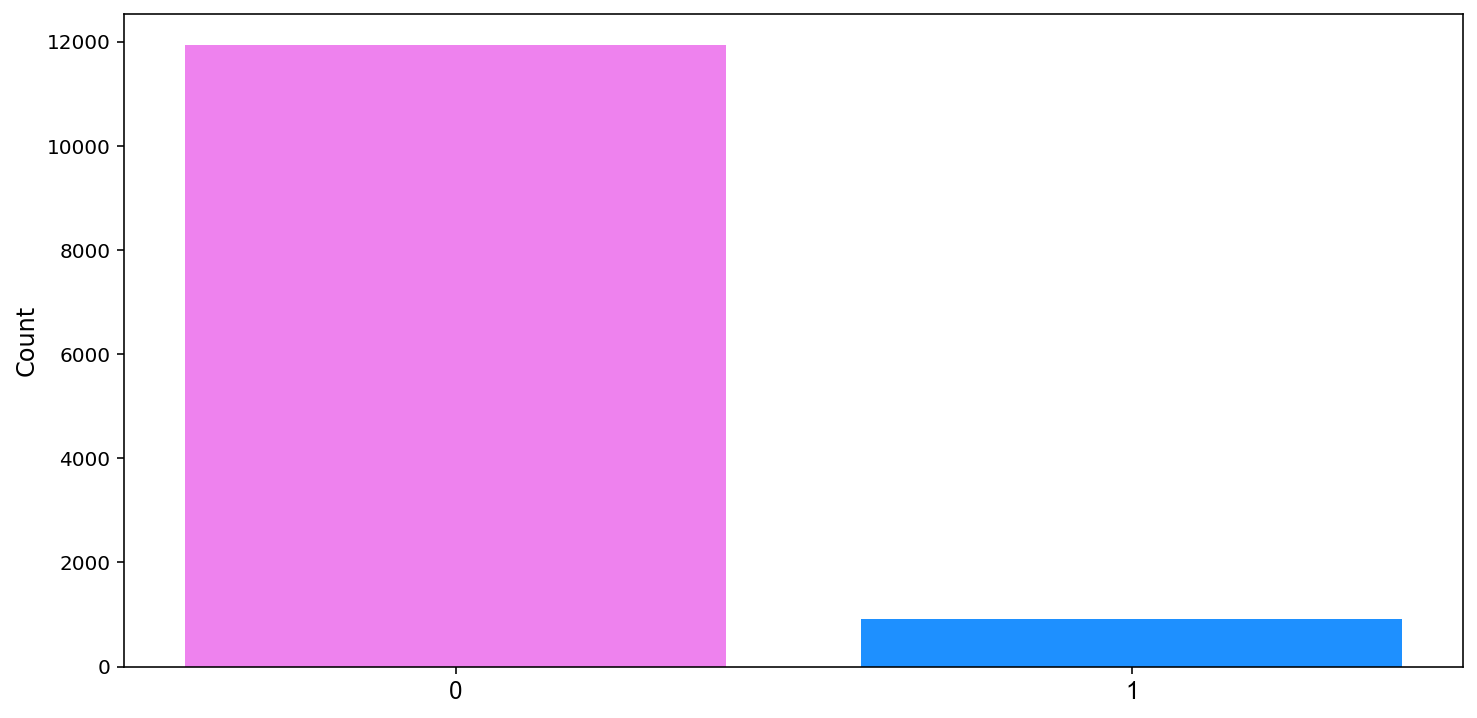

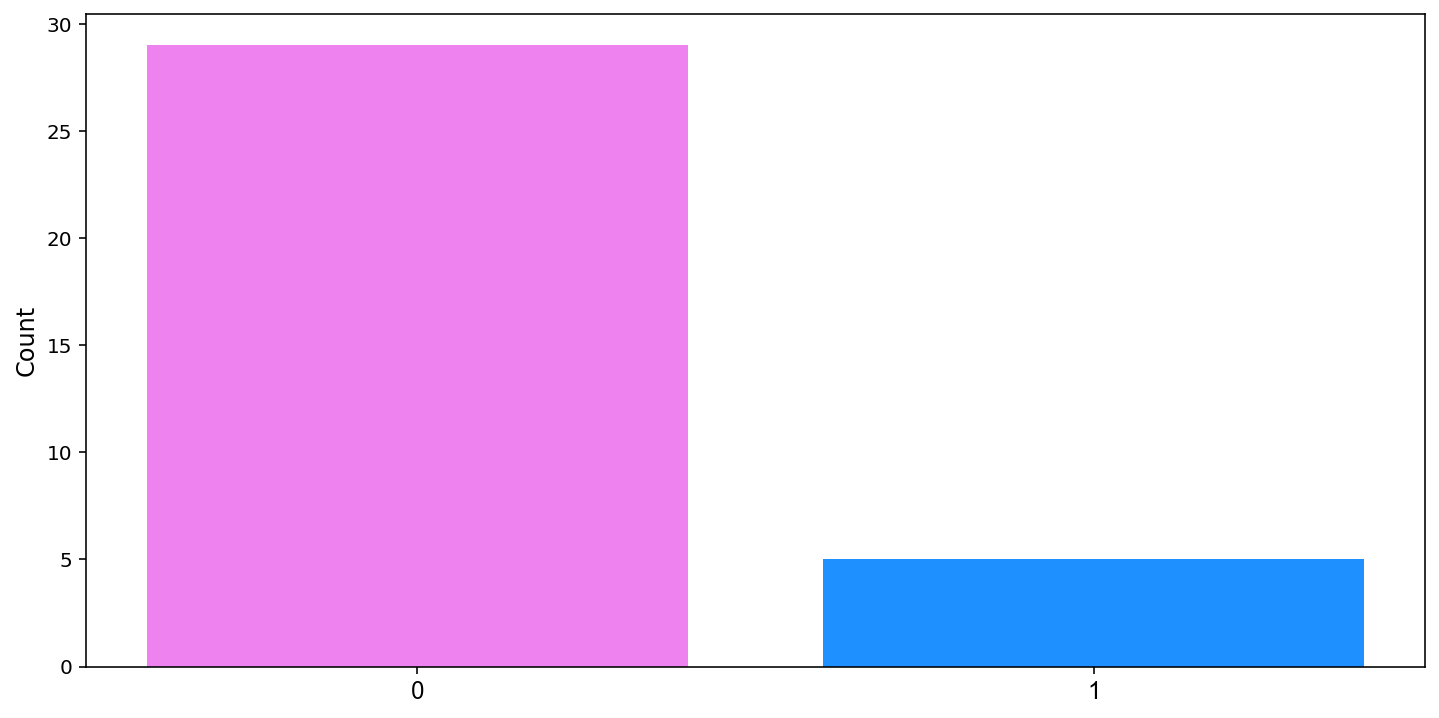

In [92]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

font = fm.FontProperties(fname='/Library/Fonts/Arial Unicode.ttf')

x = np.arange(2)
s10s = ['0', '1']
values = [s10_0_non, s10_1_non]

colors = ['violet','dodgerblue']  
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(x, values, color=colors)
plt.xticks(x, s10s, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

y = np.arange(2)
s10 = ['0', '1']
value = [s10_0, s10_1]

colors = ['violet','dodgerblue']   
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(y, value, color=colors)
plt.xticks(y, s10, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

In [93]:
s10_non_df = pd.DataFrame({'s10': s10s, 'Count': values}, 
                              columns=['s10', 'Count'])
s10_df = pd.DataFrame({'s10': s10, 'Count': value}, 
                              columns=['s10', 'Count'])

In [94]:
s10_non_df

s10  Count
0   0  11931
1   1    914

In [95]:
s10_df

s10  Count
0   0     29
1   1      5

### 2.7.11. s11

In [96]:
s11_1_non = len(nonfraud_train_data[nonfraud_train_data['s11']==1])
s11_2_non = len(nonfraud_train_data[nonfraud_train_data['s11']==2])
s11_3_non = len(nonfraud_train_data[nonfraud_train_data['s11']==3])
s11_4_non = len(nonfraud_train_data[nonfraud_train_data['s11']==4])
s11_5_non = len(nonfraud_train_data[nonfraud_train_data['s11']==5])
s11_6_non = len(nonfraud_train_data[nonfraud_train_data['s11']==6])

In [97]:
s11_1 = len(fraud_train_data[fraud_train_data['s11']==1])
s11_2 = len(fraud_train_data[fraud_train_data['s11']==2])
s11_3 = len(fraud_train_data[fraud_train_data['s11']==3])
s11_4 = len(fraud_train_data[fraud_train_data['s11']==4])
s11_5 = len(fraud_train_data[fraud_train_data['s11']==5])
s11_6 = len(fraud_train_data[fraud_train_data['s11']==6])

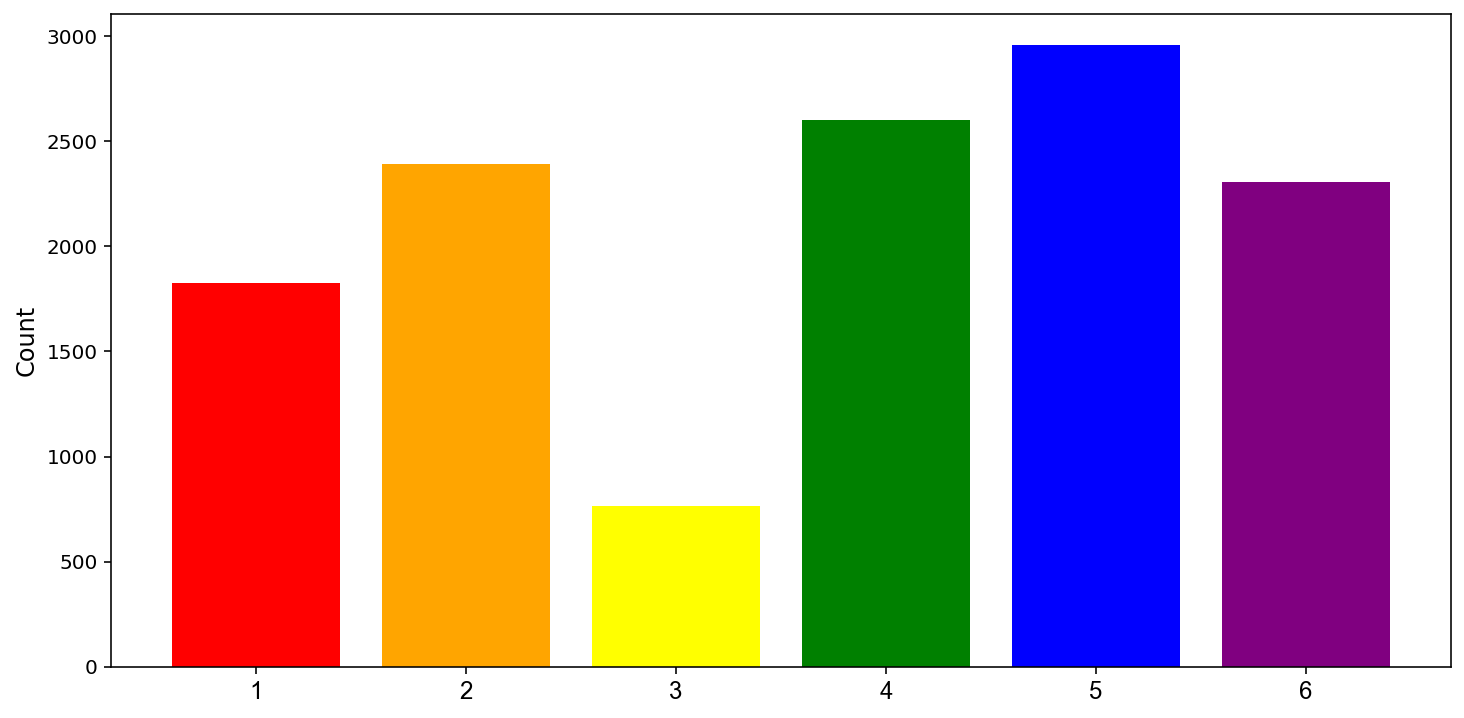

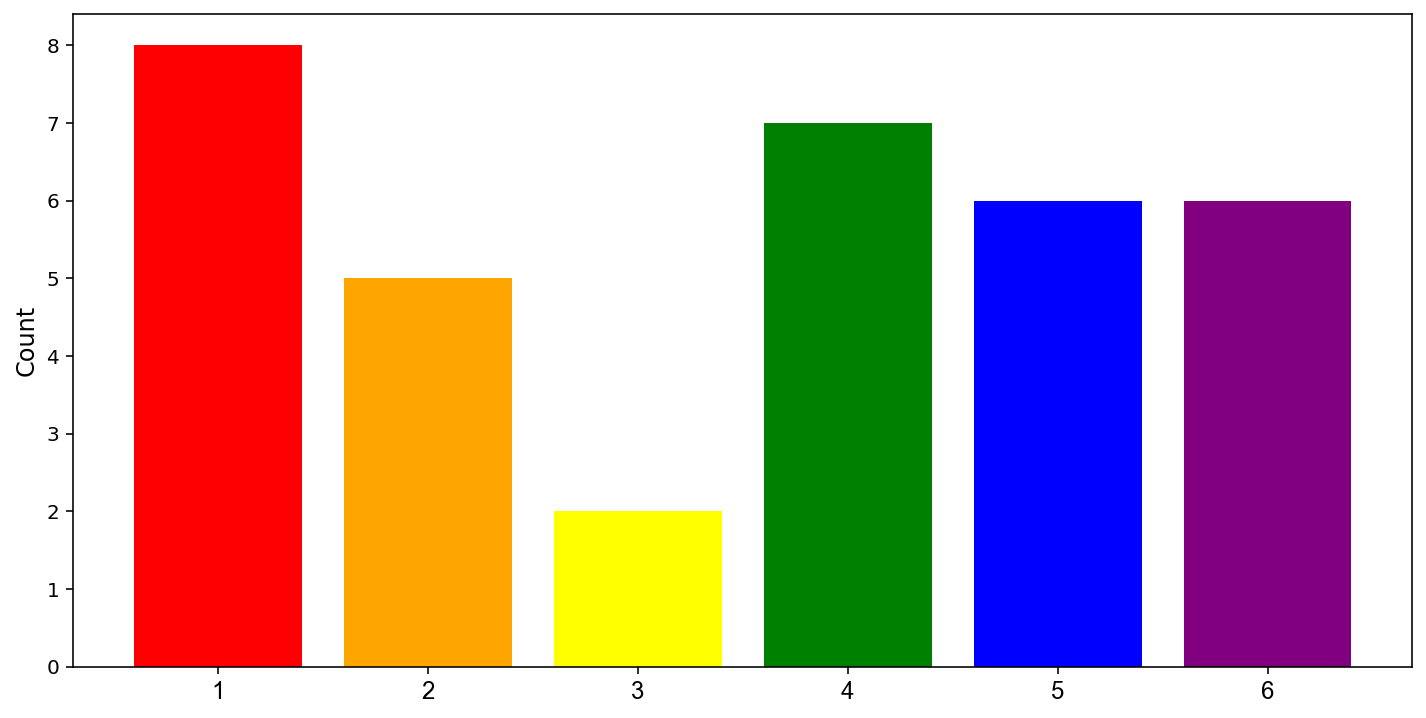

In [98]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

font = fm.FontProperties(fname='/Library/Fonts/Arial Unicode.ttf')

x = np.arange(6)
hours = ['1', '2', '3','4','5','6']
values = [s11_1_non, s11_2_non, s11_3_non, s11_4_non,
          s11_5_non, s11_6_non]

colors = ['Red','Orange','Yellow','Green','Blue','Purple'] 
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(x, values, color=colors)
plt.xticks(x, hours, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

y = np.arange(6)
hour = ['1', '2', '3','4','5','6']
value = [s11_1, s11_2, s11_3, s11_4, s11_5,
         s11_6]

colors = ['Red','Orange','Yellow','Green','Blue','Purple']  
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(y, value, color=colors)
plt.xticks(y, hour, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

In [99]:
s11_non_df = pd.DataFrame({'s11': hours, 'Count': values}, 
                              columns=['s11', 'Count'])
s11_df = pd.DataFrame({'s11': hour, 'Count': value}, 
                              columns=['s11', 'Count'])

In [100]:
s11_non_df

s11  Count
0   1   1827
1   2   2390
2   3    763
3   4   2601
4   5   2957
5   6   2307

In [101]:
s11_df

s11  Count
0   1      8
1   2      5
2   3      2
3   4      7
4   5      6
5   6      6

### 2.7.12. s12 

In [102]:
s12_1_non = len(nonfraud_train_data[nonfraud_train_data['s12']==1])
s12_2_non = len(nonfraud_train_data[nonfraud_train_data['s12']==2])
s12_3_non = len(nonfraud_train_data[nonfraud_train_data['s12']==3])
s12_4_non = len(nonfraud_train_data[nonfraud_train_data['s12']==4])
s12_5_non = len(nonfraud_train_data[nonfraud_train_data['s12']==5])

In [103]:
s12_1 = len(fraud_train_data[fraud_train_data['s12']==1])
s12_2 = len(fraud_train_data[fraud_train_data['s12']==2])
s12_3 = len(fraud_train_data[fraud_train_data['s12']==3])
s12_4 = len(fraud_train_data[fraud_train_data['s12']==4])
s12_5 = len(fraud_train_data[fraud_train_data['s12']==5])

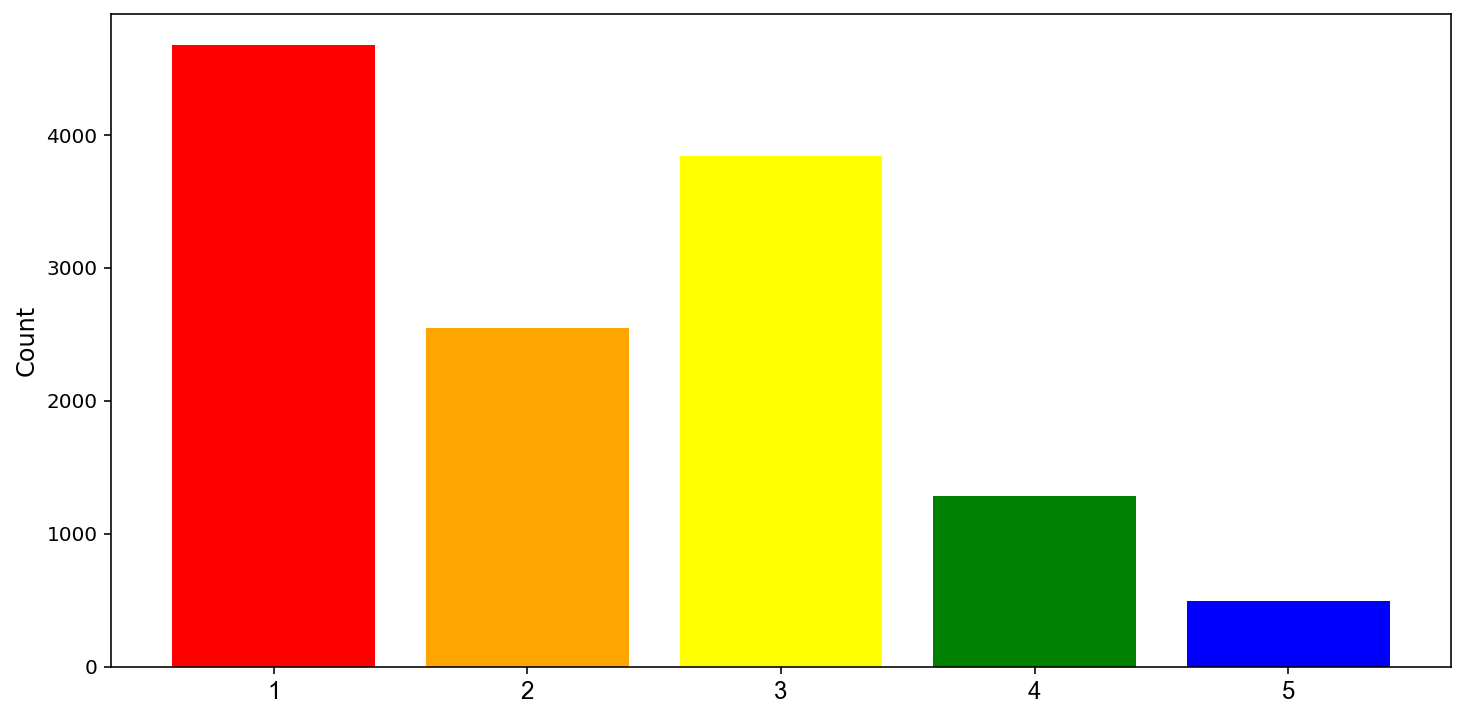

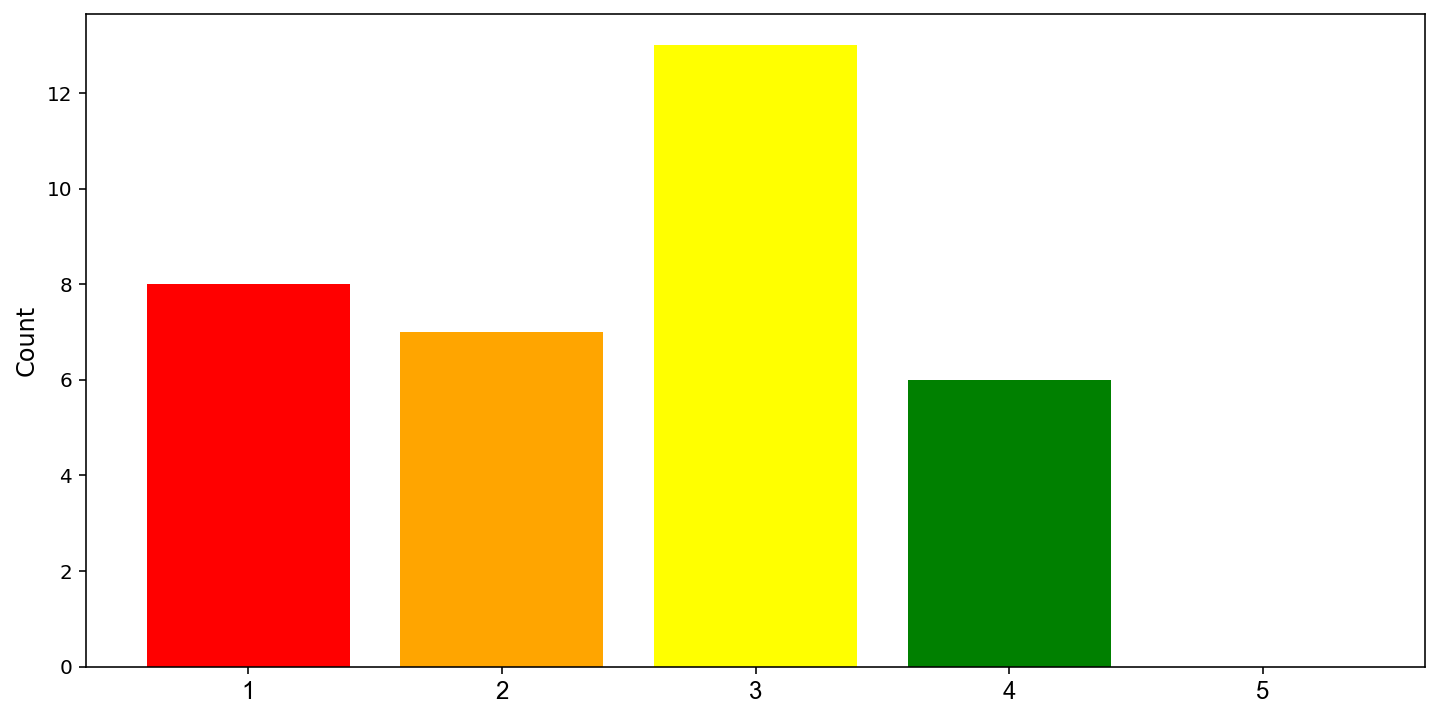

In [104]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

font = fm.FontProperties(fname='/Library/Fonts/Arial Unicode.ttf')

x = np.arange(5)
s12s = ['1', '2', '3','4','5']
values = [s12_1_non, s12_2_non, s12_3_non, s12_4_non,
          s12_5_non]

colors = ['Red','Orange','Yellow','Green','Blue'] 
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(x, values, color=colors)
plt.xticks(x, s12s, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

y = np.arange(5)
s12 = ['1', '2', '3','4','5']
value = [s12_1, s12_2, s12_3, s12_4, s12_5]

colors = ['Red','Orange','Yellow','Green','Blue']  
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(y, value, color=colors)
plt.xticks(y, s12, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

In [105]:
s12_non_df = pd.DataFrame({'s11': s12s, 'Count': values}, 
                              columns=['s11', 'Count'])
s12_df = pd.DataFrame({'s11': s12, 'Count': value}, 
                              columns=['s11', 'Count'])

In [106]:
s12_non_df

s11  Count
0   1   4674
1   2   2551
2   3   3844
3   4   1285
4   5    491

In [107]:
s12_df

s11  Count
0   1      8
1   2      7
2   3     13
3   4      6
4   5      0

### 2.7.13. s13 

In [108]:
s13_1_non = len(nonfraud_train_data[nonfraud_train_data['s13']==1])
s13_2_non = len(nonfraud_train_data[nonfraud_train_data['s13']==2])
s13_3_non = len(nonfraud_train_data[nonfraud_train_data['s13']==3])
s13_4_non = len(nonfraud_train_data[nonfraud_train_data['s13']==4])
s13_5_non = len(nonfraud_train_data[nonfraud_train_data['s13']==5])
s13_6_non = len(nonfraud_train_data[nonfraud_train_data['s13']==6])

In [109]:
s13_1 = len(fraud_train_data[fraud_train_data['s13']==1])
s13_2 = len(fraud_train_data[fraud_train_data['s13']==2])
s13_3 = len(fraud_train_data[fraud_train_data['s13']==3])
s13_4 = len(fraud_train_data[fraud_train_data['s13']==4])
s13_5 = len(fraud_train_data[fraud_train_data['s13']==5])
s13_6 = len(fraud_train_data[fraud_train_data['s13']==6])

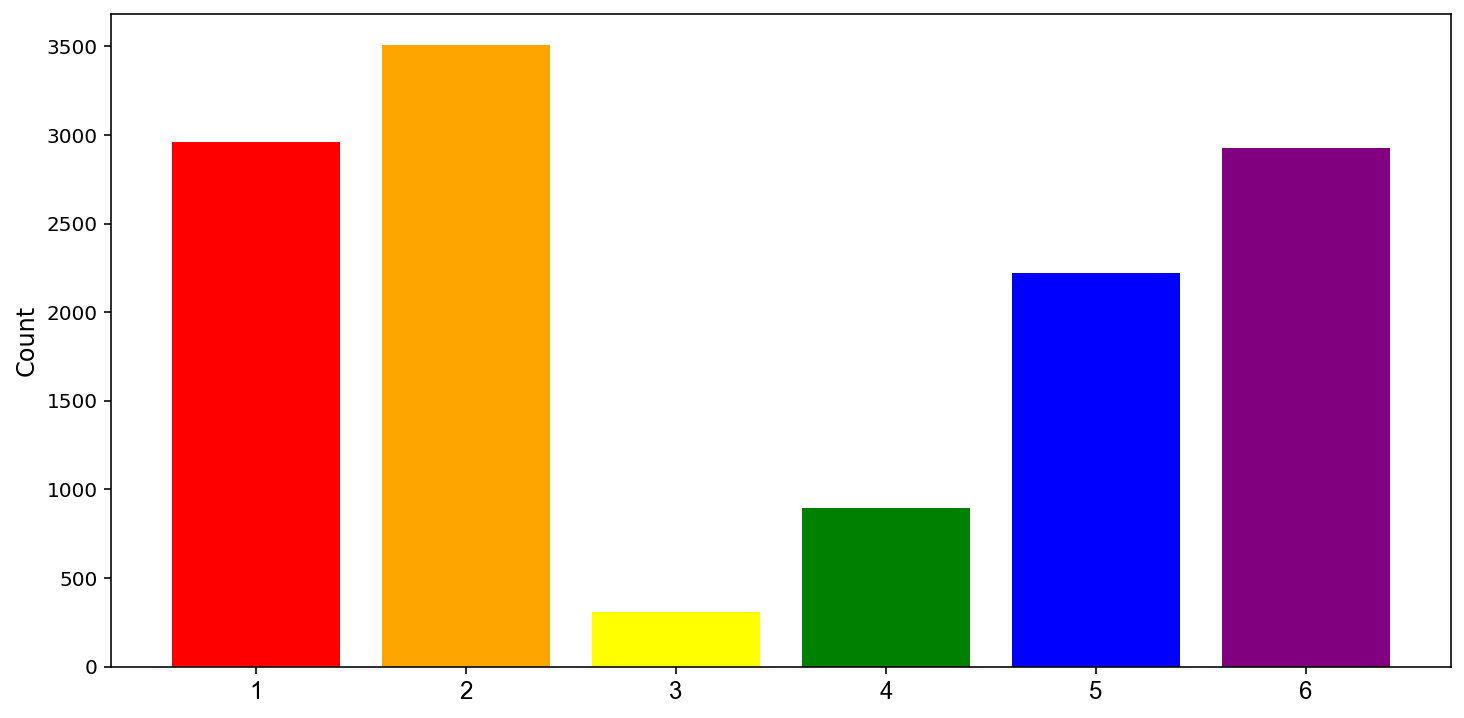

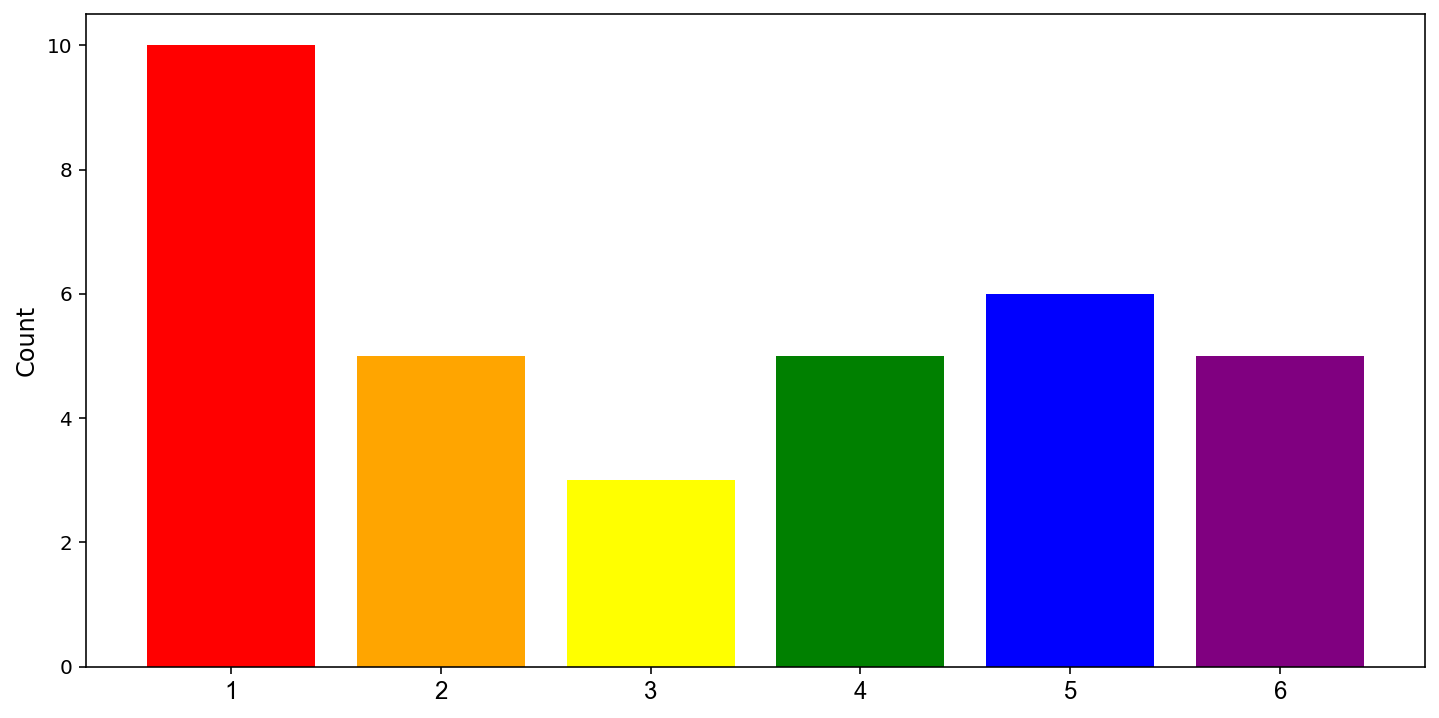

In [110]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

font = fm.FontProperties(fname='/Library/Fonts/Arial Unicode.ttf')

x = np.arange(6)
hours = ['1', '2', '3','4','5','6']
values = [s13_1_non, s13_2_non, s13_3_non, s13_4_non,
          s13_5_non, s13_6_non]

colors = ['Red','Orange','Yellow','Green','Blue','Purple'] 
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(x, values, color=colors)
plt.xticks(x, hours, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

y = np.arange(6)
hour = ['1', '2', '3','4','5','6']
value = [s13_1, s13_2, s13_3, s13_4, s13_5,
         s13_6]

colors = ['Red','Orange','Yellow','Green','Blue','Purple']  
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(y, value, color=colors)
plt.xticks(y, hour, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

In [111]:
s13_non_df = pd.DataFrame({'s13': hours, 'Count': values}, 
                              columns=['s13', 'Count'])
s13_df = pd.DataFrame({'s13': hour, 'Count': value}, 
                              columns=['s13', 'Count'])

In [112]:
s13_non_df

s13  Count
0   1   2960
1   2   3506
2   3    306
3   4    896
4   5   2222
5   6   2929

In [113]:
s13_df

s13  Count
0   1     10
1   2      5
2   3      3
3   4      5
4   5      6
5   6      5

### 2.7.14. s14 

In [114]:
import seaborn as sns
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

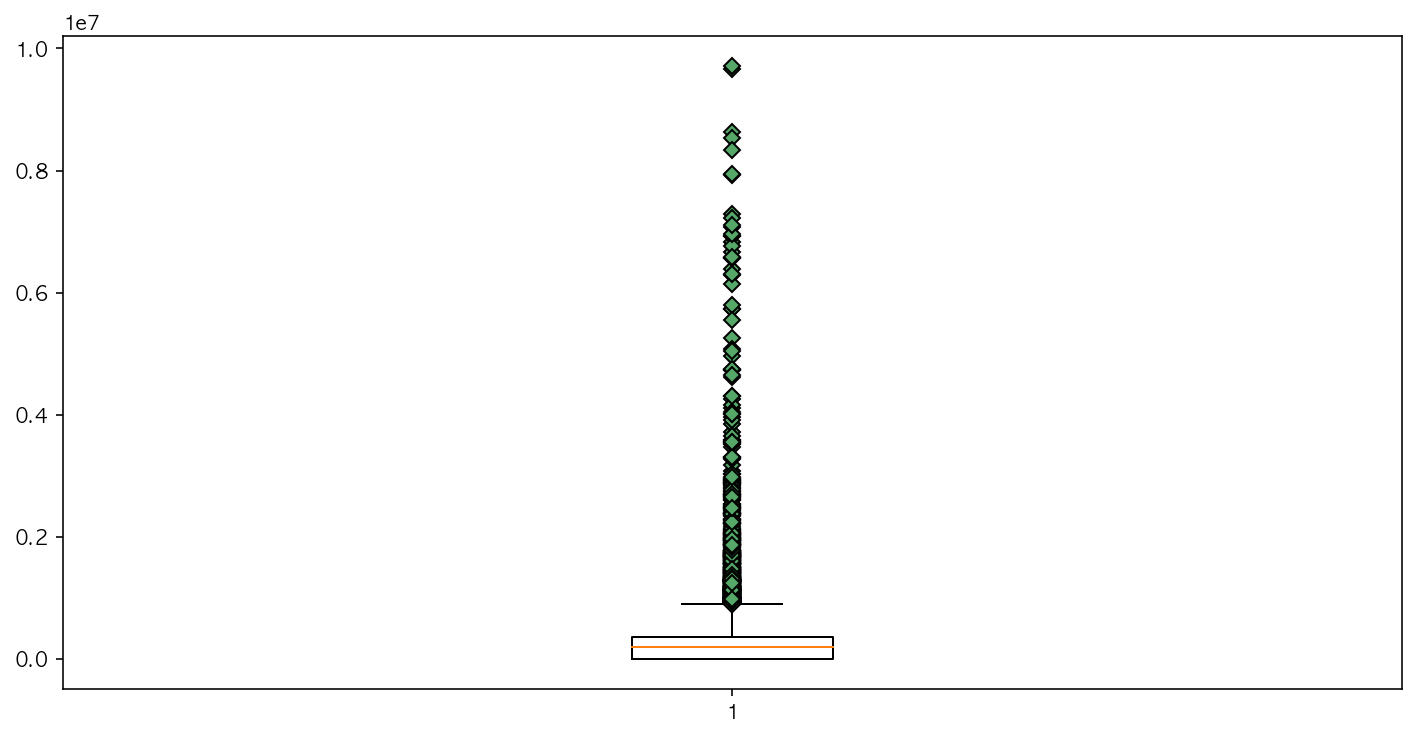

In [115]:
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(nonfraud_train_data['s14'], flierprops=green_diamond)
plt.show()

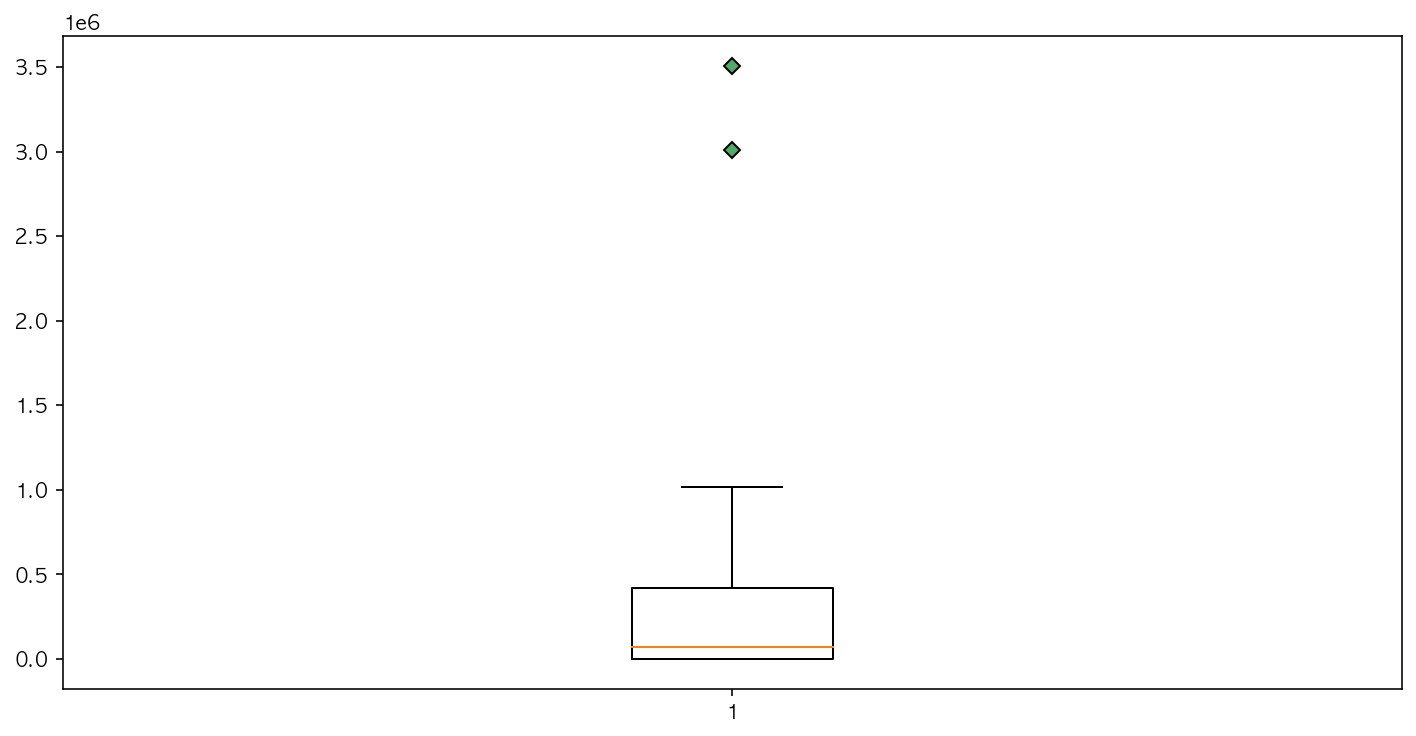

In [116]:
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(fraud_train_data['s14'], flierprops=green_diamond)
plt.show()

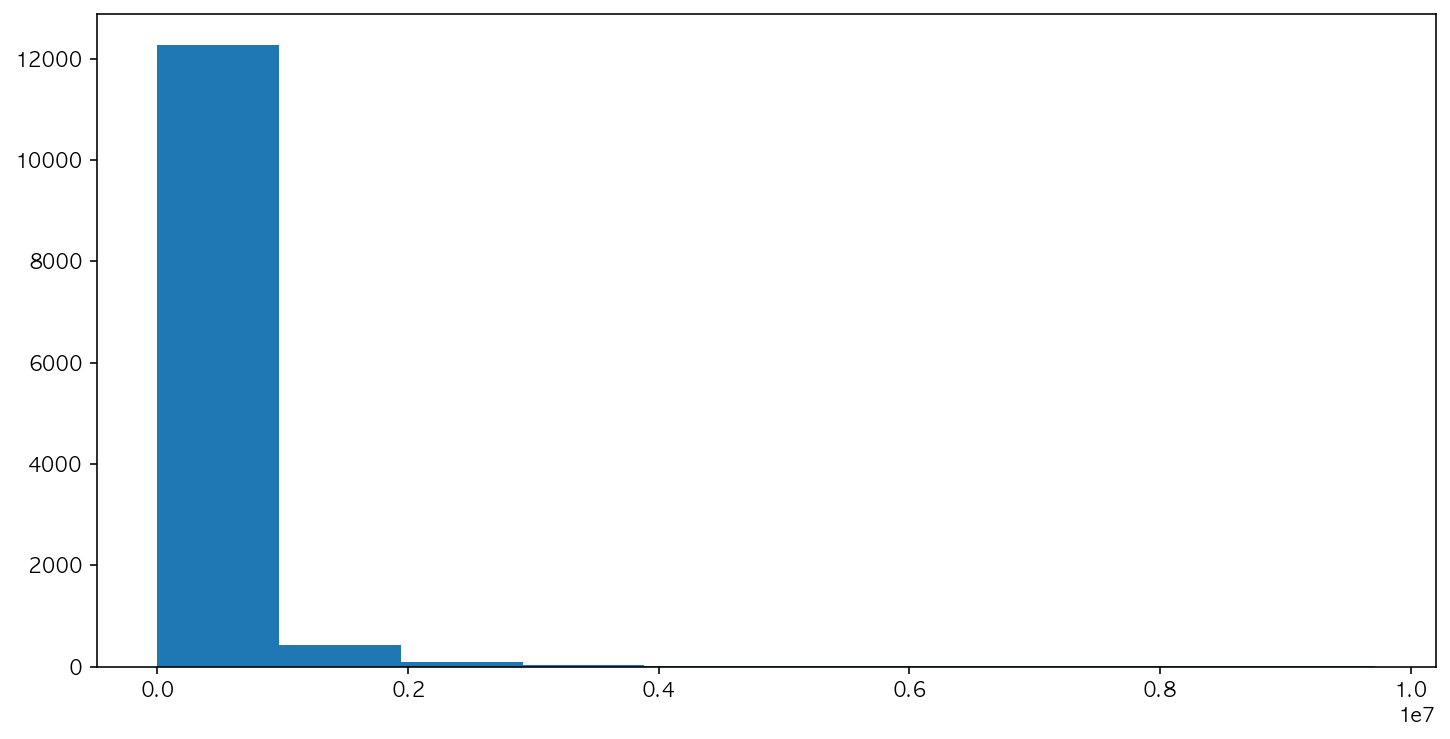

In [117]:
plt.figure()
plt.hist(nonfraud_train_data['s14'],bins=10)
plt.show()

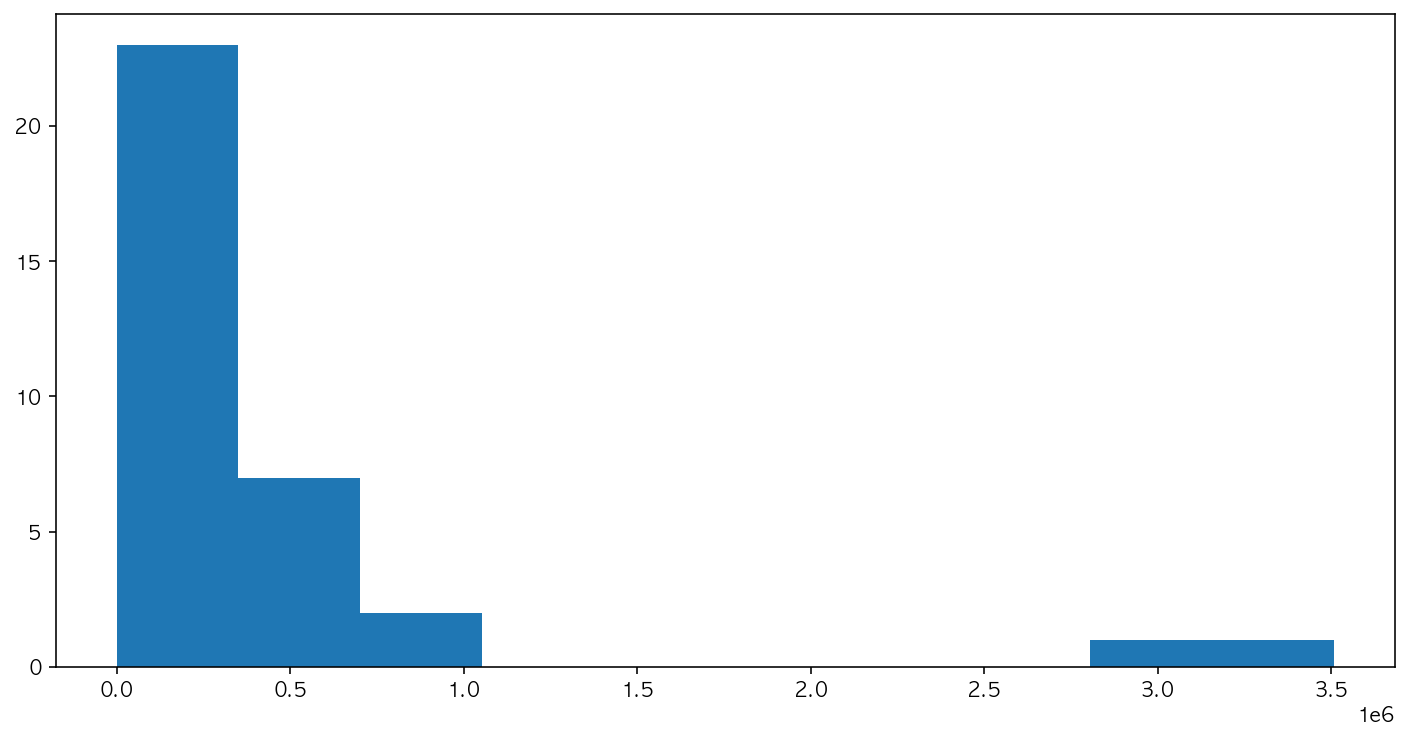

In [118]:
plt.figure()
plt.hist(fraud_train_data['s14'],bins=10)
plt.show()

In [119]:
s14_0_non = len(nonfraud_train_data[nonfraud_train_data['s14'] == 0])
s14_20000_non = len(nonfraud_train_data[nonfraud_train_data['s14'] <= 200000]) - s14_0_non
s14_40000_non = len(nonfraud_train_data[nonfraud_train_data['s14'] <= 400000]) - (s14_20000_non + s14_0_non)
s14_60000_non = len(nonfraud_train_data[nonfraud_train_data['s14'] <= 600000]) - (s14_40000_non + s14_20000_non + s14_0_non)
s14_80000_non = len(nonfraud_train_data[nonfraud_train_data['s14'] <= 800000]) - (s14_60000_non + s14_40000_non + s14_20000_non + s14_0_non)
s14_80001_non = len(nonfraud_train_data[nonfraud_train_data['s14'] > 800000])

In [120]:
s14_0 = len(fraud_train_data[fraud_train_data['s14'] == 0])
s14_20000 = len(fraud_train_data[fraud_train_data['s14'] <= 200000]) - s14_0
s14_40000 = len(fraud_train_data[fraud_train_data['s14'] <= 400000]) - (s14_20000 + s14_0)
s14_60000 = len(fraud_train_data[fraud_train_data['s14'] <= 600000]) - (s14_40000 + s14_20000 + s14_0)
s14_80000 = len(fraud_train_data[fraud_train_data['s14'] <= 800000]) - (s14_60000 + s14_40000 + s14_20000 + s14_0)
s14_80001 = len(fraud_train_data[fraud_train_data['s14'] > 800000])

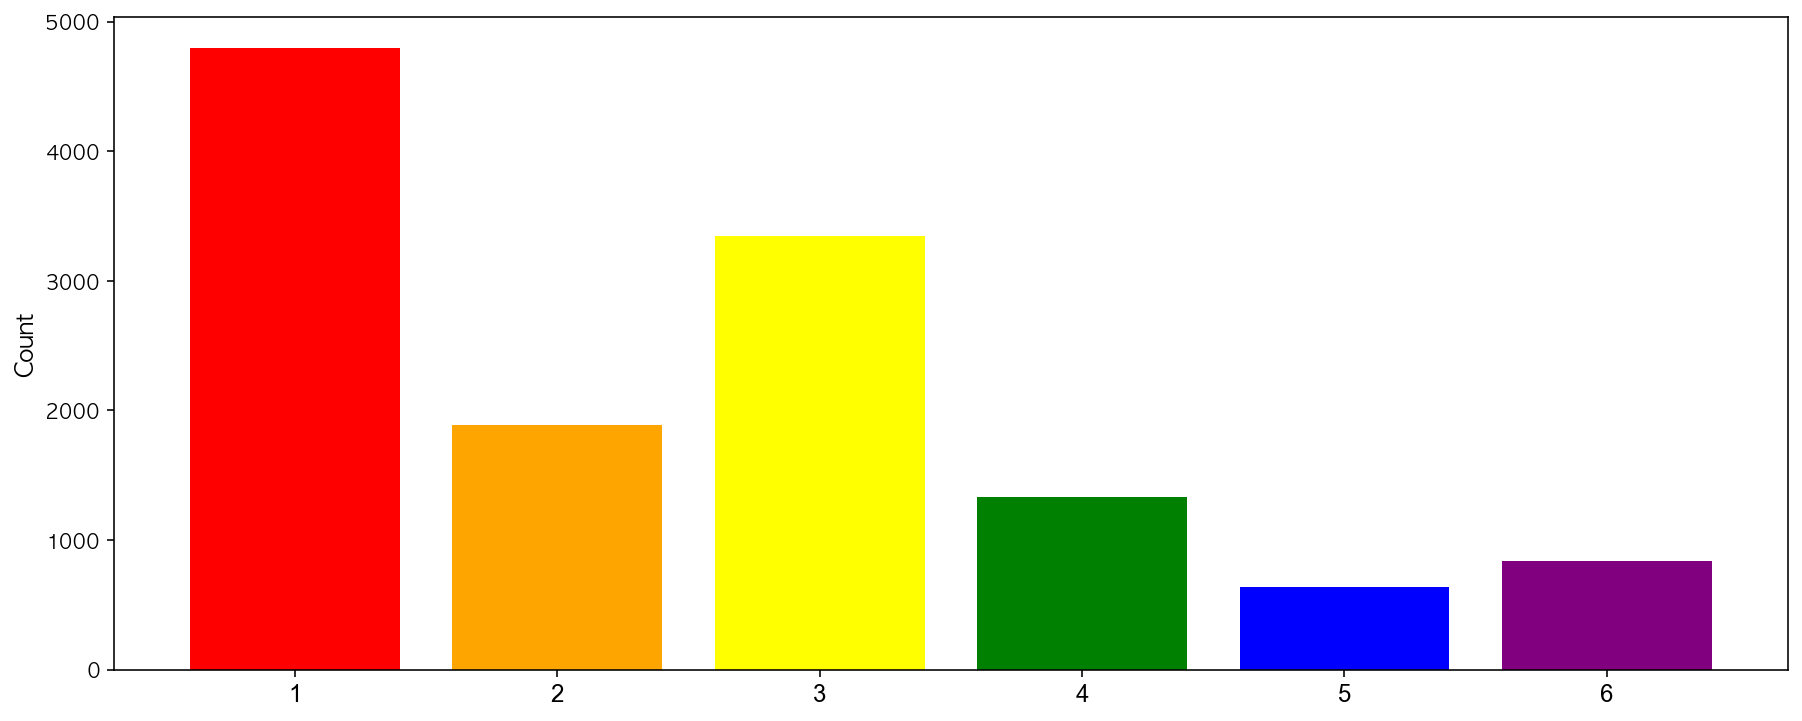

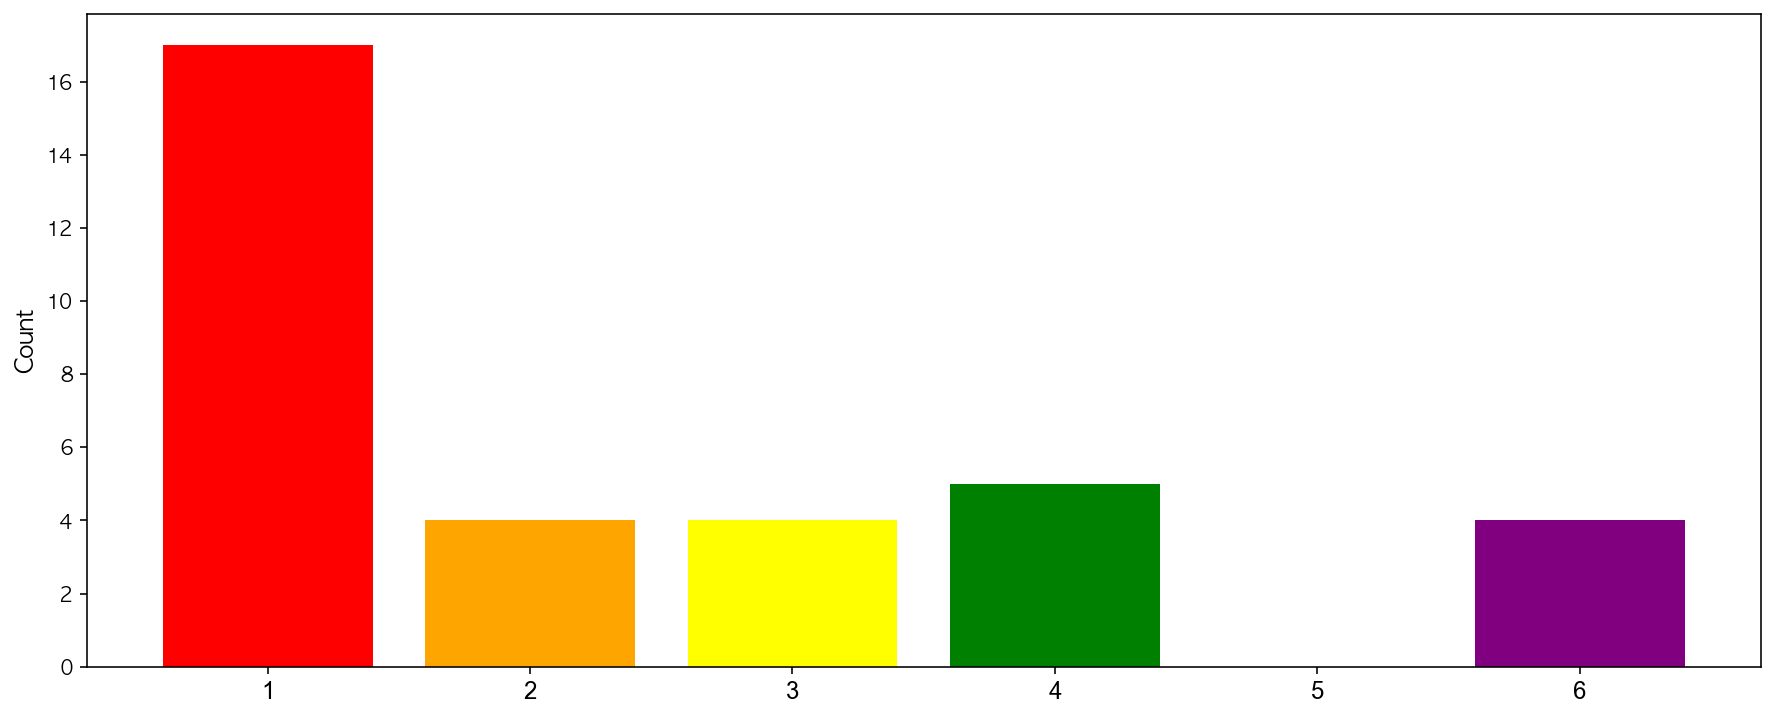

In [121]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

font = fm.FontProperties(fname='/Library/Fonts/Arial Unicode.ttf')

x = np.arange(6)
costs = ['1', '2', '3','4','5','6']
values = [s14_0_non, s14_20000_non, s14_40000_non, s14_60000_non,
          s14_80000_non, s14_80001_non]

colors = ['Red','Orange','Yellow','Green','Blue','Purple'] 
plt.rcParams["figure.figsize"] = (15,6)
plt.bar(x, values, color=colors)
plt.xticks(x, costs, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

y = np.arange(6)
cost = ['1', '2', '3','4','5','6']
value = [s14_0, s14_20000, s14_40000, s14_60000, s14_80000, s14_80001]

colors = ['Red','Orange','Yellow','Green','Blue','Purple']  
plt.rcParams["figure.figsize"] = (15,6)
plt.bar(y, value, color=colors)
plt.xticks(y, cost, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

In [122]:
s14_non_df = pd.DataFrame({'s13': costs, 'Count': values}, 
                              columns=['s13', 'Count'])
s14 = pd.DataFrame({'s13': cost, 'Count': value}, 
                              columns=['s13', 'Count'])

In [123]:
s14_non_df

s13  Count
0   1   4794
1   2   1891
2   3   3346
3   4   1332
4   5    641
5   6    841

In [124]:
s14

s13  Count
0   1     17
1   2      4
2   3      4
3   4      5
4   5      0
5   6      4

### 2.7.15. s15

In [125]:
import seaborn as sns
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

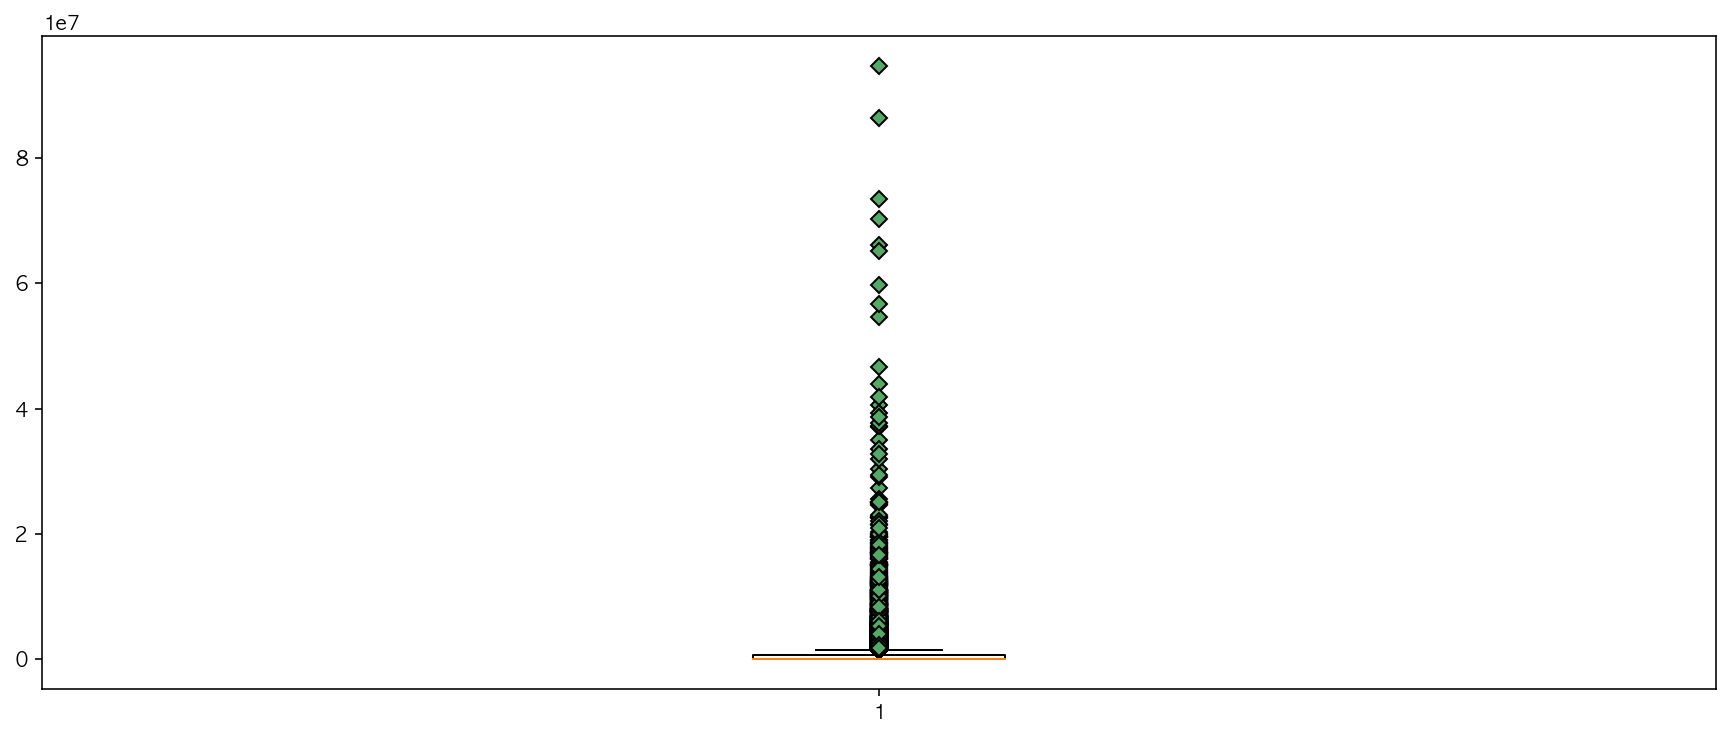

In [126]:
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(nonfraud_train_data['s15'], flierprops=green_diamond)
plt.show()

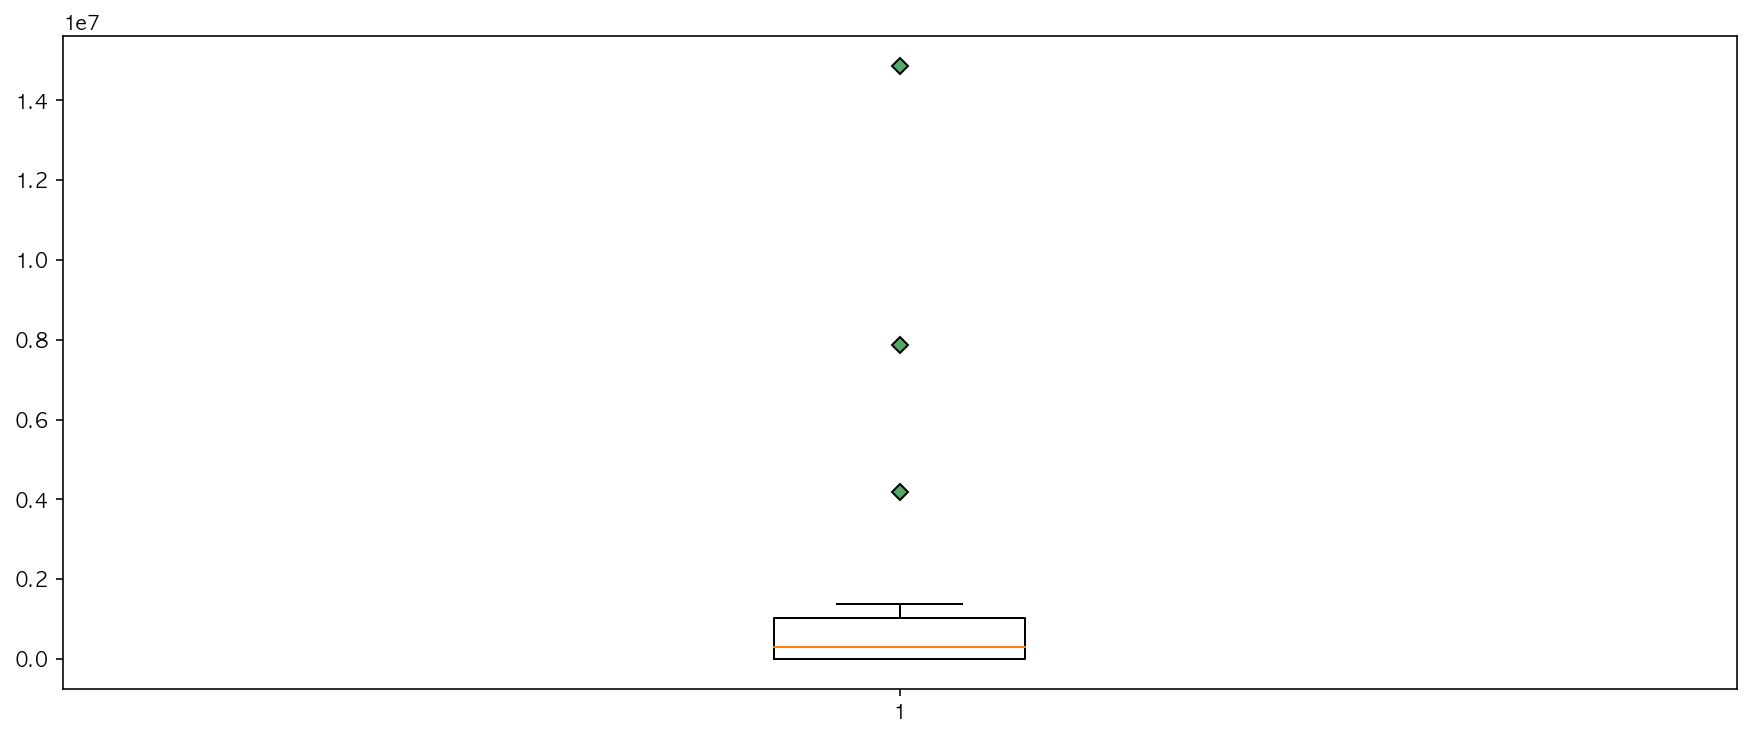

In [127]:
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(fraud_train_data['s15'], flierprops=green_diamond)
plt.show()

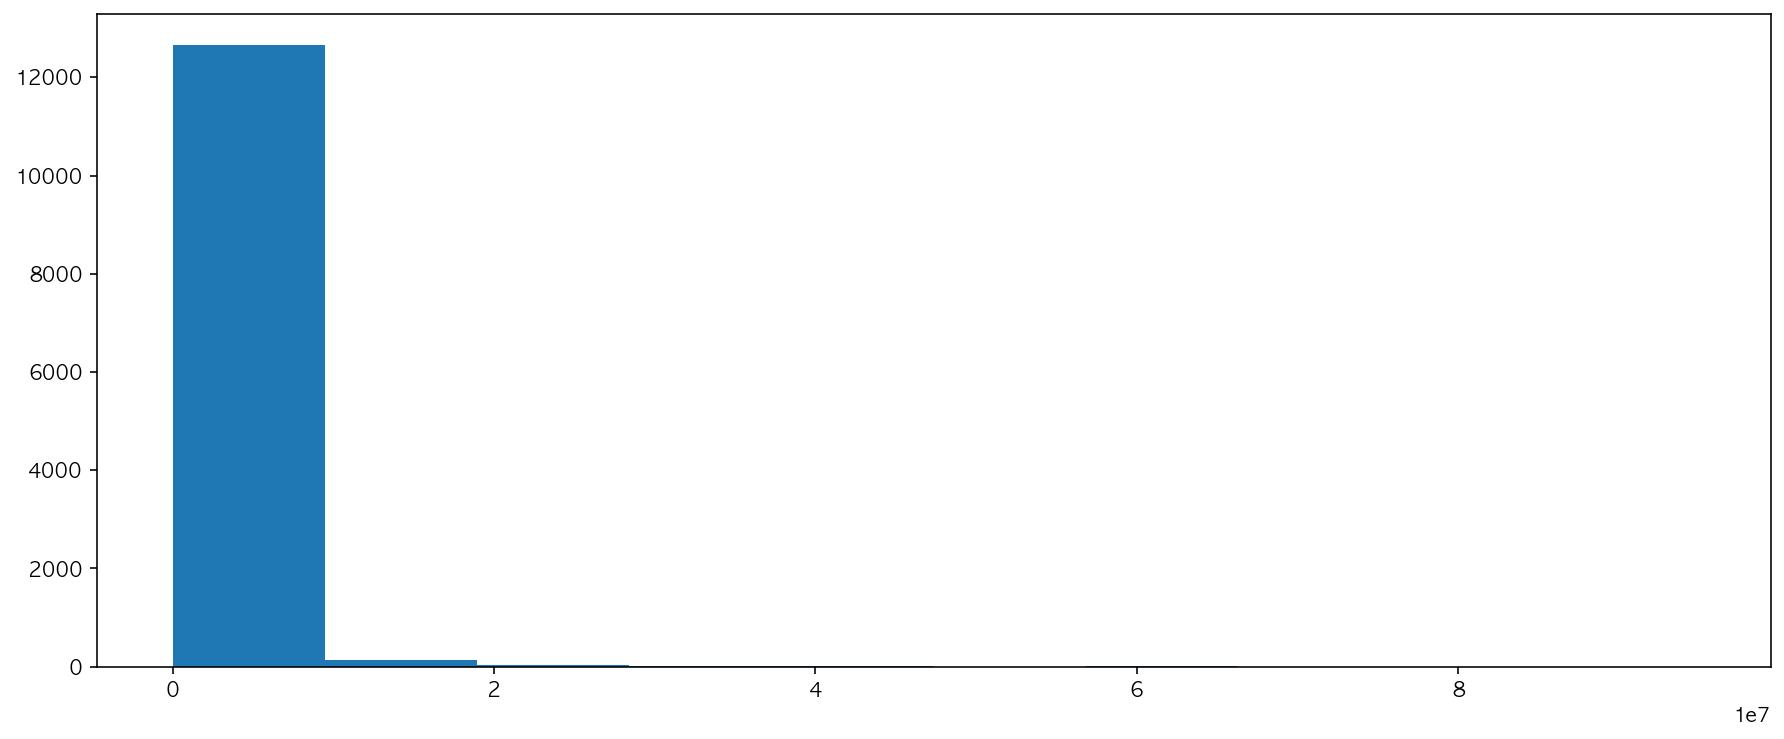

In [128]:
plt.figure()
plt.hist(nonfraud_train_data['s15'],bins=10)
plt.show()

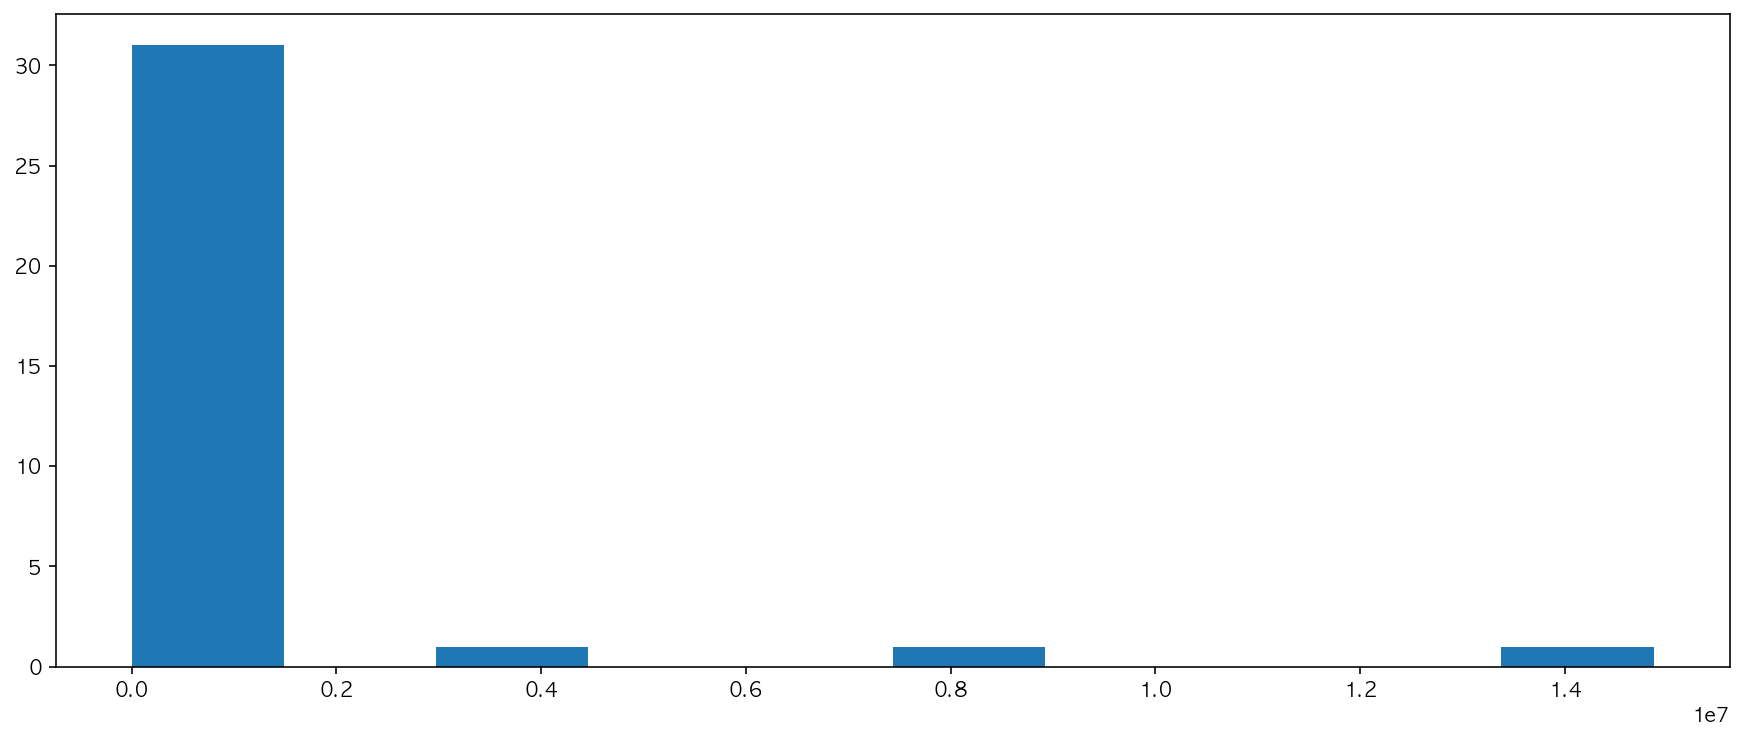

In [129]:
plt.figure()
plt.hist(fraud_train_data['s15'],bins=10)
plt.show()

In [130]:
nonfraud_train_data['s15'].value_counts()

0          8358
300000       68
400000       61
500000       52
200000       45
           ... 
945000        1
2603410       1
796800        1
666000        1
614400        1
Name: s15, Length: 3715, dtype: int64

In [131]:
s15_0_non = len(nonfraud_train_data[nonfraud_train_data['s15'] == 0])
s15_30000_non = len(nonfraud_train_data[nonfraud_train_data['s15'] <= 300000]) - s15_0_non
s15_60000_non = len(nonfraud_train_data[nonfraud_train_data['s15'] <= 600000]) - (s15_30000_non + s15_0_non)
s15_90000_non = len(nonfraud_train_data[nonfraud_train_data['s15'] <= 900000]) - (s15_60000_non + s15_30000_non + s15_0_non)
s15_120000_non = len(nonfraud_train_data[nonfraud_train_data['s15'] <= 1200000]) - (s15_90000_non + s15_60000_non + s15_30000_non + s15_0_non)
s15_120001_non = len(nonfraud_train_data[nonfraud_train_data['s15'] > 1200000])

In [132]:
s15_0 = len(fraud_train_data[fraud_train_data['s15'] == 0])
s15_30000 = len(fraud_train_data[fraud_train_data['s15'] <= 300000]) - s15_0
s15_60000 = len(fraud_train_data[fraud_train_data['s15'] <= 600000]) - (s15_30000 + s15_0)
s15_90000 = len(fraud_train_data[fraud_train_data['s15'] <= 900000]) - (s15_60000 + s15_30000 + s15_0)
s15_120000 = len(fraud_train_data[fraud_train_data['s15'] <= 1200000]) - (s15_90000 + s15_60000 + s15_30000 + s15_0)
s15_120001 = len(fraud_train_data[fraud_train_data['s15'] > 1200000])

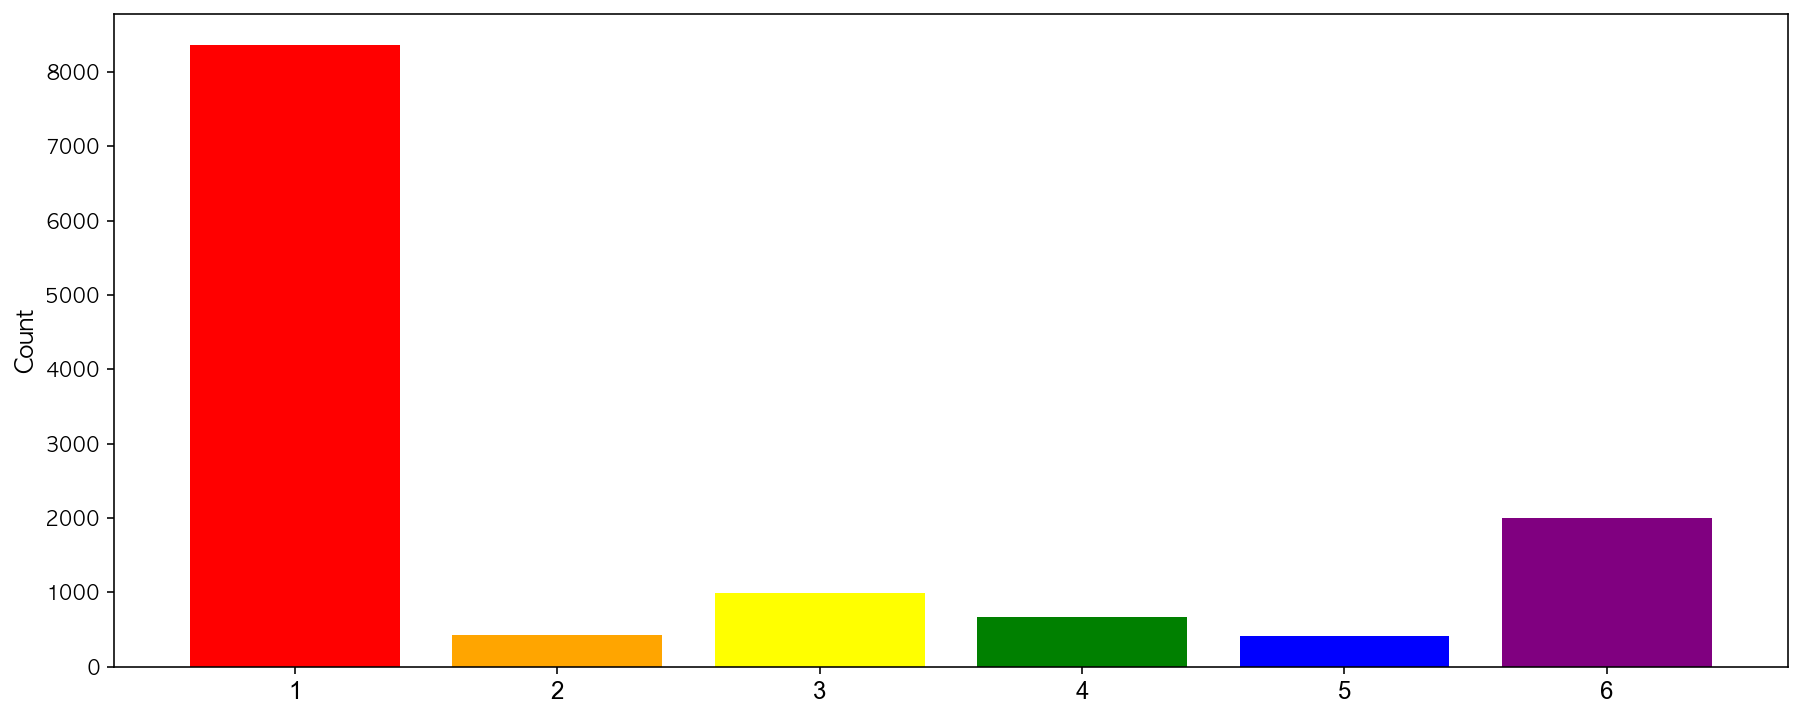

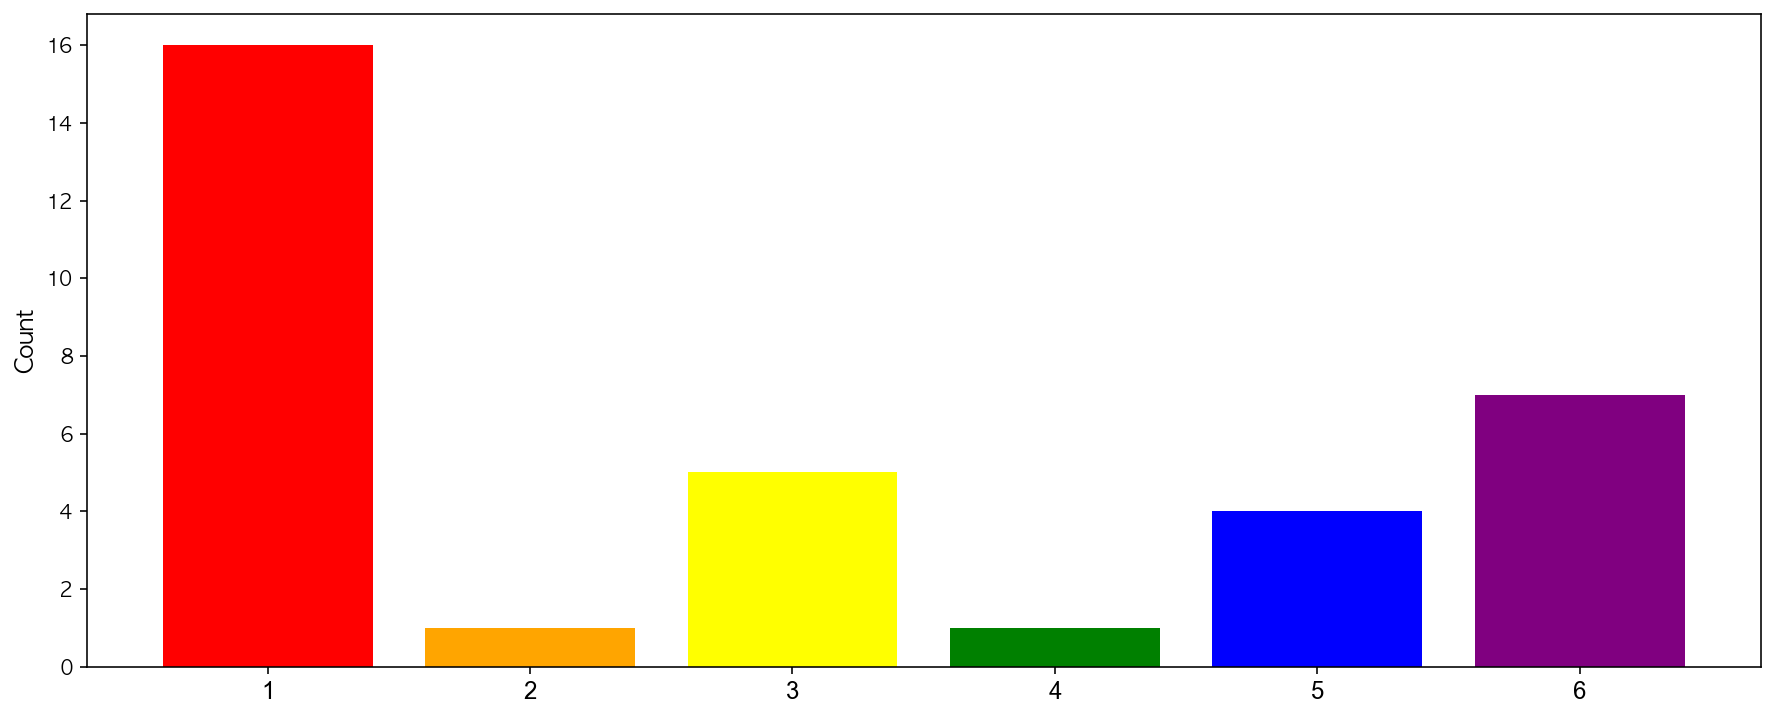

In [133]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

font = fm.FontProperties(fname='/Library/Fonts/Arial Unicode.ttf')

x = np.arange(6)
s15s = ['1', '2', '3','4','5','6']
values = [s15_0_non, s15_30000_non, s15_60000_non, s15_90000_non,
          s15_120000_non, s15_120001_non]

colors = ['Red','Orange','Yellow','Green','Blue','Purple'] 
plt.rcParams["figure.figsize"] = (15,6)
plt.bar(x, values, color=colors)
plt.xticks(x, s15s, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

y = np.arange(6)
s15 = ['1', '2', '3','4','5','6']
value = [s15_0, s15_30000, s15_60000, s15_90000, s15_120000, s15_120001]

colors = ['Red','Orange','Yellow','Green','Blue','Purple']  
plt.rcParams["figure.figsize"] = (15,6)
plt.bar(y, value, color=colors)
plt.xticks(y, s15, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

In [134]:
s15s_non_df = pd.DataFrame({'s15': s15s, 'Count': values}, 
                              columns=['s15', 'Count'])
s15s_df = pd.DataFrame({'s15': s15, 'Count': value}, 
                              columns=['s15', 'Count'])

In [135]:
np.mean(nonfraud_train_data['s15'])

836928.154924095

In [136]:
np.mean(fraud_train_data['s15'])

1150000.3235294118

In [137]:
s15s_non_df

s15  Count
0   1   8358
1   2    419
2   3    993
3   4    666
4   5    409
5   6   2000

In [138]:
s15s_df

s15  Count
0   1     16
1   2      1
2   3      5
3   4      1
4   5      4
5   6      7

### 2.7.16. s16 

In [139]:
s16_0_non = len(nonfraud_train_data[nonfraud_train_data['s16']==0])
s16_1_non = len(nonfraud_train_data[nonfraud_train_data['s16']==1])
s16_2_non = len(nonfraud_train_data[nonfraud_train_data['s16']==2])
s16_3_non = len(nonfraud_train_data[nonfraud_train_data['s16']==3])
s16_4_non = len(nonfraud_train_data[nonfraud_train_data['s16']==4])
s16_5_non = len(nonfraud_train_data[nonfraud_train_data['s16']==5])

In [140]:
s16_0 = len(fraud_train_data[fraud_train_data['s16']==0])
s16_1 = len(fraud_train_data[fraud_train_data['s16']==1])
s16_2 = len(fraud_train_data[fraud_train_data['s16']==2])
s16_3 = len(fraud_train_data[fraud_train_data['s16']==3])
s16_4 = len(fraud_train_data[fraud_train_data['s16']==4])
s16_5 = len(fraud_train_data[fraud_train_data['s16']==5])

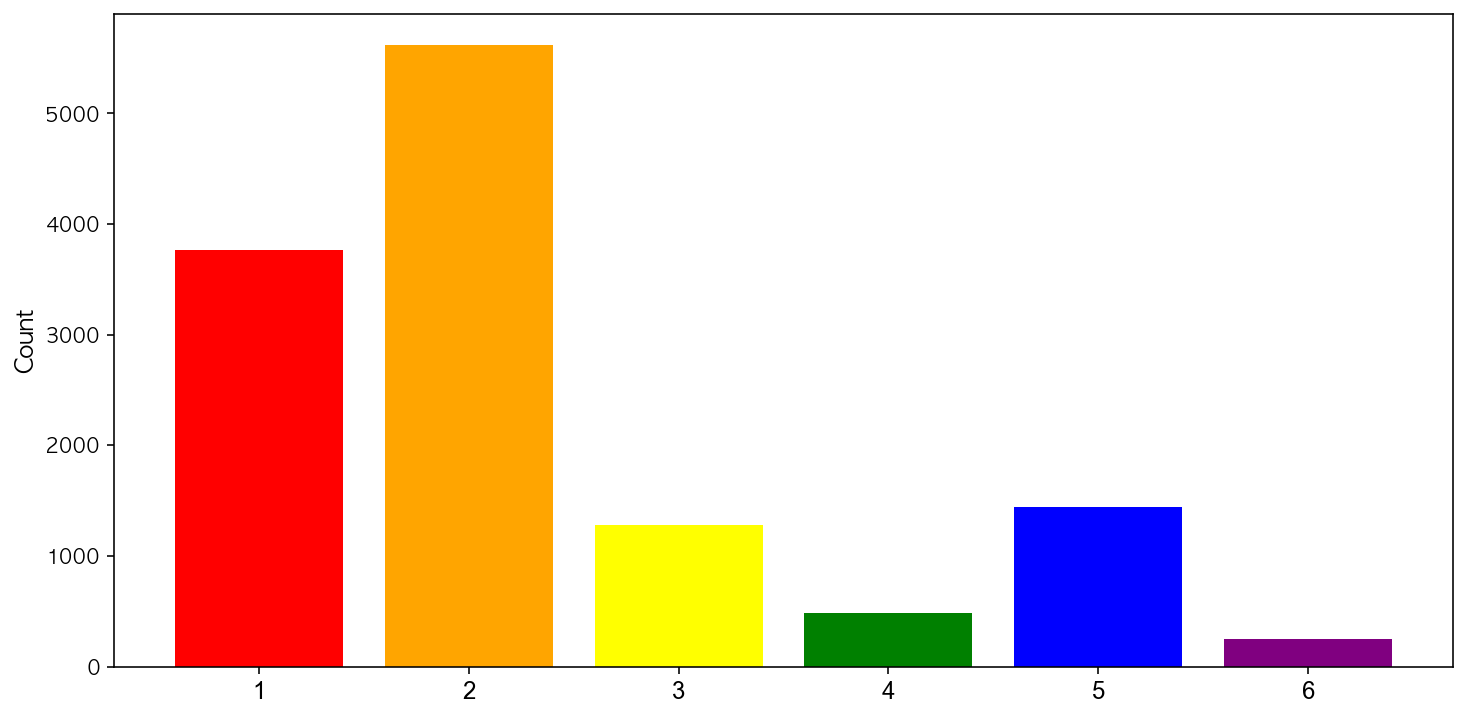

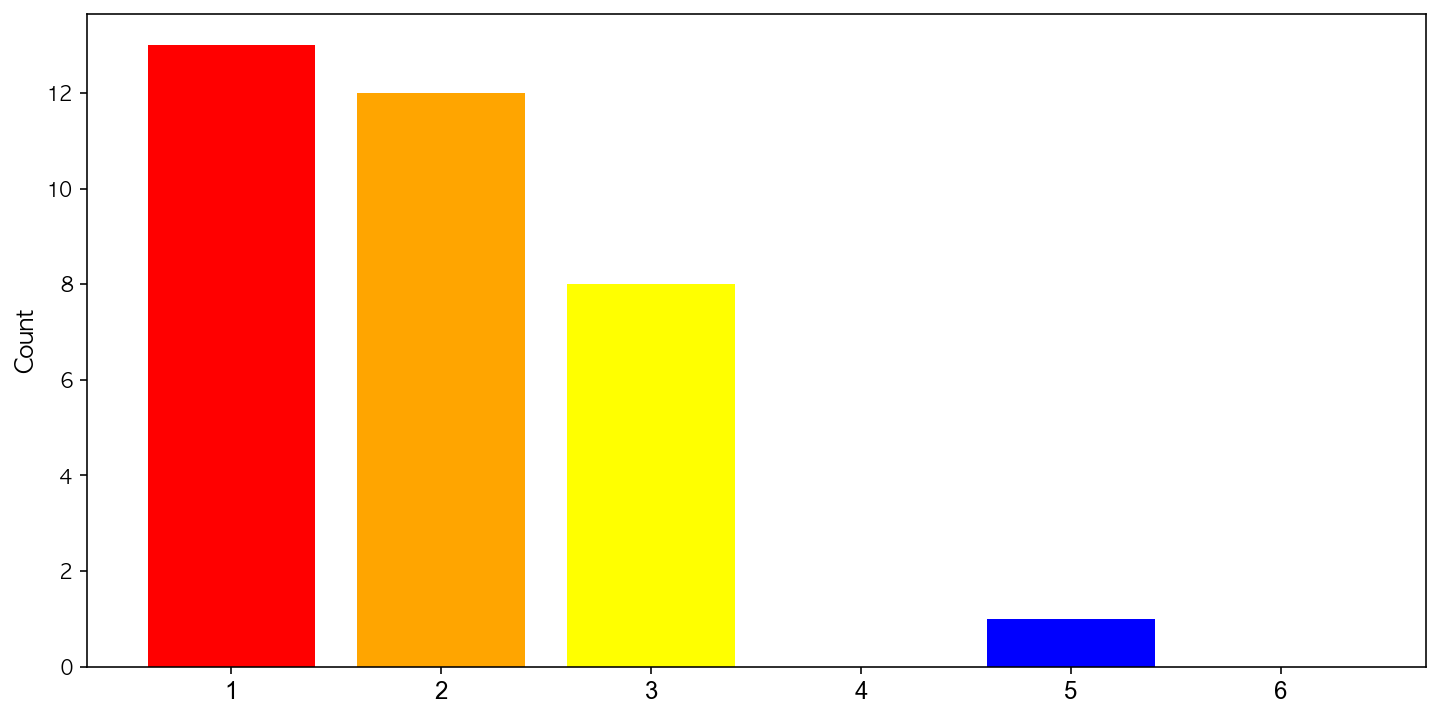

In [141]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

font = fm.FontProperties(fname='/Library/Fonts/Arial Unicode.ttf')

x = np.arange(6)
locations = ['1', '2', '3','4','5','6']
values = [s16_0_non, s16_1_non, s16_2_non,
          s16_3_non, s16_4_non, s16_5_non]

colors = ['Red','Orange','Yellow','Green','Blue','Purple'] 
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(x, values, color=colors)
plt.xticks(x, locations, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

y = np.arange(6)
location = ['1', '2', '3','4','5','6']
value = [s16_0, s16_1, s16_2, s16_3,
         s16_4, s16_5]

colors = ['Red','Orange','Yellow','Green','Blue','Purple']  
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(y, value, color=colors)
plt.xticks(y, location, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

In [142]:
s16_non_df = pd.DataFrame({'s16': locations, 'Count': values}, 
                              columns=['s16', 'Count'])
s16_df = pd.DataFrame({'s16': location, 'Count': value}, 
                              columns=['s16', 'Count'])

In [143]:
s16_non_df

s16  Count
0   1   3767
1   2   5616
2   3   1283
3   4    483
4   5   1442
5   6    254

In [144]:
s16_df

s16  Count
0   1     13
1   2     12
2   3      8
3   4      0
4   5      1
5   6      0

### 2.7.17. s17

In [145]:
s17_0_non = len(nonfraud_train_data[nonfraud_train_data['s17']==0])
s17_1_non = len(nonfraud_train_data[nonfraud_train_data['s17']==1])

In [146]:
s17_0 = len(fraud_train_data[fraud_train_data['s17']==0])
s17_1 = len(fraud_train_data[fraud_train_data['s17']==1])

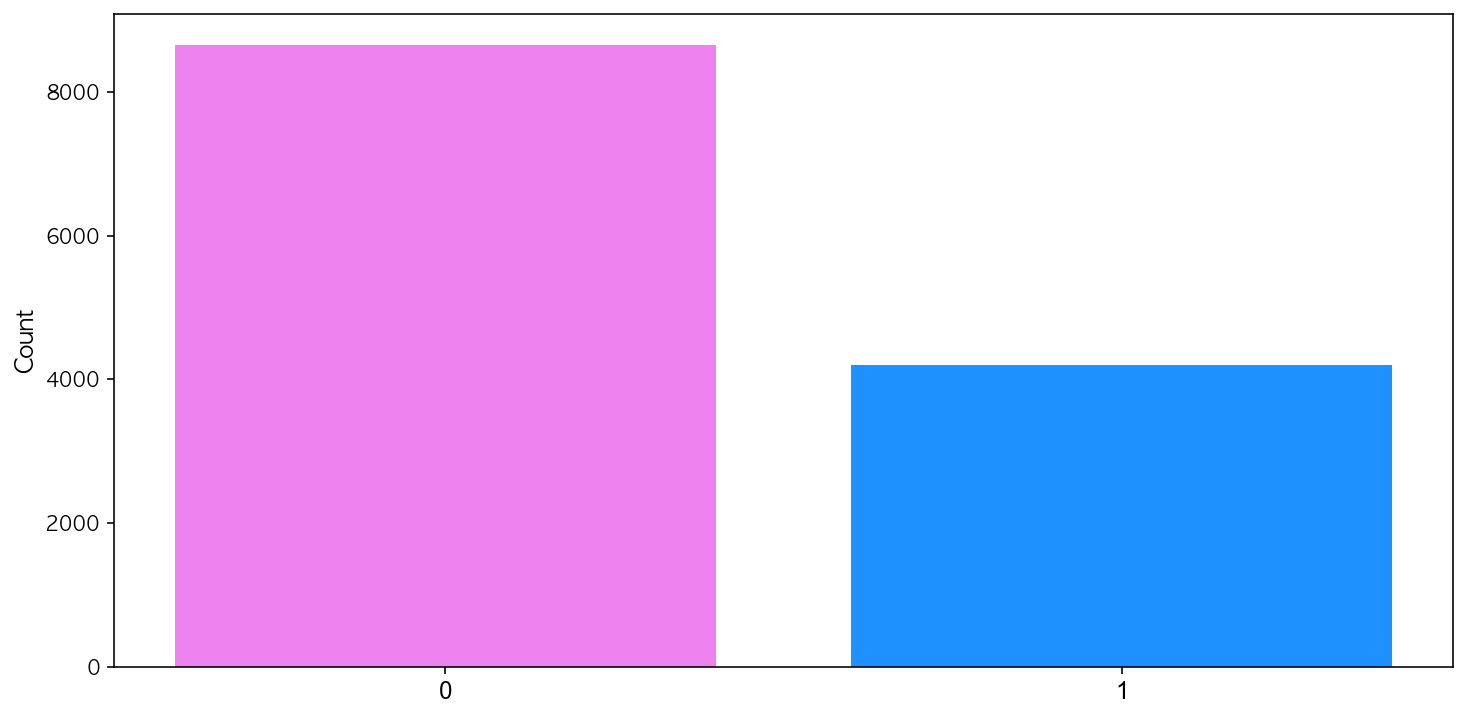

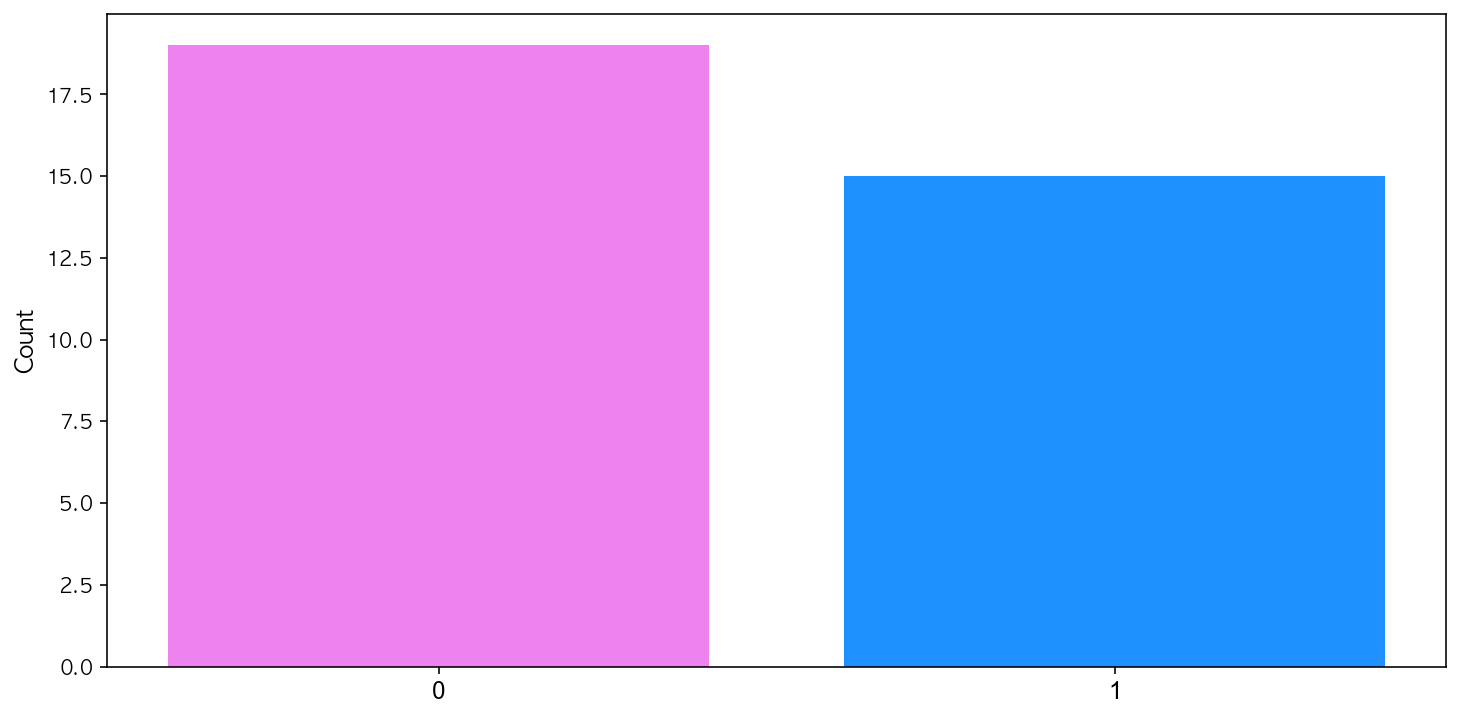

In [147]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

font = fm.FontProperties(fname='/Library/Fonts/Arial Unicode.ttf')

x = np.arange(2)
s17s = ['0', '1']
values = [s17_0_non, s17_1_non]

colors = ['violet','dodgerblue']  
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(x, values, color=colors)
plt.xticks(x, s17s, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

y = np.arange(2)
s17 = ['0', '1']
value = [s17_0, s17_1]

colors = ['violet','dodgerblue']   
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(y, value, color=colors)
plt.xticks(y, s17, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

In [148]:
s17_non_df = pd.DataFrame({'s17': s17s, 'Count': values}, 
                              columns=['s17', 'Count'])
s17_df = pd.DataFrame({'s17': s17, 'Count': value}, 
                              columns=['s17', 'Count'])

In [149]:
s17_non_df

s17  Count
0   0   8649
1   1   4196

In [150]:
s17_df

s17  Count
0   0     19
1   1     15

### 2.7.18. s18 

In [151]:
s18_0_non = len(nonfraud_train_data[nonfraud_train_data['s18']==0])
s18_1_non = len(nonfraud_train_data[nonfraud_train_data['s18']==1])

In [152]:
s18_0 = len(fraud_train_data[fraud_train_data['s18']==0])
s18_1 = len(fraud_train_data[fraud_train_data['s18']==1])

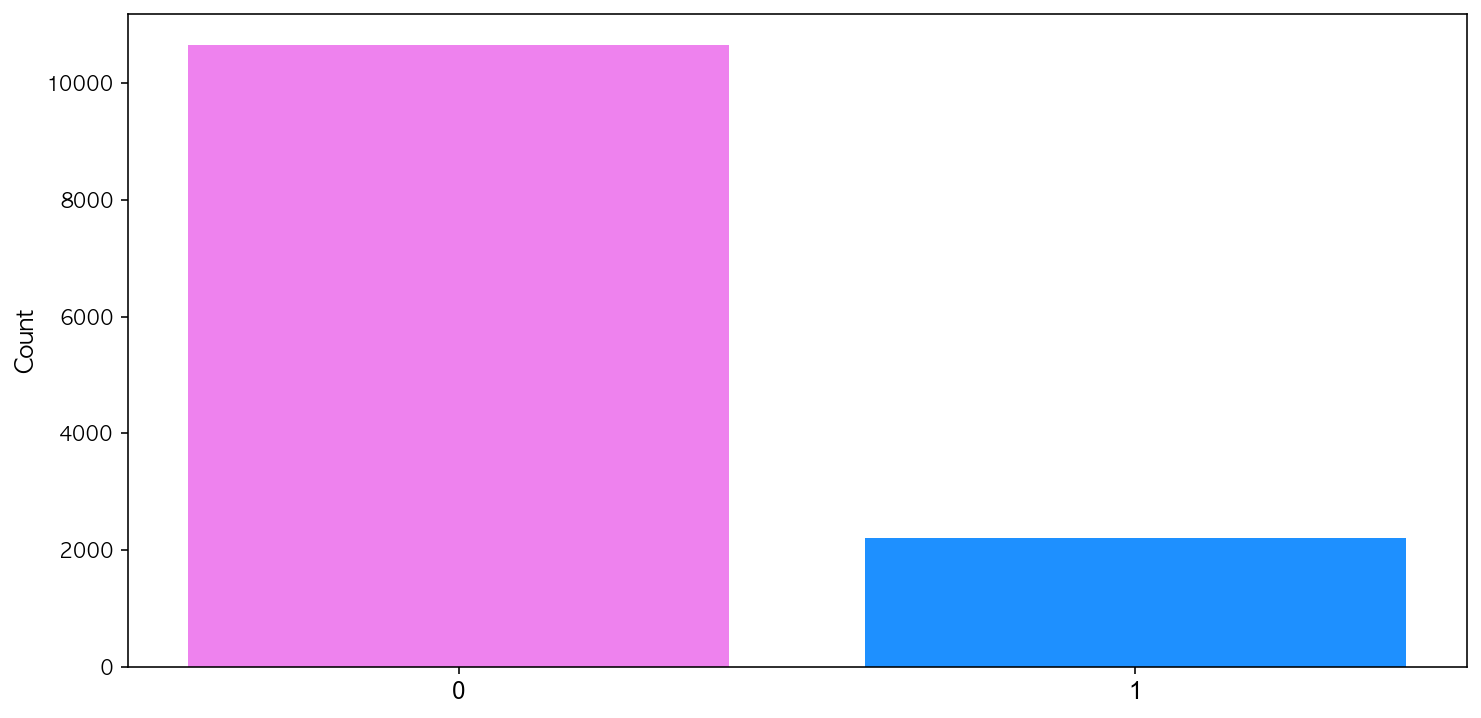

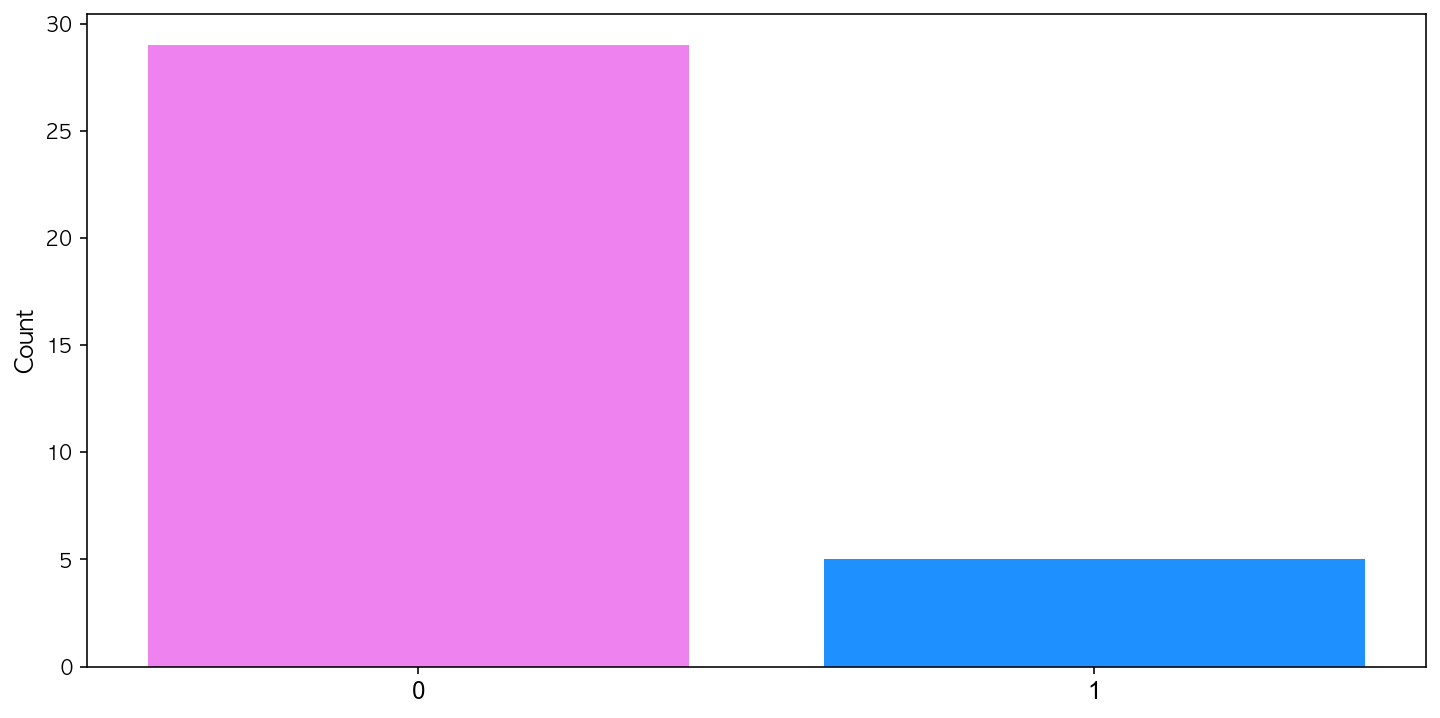

In [153]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

font = fm.FontProperties(fname='/Library/Fonts/Arial Unicode.ttf')

x = np.arange(2)
s18s = ['0', '1']
values = [s18_0_non, s18_1_non]

colors = ['violet','dodgerblue']  
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(x, values, color=colors)
plt.xticks(x, s18s, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

y = np.arange(2)
s18 = ['0', '1']
value = [s18_0, s18_1]

colors = ['violet','dodgerblue']   
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(y, value, color=colors)
plt.xticks(y, s18, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

In [154]:
s18_non_df = pd.DataFrame({'s18': s18s, 'Count': values}, 
                              columns=['s18', 'Count'])
s18_df = pd.DataFrame({'s18': s18, 'Count': value}, 
                              columns=['s18', 'Count'])

In [155]:
s18_non_df

s18  Count
0   0  10648
1   1   2197

In [156]:
s18_df

s18  Count
0   0     29
1   1      5

### 2.7.19. s19 

In [157]:
nonfraud_train_data['s19'].value_counts()

1     9433
2     2295
3      511
0      227
4      196
5       81
6       65
7       14
8        9
10       3
11       3
12       2
9        2
18       1
20       1
37       1
15       1
Name: s19, dtype: int64

In [158]:
fraud_train_data['s19'].value_counts()

1    26
2     7
3     1
Name: s19, dtype: int64

In [159]:
s19_0_non = len(nonfraud_train_data[nonfraud_train_data['s19']==0])
s19_1_non = len(nonfraud_train_data[nonfraud_train_data['s19']==1])
s19_2_non = len(nonfraud_train_data[nonfraud_train_data['s19']==2])
s19_3_non = len(nonfraud_train_data[nonfraud_train_data['s19']==3])
s19_4_non = len(nonfraud_train_data[nonfraud_train_data['s19']==4])
s19_5_non = len(nonfraud_train_data[nonfraud_train_data['s19']>=5])

In [160]:
s19_0 = len(fraud_train_data[fraud_train_data['s19']==0])
s19_1 = len(fraud_train_data[fraud_train_data['s19']==1])
s19_2 = len(fraud_train_data[fraud_train_data['s19']==2])
s19_3 = len(fraud_train_data[fraud_train_data['s19']==3])
s19_4 = len(fraud_train_data[fraud_train_data['s19']==4])
s19_5 = len(fraud_train_data[fraud_train_data['s19']>=5])

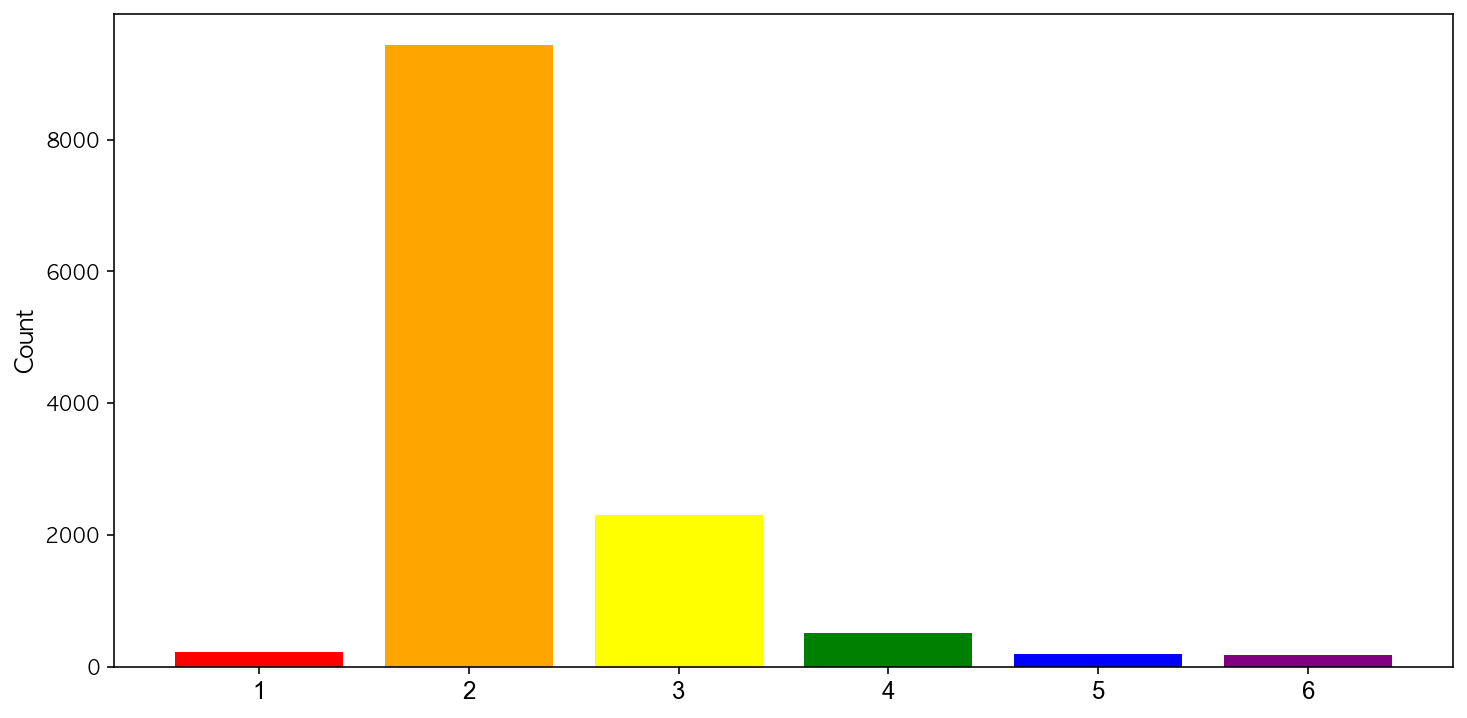

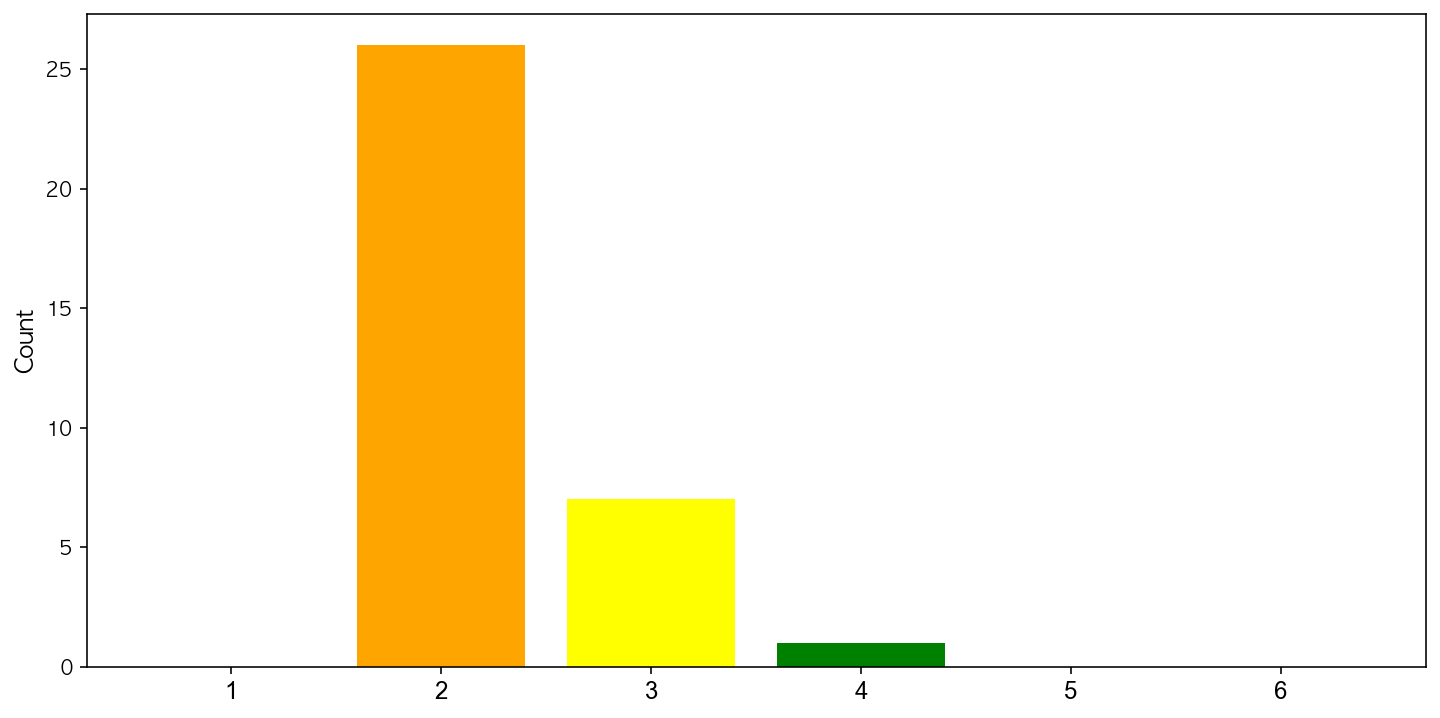

In [161]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

font = fm.FontProperties(fname='/Library/Fonts/Arial Unicode.ttf')

x = np.arange(6)
s19s = ['1', '2', '3', '4', '5', '6']
values = [s19_0_non, s19_1_non, s19_2_non, s19_3_non,
          s19_4_non, s19_5_non]

colors = ['Red','Orange','Yellow','Green','Blue','Purple'] 
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(x, values, color=colors)
plt.xticks(x, s19s, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

y = np.arange(6)
s19 = ['1', '2', '3', '4', '5', '6']
value = [s19_0, s19_1, s19_2, s19_3, s19_4, s19_5]

colors = ['Red','Orange','Yellow','Green','Blue', 'Purple']  
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(y, value, color=colors)
plt.xticks(y, s19, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

In [162]:
s19_non_df = pd.DataFrame({'s19': s19s, 'Count': values}, 
                              columns=['s19', 'Count'])
s19_df = pd.DataFrame({'s19': s19, 'Count': value}, 
                              columns=['s19', 'Count'])

In [163]:
s19_non_df

s19  Count
0   1    227
1   2   9433
2   3   2295
3   4    511
4   5    196
5   6    183

In [164]:
s19_df

s19  Count
0   1      0
1   2     26
2   3      7
3   4      1
4   5      0
5   6      0

### 2.7.20. s20

In [165]:
s20_0_non = len(nonfraud_train_data[nonfraud_train_data['s20']==0])
s20_1_non = len(nonfraud_train_data[nonfraud_train_data['s20']==1])
s20_2_non = len(nonfraud_train_data[nonfraud_train_data['s20']==2])
s20_3_non = len(nonfraud_train_data[nonfraud_train_data['s20']==3])
s20_4_non = len(nonfraud_train_data[nonfraud_train_data['s20']==4])

In [166]:
s20_0 = len(fraud_train_data[fraud_train_data['s20']==0])
s20_1 = len(fraud_train_data[fraud_train_data['s20']==1])
s20_2 = len(fraud_train_data[fraud_train_data['s20']==2])
s20_3 = len(fraud_train_data[fraud_train_data['s20']==3])
s20_4 = len(fraud_train_data[fraud_train_data['s20']==4])

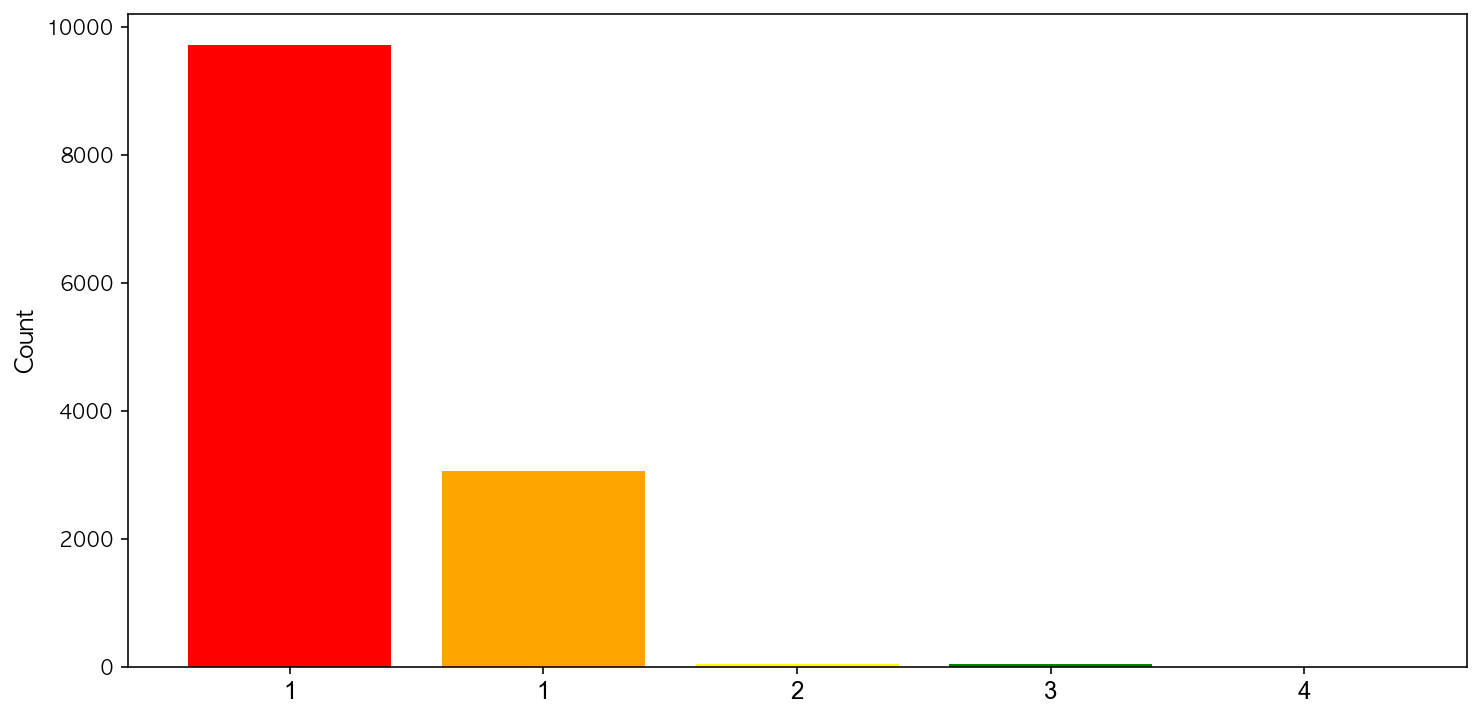

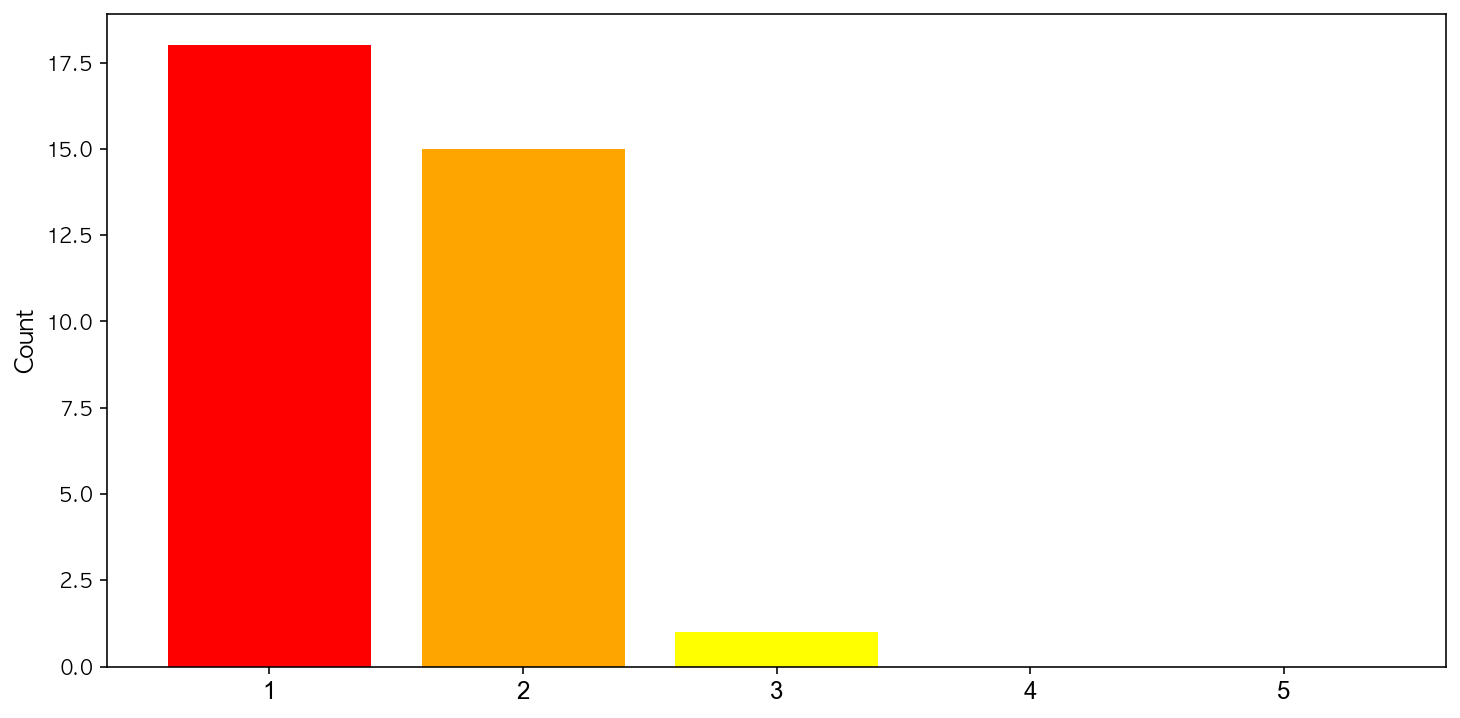

In [167]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

font = fm.FontProperties(fname='/Library/Fonts/Arial Unicode.ttf')

x = np.arange(5)
acc_types = ['1', '1', '2','3','4']
values = [s20_0_non, s20_1_non, s20_2_non, s20_3_non,
          s20_4_non]

colors = ['Red','Orange','Yellow','Green','Blue'] 
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(x, values, color=colors)
plt.xticks(x, acc_types, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

y = np.arange(5)
acc_type = ['1', '2', '3','4','5']
value = [s20_0, s20_1, s20_2, s20_3, s20_4]

colors = ['Red','Orange','Yellow','Green','Blue']  
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(y, value, color=colors)
plt.xticks(y, acc_type, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

In [168]:
_non_df = pd.DataFrame({'s20': acc_type, 'Count': values}, 
                              columns=['s20', 'Count'])
_df = pd.DataFrame({'s20': acc_type, 'Count': value}, 
                              columns=['s20', 'Count'])

In [169]:
_non_df

s20  Count
0   1   9709
1   2   3053
2   3     44
3   4     39
4   5      0

In [170]:
_df

s20  Count
0   1     18
1   2     15
2   3      1
3   4      0
4   5      0

### 2.7.21. s21

In [171]:
insurance_yn_0_non = len(nonfraud_train_data[nonfraud_train_data['s21']==0])
insurance_yn_1_non = len(nonfraud_train_data[nonfraud_train_data['s21']==1])
insurance_yn_2_non = len(nonfraud_train_data[nonfraud_train_data['s21']==2])

In [172]:
insurance_yn_0 = len(fraud_train_data[fraud_train_data['s21']==0])
insurance_yn_1 = len(fraud_train_data[fraud_train_data['s21']==1])
insurance_yn_2 = len(fraud_train_data[fraud_train_data['s21']==2])

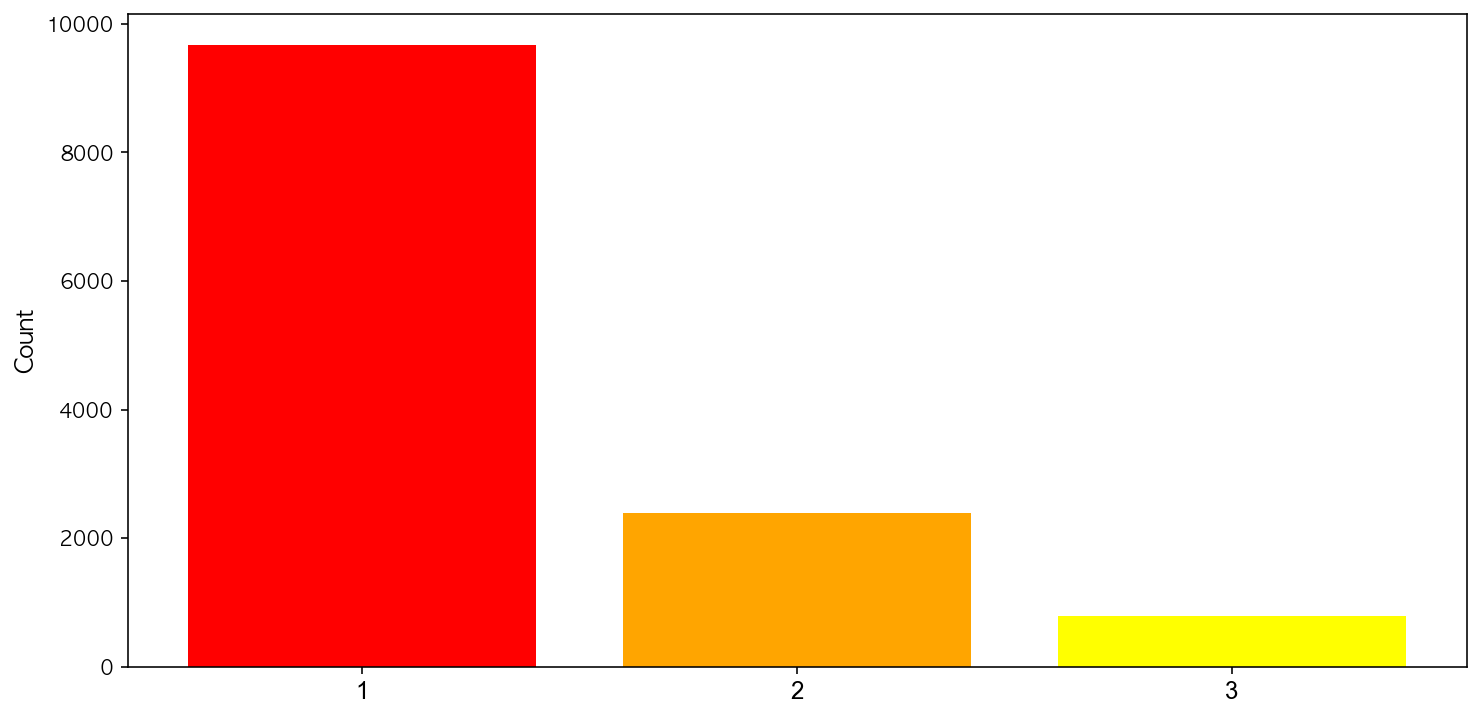

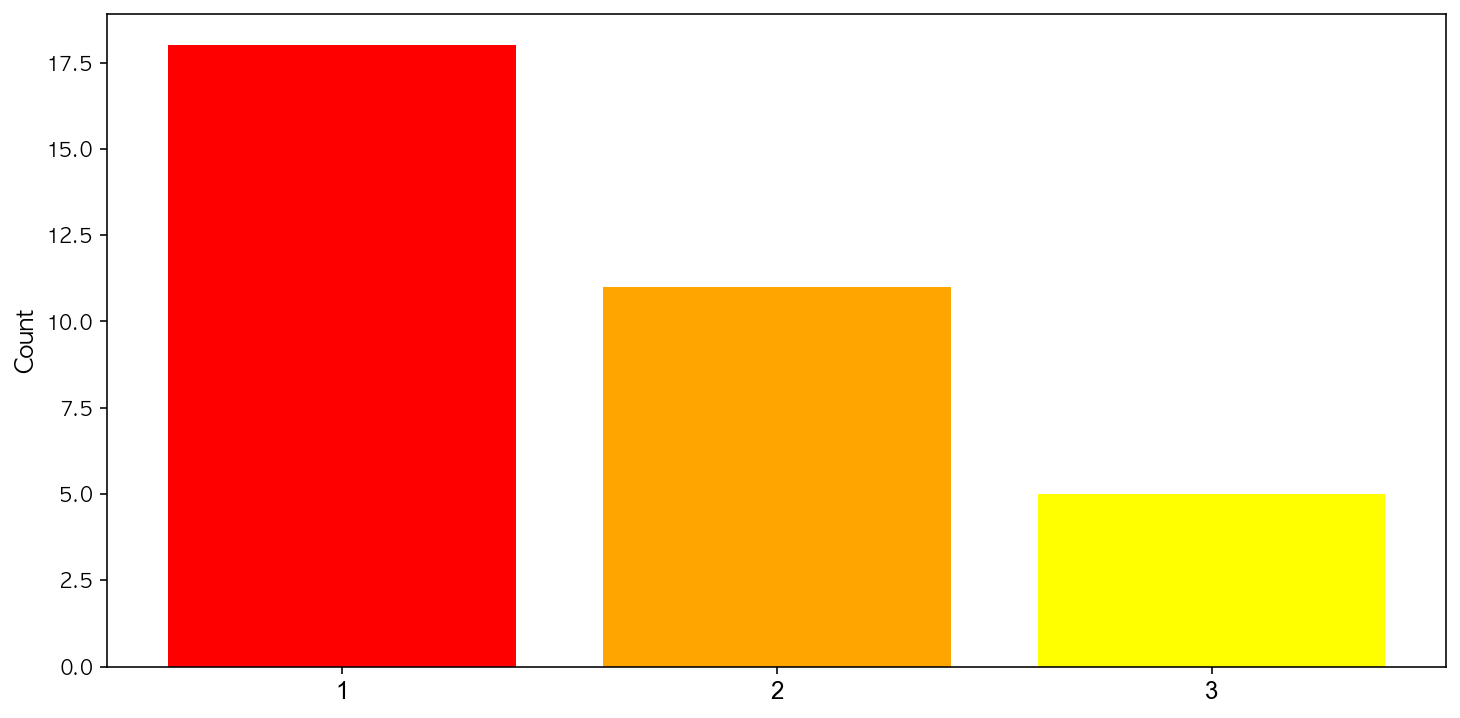

In [173]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

font = fm.FontProperties(fname='/Library/Fonts/Arial Unicode.ttf')

x = np.arange(3)
insurance_yn_non = ['1', '2', '3']
values = [insurance_yn_0_non, insurance_yn_1_non, insurance_yn_2_non]

colors = ['Red','Orange','Yellow'] 
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(x, values, color=colors)
plt.xticks(x, insurance_yn_non, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

y = np.arange(3)
insurance_yn = ['1', '2', '3']
value = [insurance_yn_0, insurance_yn_1, insurance_yn_2]

colors = ['Red','Orange','Yellow']   
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(y, value, color=colors)
plt.xticks(y, insurance_yn, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

In [174]:
insurance_yn_non_df = pd.DataFrame({'s21': insurance_yn_non, 'Count': values}, 
                              columns=['s21', 'Count'])
insurance_yn_df = pd.DataFrame({'s21': insurance_yn, 'Count': value}, 
                              columns=['s21', 'Count'])

In [175]:
insurance_yn_non_df

s21  Count
0   1   9666
1   2   2393
2   3    786

In [176]:
insurance_yn_df

s21  Count
0   1     18
1   2     11
2   3      5

### 2.7.22. s22 

In [177]:
police_yn_0_non = len(nonfraud_train_data[nonfraud_train_data['s22']==0])
police_yn_1_non = len(nonfraud_train_data[nonfraud_train_data['s22']==1])
police_yn_2_non = len(nonfraud_train_data[nonfraud_train_data['s22']==2])

In [178]:
police_yn_0 = len(fraud_train_data[fraud_train_data['s22']==0])
police_yn_1 = len(fraud_train_data[fraud_train_data['s22']==1])
police_yn_2 = len(fraud_train_data[fraud_train_data['s22']==2])

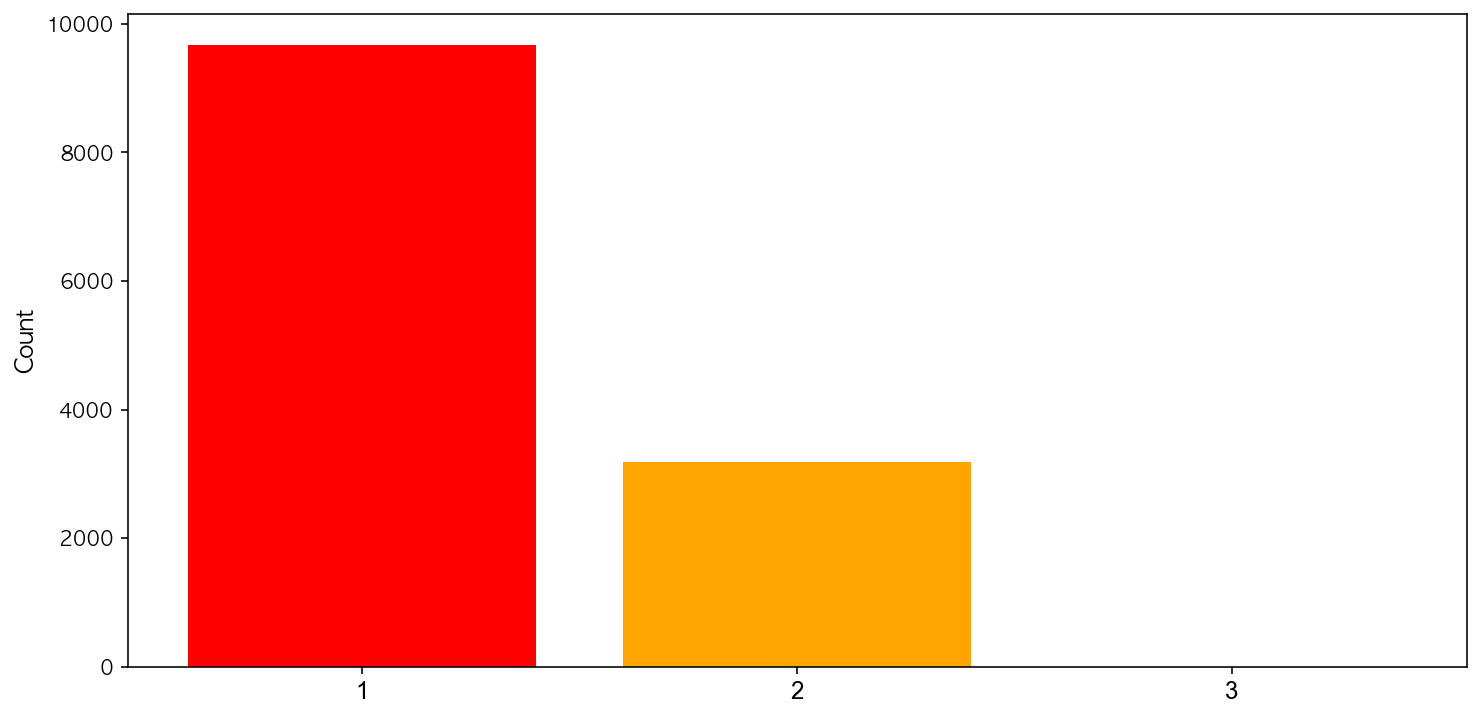

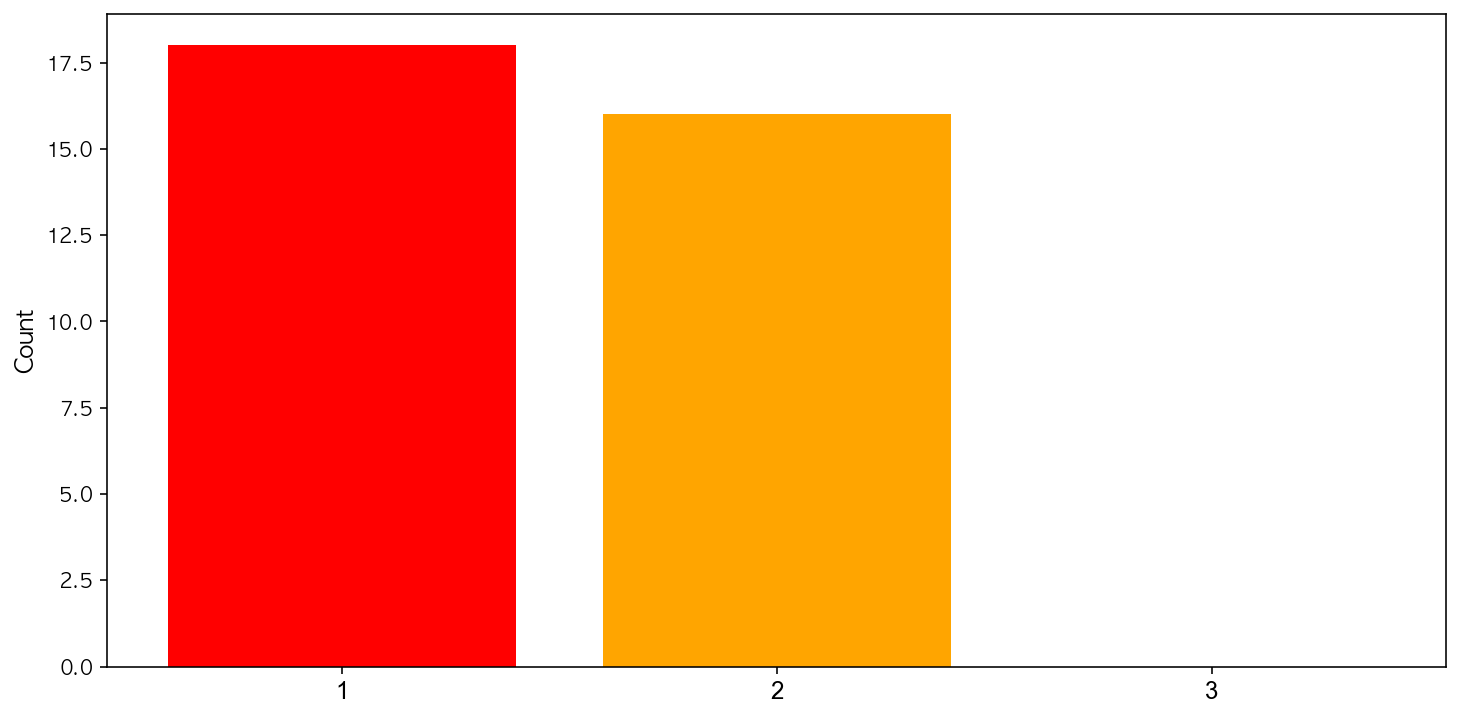

In [179]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

font = fm.FontProperties(fname='/Library/Fonts/Arial Unicode.ttf')

x = np.arange(3)
police_yn_non = ['1', '2', '3']
values = [police_yn_0_non, police_yn_1_non, police_yn_2_non]

colors = ['Red','Orange','Yellow'] 
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(x, values, color=colors)
plt.xticks(x, police_yn_non, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

y = np.arange(3)
police_yn = ['1', '2', '3']
value = [police_yn_0, police_yn_1, police_yn_2]

colors = ['Red','Orange','Yellow']   
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(y, value, color=colors)
plt.xticks(y, police_yn, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

In [180]:
police_yn_non_df = pd.DataFrame({'s22': police_yn_non, 'Count': values}, 
                              columns=['s22', 'Count'])
police_yn_df = pd.DataFrame({'s22': police_yn, 'Count': value}, 
                              columns=['s22', 'Count'])

In [181]:
police_yn_non_df

s22  Count
0   1   9667
1   2   3178
2   3      0

In [182]:
police_yn_df

s22  Count
0   1     18
1   2     16
2   3      0

### 2.7.23. s23

In [183]:
nonfraud_train_data['s23'].value_counts()

-1    9691
 0    1357
 1    1175
 2     372
 3     156
 4      73
 5      21
Name: s23, dtype: int64

In [184]:
fraud_train_data['s23'].value_counts()

-1    18
 1     6
 2     5
 0     4
 3     1
Name: s23, dtype: int64

In [185]:
prsn_cnt_m1_non = len(nonfraud_train_data[nonfraud_train_data['s23']==-1])
prsn_cnt_0_non = len(nonfraud_train_data[nonfraud_train_data['s23']==0])
prsn_cnt_1_non = len(nonfraud_train_data[nonfraud_train_data['s23']==1])
prsn_cnt_2_non = len(nonfraud_train_data[nonfraud_train_data['s23']==2])
prsn_cnt_3_non = len(nonfraud_train_data[nonfraud_train_data['s23']==3])
prsn_cnt_4_non = len(nonfraud_train_data[nonfraud_train_data['s23']==4])
prsn_cnt_5_non = len(nonfraud_train_data[nonfraud_train_data['s23']==5])

In [186]:
prsn_cnt_m1 = len(fraud_train_data[fraud_train_data['s23']==-1])
prsn_cnt_0 = len(fraud_train_data[fraud_train_data['s23']==0])
prsn_cnt_1 = len(fraud_train_data[fraud_train_data['s23']==1])
prsn_cnt_2 = len(fraud_train_data[fraud_train_data['s23']==2])
prsn_cnt_3 = len(fraud_train_data[fraud_train_data['s23']==3])
prsn_cnt_4 = len(fraud_train_data[fraud_train_data['s23']==4])
prsn_cnt_5 = len(fraud_train_data[fraud_train_data['s23']==5])

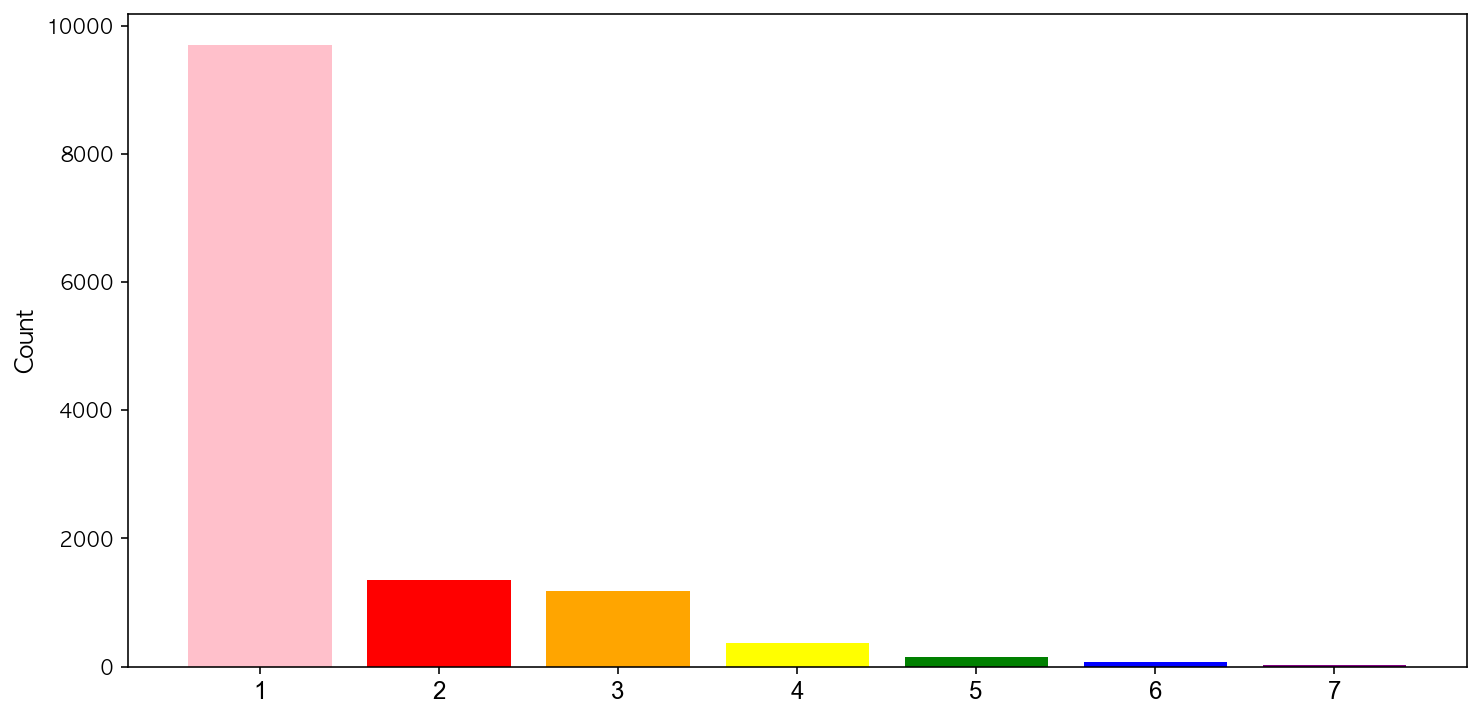

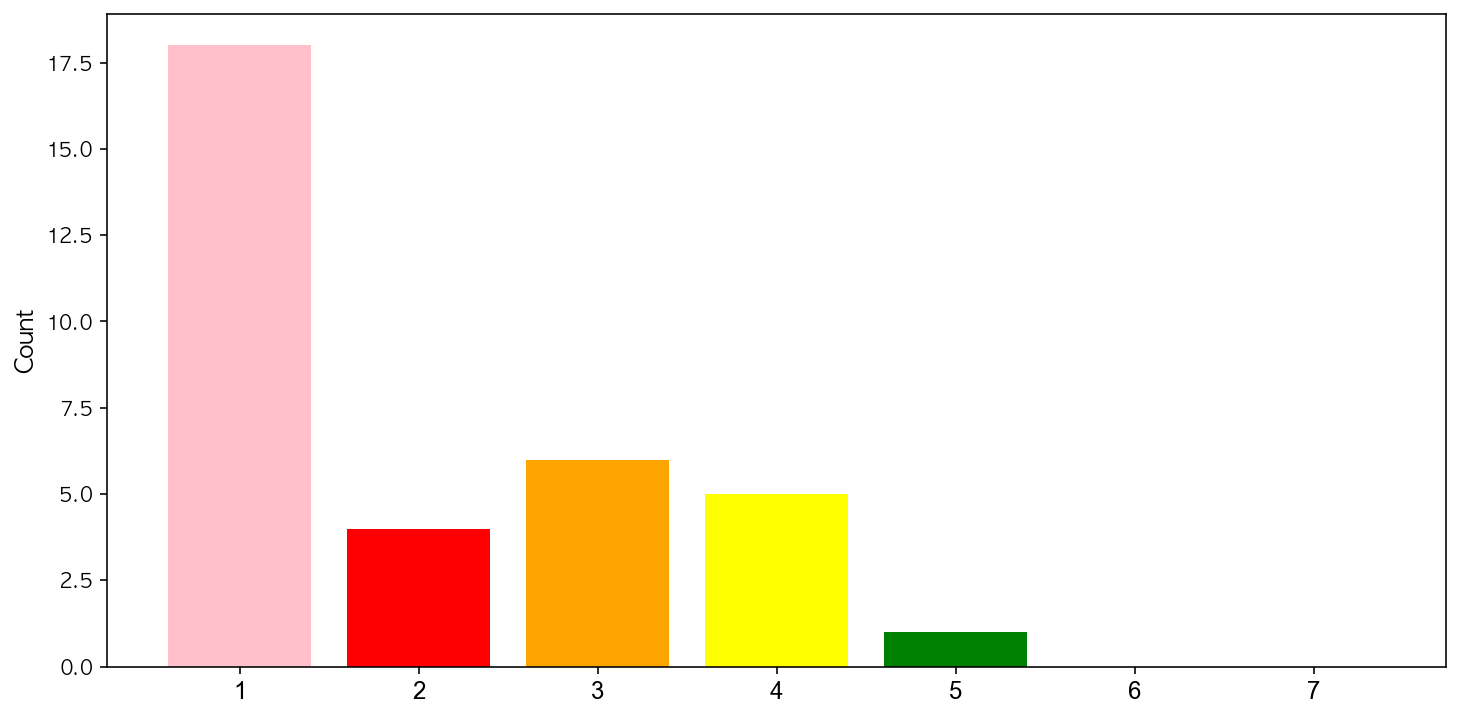

In [187]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

font = fm.FontProperties(fname='/Library/Fonts/Arial Unicode.ttf')

x = np.arange(7)
prsn_cnt_non = ['1', '2', '3','4','5','6', '7']
values = [prsn_cnt_m1_non, prsn_cnt_0_non, prsn_cnt_1_non, prsn_cnt_2_non,
          prsn_cnt_3_non, prsn_cnt_4_non, prsn_cnt_5_non]

colors = ['Pink','Red','Orange','Yellow','Green','Blue','Purple'] 
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(x, values, color=colors)
plt.xticks(x, prsn_cnt_non, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

y = np.arange(7)
prsn_cnt = ['1', '2', '3','4','5','6', '7']
value = [prsn_cnt_m1, prsn_cnt_0, prsn_cnt_1, prsn_cnt_2,
         prsn_cnt_3, prsn_cnt_4, prsn_cnt_5]

colors = ['Pink','Red','Orange','Yellow','Green','Blue','Purple']  
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(y, value, color=colors)
plt.xticks(y, prsn_cnt, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

In [188]:
person_count_non_df = pd.DataFrame({'s23': prsn_cnt_non, 'Count': values}, 
                              columns=['s23', 'Count'])
person_count_df = pd.DataFrame({'s23': prsn_cnt, 'Count': value}, 
                              columns=['s23', 'Count'])

In [189]:
person_count_non_df

s23  Count
0   1   9691
1   2   1357
2   3   1175
3   4    372
4   5    156
5   6     73
6   7     21

In [190]:
person_count_df

s23  Count
0   1     18
1   2      4
2   3      6
3   4      5
4   5      1
5   6      0
6   7      0

### 2.7.24. s24

In [191]:
s24_0_non = len(nonfraud_train_data[nonfraud_train_data['s24']==0])
s24_1_non = len(nonfraud_test_data[nonfraud_test_data['s24']==1])

In [192]:
s24_0 = len(fraud_train_data[fraud_train_data['s24']==0])
s24_1 = len(fraud_test_data[fraud_test_data['s24']==1])

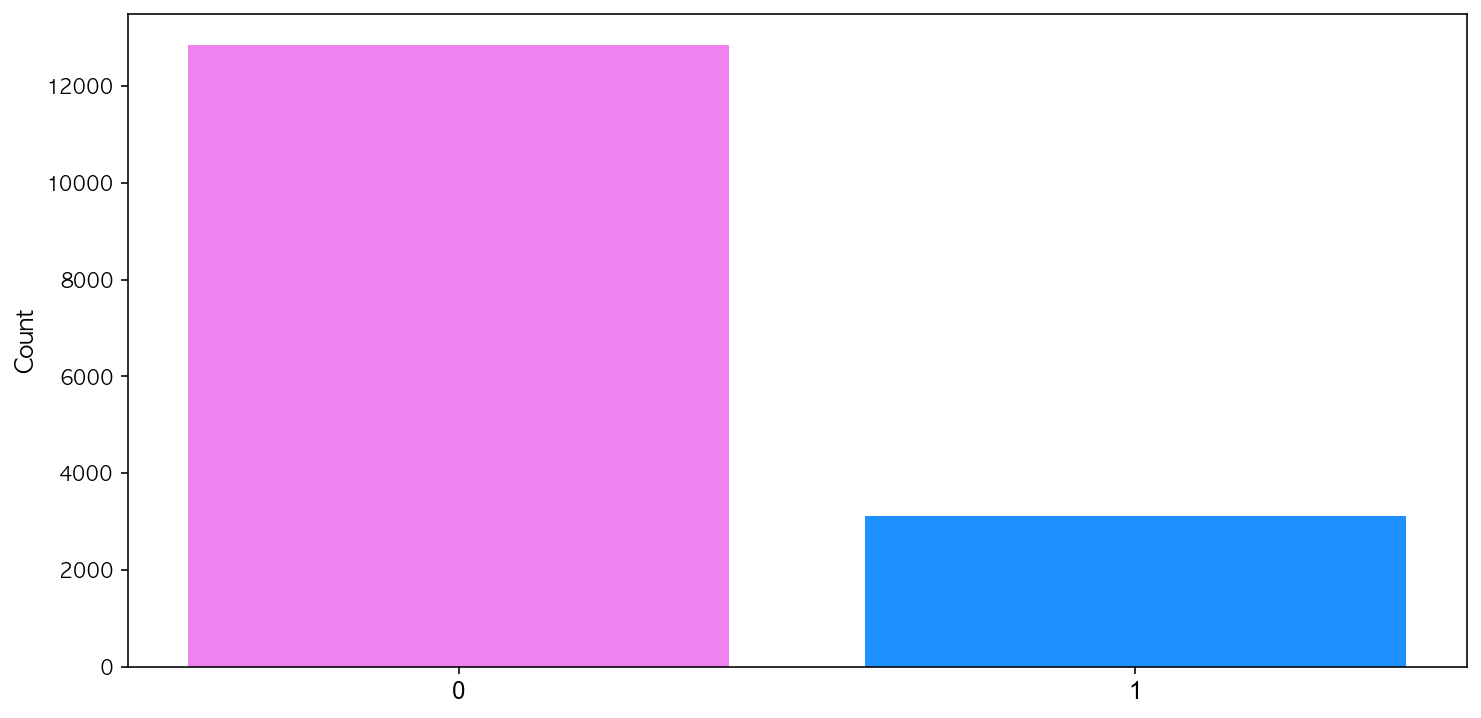

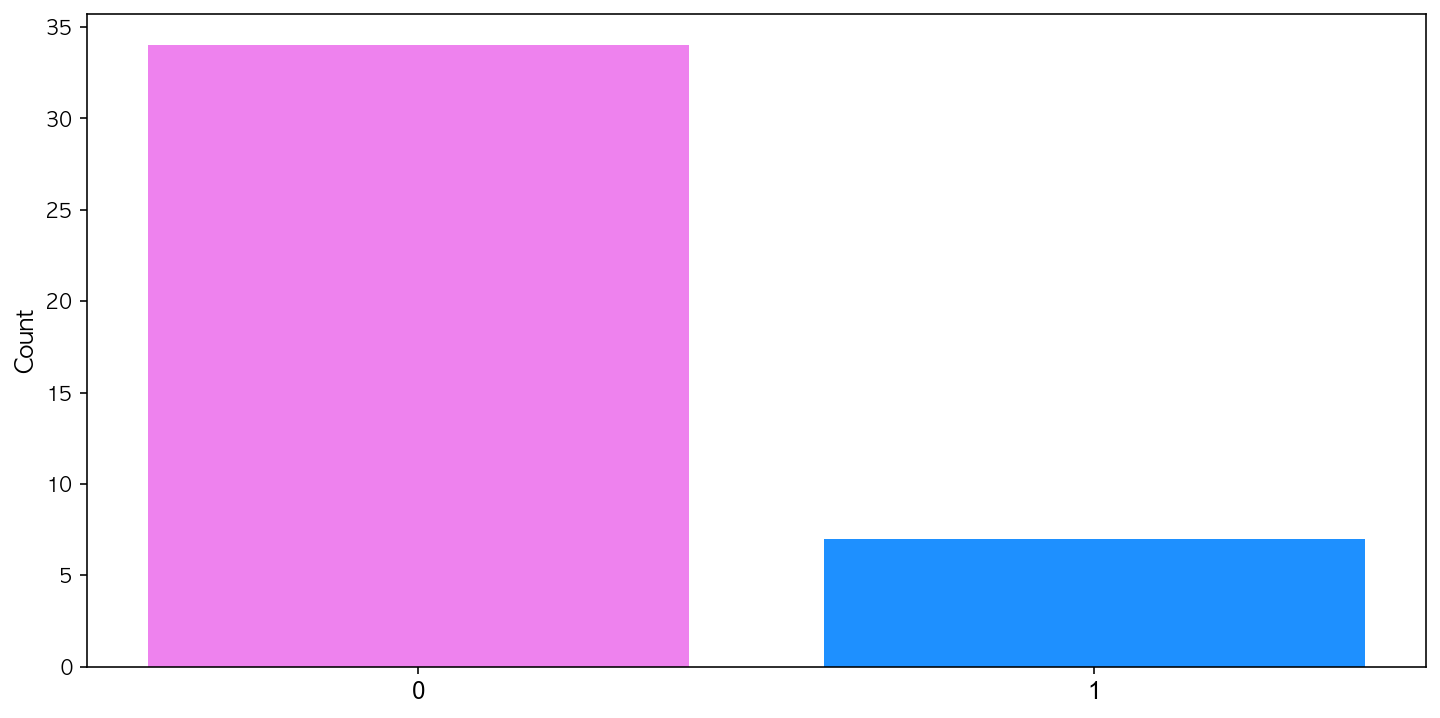

In [193]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

font = fm.FontProperties(fname='/Library/Fonts/Arial Unicode.ttf')

x = np.arange(2)
s24_non = ['0', '1']
values = [s24_0_non, s24_1_non]

colors = ['violet','dodgerblue'] 
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(x, values, color=colors)
plt.xticks(x, s24_non, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

y = np.arange(2)
s24 = ['0', '1']
value = [s24_0, s24_1]

colors = ['violet','dodgerblue']   
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(y, value, color=colors)
plt.xticks(y, s24, fontproperties=font, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

In [194]:
s24_non_df = pd.DataFrame({'s24': s24_non, 'Count': values}, 
                              columns=['s24', 'Count'])
s24_df = pd.DataFrame({'s24': s24, 'Count': value}, 
                              columns=['s24', 'Count'])

In [195]:
s24_non_df

s24  Count
0   0  12845
1   1   3114

In [196]:
s24_df

s24  Count
0   0     34
1   1      7